<h4><center>Parity Risk Strategies on a variety of Portfolio (Bonds, Equities, Commodities, and Currencies)</center></h4>

In [1]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import datetime
from datetime import datetime

In [2]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df = pd.read_csv('Bond_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df.head()

(48, 7)


Date  Germany  Australia      US      UK  Canada   Japan
0  1/1/2004   100.02     105.10  100.98  100.92  104.87  100.66
1  2/1/2004   101.31     107.39  100.23  102.02  106.25  100.66
2  3/1/2004   102.45     107.20  101.30  102.13  106.75   98.78
3  4/1/2004   100.28     103.94   96.17  100.19  103.81   99.74
4  5/1/2004    99.43     104.58  101.25   98.86  103.52   99.83

In [3]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       48 non-null     object 
 1   Germany    48 non-null     float64
 2   Australia  48 non-null     float64
 3   US         48 non-null     float64
 4   UK         48 non-null     float64
 5   Canada     48 non-null     float64
 6   Japan      48 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.8+ KB


In [4]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df['Date'] = pd.to_datetime(bond_df.Date)

In [5]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       48 non-null     datetime64[ns]
 1   Germany    48 non-null     float64       
 2   Australia  48 non-null     float64       
 3   US         48 non-null     float64       
 4   UK         48 non-null     float64       
 5   Canada     48 non-null     float64       
 6   Japan      48 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.8 KB


In [6]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df.set_index('Date',inplace=True)

In [7]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
bond_df.isnull().any()

Germany      False
Australia    False
US           False
UK           False
Canada       False
Japan        False
dtype: bool

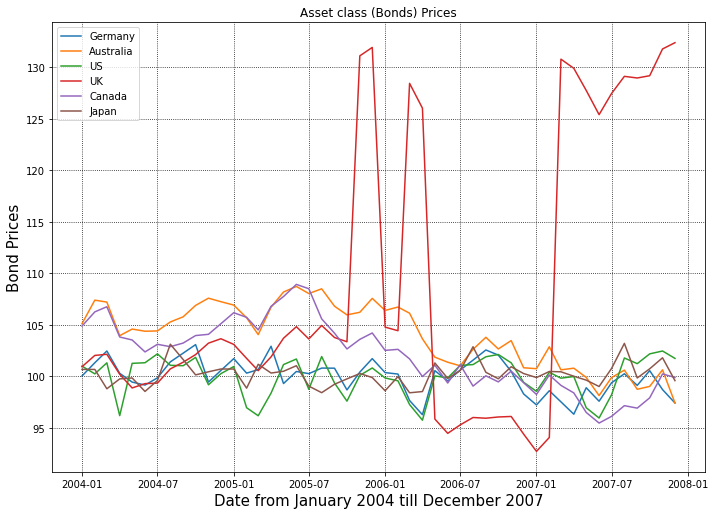

In [8]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df.index,bond_df.Germany, label='Germany')
plt.plot(bond_df.index,bond_df.Australia, label='Australia')
plt.plot(bond_df.index,bond_df.US, label='US')
plt.plot(bond_df.index,bond_df.UK, label='UK')
plt.plot(bond_df.index,bond_df.Canada, label='Canada')
plt.plot(bond_df.index,bond_df.Japan, label='Japan')
plt.title('Asset class (Bonds) Prices')
plt.xlabel('Date from January 2004 till December 2007', fontsize=15)
plt.ylabel('Bond Prices', fontsize=15)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [9]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df = bond_df[['Germany','Australia','US','UK','Canada','Japan']].pct_change()
bond_df

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2004-01-01       NaN        NaN       NaN       NaN       NaN       NaN
2004-02-01  0.012897   0.021789 -0.007427  0.010900  0.013159  0.000000
2004-03-01  0.011253  -0.001769  0.010675  0.001078  0.004706 -0.018677
2004-04-01 -0.021181  -0.030410 -0.050642 -0.018995 -0.027541  0.009719
2004-05-01 -0.008476   0.006157  0.052823 -0.013275 -0.002794  0.000902
2004-06-01 -0.002917  -0.002008  0.000593  0.004248 -0.011206 -0.013122
2004-07-01  0.007061   0.000287  0.008489  0.000504  0.007229  0.010759
2004-08-01  0.015525   0.008333 -0.010864  0.013893 -0.002231  0.035449
2004-09-01  0.008383   0.004750 -0.000396  0.006454  0.003402 -0.014451
2004-10-01  0.008118   0.010494  0.008018  0.007301  0.007072 -0.014662
2004-11-01 -0.035316   0.006549 -0.026122  0.010872  0.001154  0.002996
2004-12-01  0.011365  -0.003160  0.010890  0.004166  0.009897  0.002688
2005-01-01  0.011436  -0.003077  0.006883 -0.005307  0.010181  0.000000
2005-02-01 -0.013863  -0.011505 -0.039628 -0.013192 -0.004238 -0.018471
2005-03-01  0.003390  -0.015519 -0.008046 -0.011698 -0.011540  0.023472
2005-04-01  0.022556   0.025663  0.022879  0.013328  0.021914 -0.008403
2005-05-01 -0.035176   0.013776  0.028162  0.017766  0.008896  0.001695
2005-06-01  0.011784   0.004992  0.005340  0.010801  0.010952  0.005374
2005-07-01 -0.002090  -0.006347 -0.028917 -0.011354 -0.003856 -0.019600
2005-08-01  0.005387   0.004258  0.032209  0.012642 -0.027005 -0.006462
2005-09-01 -0.000099  -0.015577 -0.025218 -0.011150 -0.013167  0.008333
2005-10-01 -0.020937  -0.007865 -0.017717 -0.003951 -0.014686  0.005241
2005-11-01  0.017533   0.002359  0.025620  0.268699  0.009060  0.005214
2005-12-01  0.013048   0.012711  0.007194  0.006254  0.005986 -0.003890
2006-01-01 -0.013371  -0.010878 -0.009623 -0.205927 -0.016219 -0.012817
2006-02-01 -0.001395   0.003102 -0.002805 -0.003341  0.000976  0.013896
2006-03-01 -0.025646  -0.005622 -0.023104  0.230128 -0.009063 -0.015706
2006-04-01 -0.014134  -0.023464 -0.015630 -0.018762 -0.016817  0.001220
2006-05-01  0.044463  -0.017176  0.044918 -0.239606  0.011003  0.028220
2006-06-01 -0.009946  -0.004811 -0.001899 -0.014503 -0.017117 -0.014809
2006-07-01  0.010649  -0.003453  0.012119  0.008682  0.017918  0.007516
2006-08-01  0.009543   0.015840  0.000792  0.007557 -0.020570  0.023075
2006-09-01  0.009748   0.011402  0.007515 -0.000729  0.010097 -0.024110
2006-10-01 -0.004876  -0.010888  0.002159  0.001251 -0.005898 -0.006276
2006-11-01 -0.015483   0.007891 -0.007933  0.000521  0.010458  0.011729
2006-12-01 -0.021798  -0.025517 -0.018657 -0.017796 -0.011145 -0.006540
2007-01-01 -0.010887  -0.000893 -0.008852 -0.017800 -0.011472 -0.003890
2007-02-01  0.014196   0.021146  0.018776  0.014563  0.019241  0.005908
2007-03-01 -0.010954  -0.021777 -0.005678  0.390750 -0.010088 -0.000299
2007-04-01 -0.012306   0.001590  0.001603 -0.006804 -0.007366 -0.004282
2007-05-01  0.026685  -0.008930 -0.030309 -0.016550 -0.019313 -0.003800
2007-06-01 -0.013248  -0.017621 -0.010316 -0.018394 -0.010676 -0.006224
2007-07-01  0.018346   0.017835  0.023452  0.016346  0.006810  0.017677
2007-08-01  0.008857   0.007209  0.036460  0.013102  0.010822  0.024218
2007-09-01 -0.011273  -0.018491 -0.005404 -0.001239 -0.002471 -0.032561
2007-10-01  0.014428   0.002836  0.009385  0.001706  0.010320  0.008915
2007-11-01 -0.018301   0.016261  0.002741  0.020125  0.023698  0.010624
2007-12-01 -0.013171  -0.032002 -0.007028  0.004629 -0.003393 -0.021810

In [10]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df.dropna(axis=0, inplace=True)
bond_df

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2004-02-01  0.012897   0.021789 -0.007427  0.010900  0.013159  0.000000
2004-03-01  0.011253  -0.001769  0.010675  0.001078  0.004706 -0.018677
2004-04-01 -0.021181  -0.030410 -0.050642 -0.018995 -0.027541  0.009719
2004-05-01 -0.008476   0.006157  0.052823 -0.013275 -0.002794  0.000902
2004-06-01 -0.002917  -0.002008  0.000593  0.004248 -0.011206 -0.013122
2004-07-01  0.007061   0.000287  0.008489  0.000504  0.007229  0.010759
2004-08-01  0.015525   0.008333 -0.010864  0.013893 -0.002231  0.035449
2004-09-01  0.008383   0.004750 -0.000396  0.006454  0.003402 -0.014451
2004-10-01  0.008118   0.010494  0.008018  0.007301  0.007072 -0.014662
2004-11-01 -0.035316   0.006549 -0.026122  0.010872  0.001154  0.002996
2004-12-01  0.011365  -0.003160  0.010890  0.004166  0.009897  0.002688
2005-01-01  0.011436  -0.003077  0.006883 -0.005307  0.010181  0.000000
2005-02-01 -0.013863  -0.011505 -0.039628 -0.013192 -0.004238 -0.018471
2005-03-01  0.003390  -0.015519 -0.008046 -0.011698 -0.011540  0.023472
2005-04-01  0.022556   0.025663  0.022879  0.013328  0.021914 -0.008403
2005-05-01 -0.035176   0.013776  0.028162  0.017766  0.008896  0.001695
2005-06-01  0.011784   0.004992  0.005340  0.010801  0.010952  0.005374
2005-07-01 -0.002090  -0.006347 -0.028917 -0.011354 -0.003856 -0.019600
2005-08-01  0.005387   0.004258  0.032209  0.012642 -0.027005 -0.006462
2005-09-01 -0.000099  -0.015577 -0.025218 -0.011150 -0.013167  0.008333
2005-10-01 -0.020937  -0.007865 -0.017717 -0.003951 -0.014686  0.005241
2005-11-01  0.017533   0.002359  0.025620  0.268699  0.009060  0.005214
2005-12-01  0.013048   0.012711  0.007194  0.006254  0.005986 -0.003890
2006-01-01 -0.013371  -0.010878 -0.009623 -0.205927 -0.016219 -0.012817
2006-02-01 -0.001395   0.003102 -0.002805 -0.003341  0.000976  0.013896
2006-03-01 -0.025646  -0.005622 -0.023104  0.230128 -0.009063 -0.015706
2006-04-01 -0.014134  -0.023464 -0.015630 -0.018762 -0.016817  0.001220
2006-05-01  0.044463  -0.017176  0.044918 -0.239606  0.011003  0.028220
2006-06-01 -0.009946  -0.004811 -0.001899 -0.014503 -0.017117 -0.014809
2006-07-01  0.010649  -0.003453  0.012119  0.008682  0.017918  0.007516
2006-08-01  0.009543   0.015840  0.000792  0.007557 -0.020570  0.023075
2006-09-01  0.009748   0.011402  0.007515 -0.000729  0.010097 -0.024110
2006-10-01 -0.004876  -0.010888  0.002159  0.001251 -0.005898 -0.006276
2006-11-01 -0.015483   0.007891 -0.007933  0.000521  0.010458  0.011729
2006-12-01 -0.021798  -0.025517 -0.018657 -0.017796 -0.011145 -0.006540
2007-01-01 -0.010887  -0.000893 -0.008852 -0.017800 -0.011472 -0.003890
2007-02-01  0.014196   0.021146  0.018776  0.014563  0.019241  0.005908
2007-03-01 -0.010954  -0.021777 -0.005678  0.390750 -0.010088 -0.000299
2007-04-01 -0.012306   0.001590  0.001603 -0.006804 -0.007366 -0.004282
2007-05-01  0.026685  -0.008930 -0.030309 -0.016550 -0.019313 -0.003800
2007-06-01 -0.013248  -0.017621 -0.010316 -0.018394 -0.010676 -0.006224
2007-07-01  0.018346   0.017835  0.023452  0.016346  0.006810  0.017677
2007-08-01  0.008857   0.007209  0.036460  0.013102  0.010822  0.024218
2007-09-01 -0.011273  -0.018491 -0.005404 -0.001239 -0.002471 -0.032561
2007-10-01  0.014428   0.002836  0.009385  0.001706  0.010320  0.008915
2007-11-01 -0.018301   0.016261  0.002741  0.020125  0.023698  0.010624
2007-12-01 -0.013171  -0.032002 -0.007028  0.004629 -0.003393 -0.021810

In [11]:
print('There are {} rows in the DataFrame'.format(bond_df.shape[0]))

There are 47 rows in the DataFrame


In [12]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
bond_df_2 = bond_df.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.
- The dataset (Bond_2004_2007) cover a period of four years, so one year has 252 days of trading days or 12 months * 4 years equal 48 minus one month equal 47 months.

In [13]:
volatility_df = bond_df

In [14]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

volatility_df['Germany_Vol'] = volatility_df['Germany'].rolling(47).std() * math.sqrt(47)
volatility_df['Australia_Vol'] = volatility_df['Australia'].rolling(47).std() * math.sqrt(47)
volatility_df['US_Vol'] = volatility_df['US'].rolling(47).std() * math.sqrt(47)
volatility_df['UK_Vol'] = volatility_df['UK'].rolling(47).std() * math.sqrt(47)
volatility_df['Canada_Vol'] = volatility_df['Canada'].rolling(47).std() * math.sqrt(47)
volatility_df['Japan_Vol'] = volatility_df['Japan'].rolling(47).std() * math.sqrt(47)

In [15]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
volatility_df.dropna(axis=0, inplace=True)

In [16]:
volatility_df[['Germany_Vol','Australia_Vol','US_Vol','UK_Vol','Canada_Vol','Japan_Vol']]

Germany_Vol  Australia_Vol   US_Vol    UK_Vol  Canada_Vol  \
Date                                                                    
2007-12-01     0.113803       0.095646  0.14365  0.622277    0.088115   

            Japan_Vol  
Date                   
2007-12-01   0.099797

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [17]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility = (0.113803 + 0.095646 + 0.14365 + 0.622277 + 0.088115 + 0.099797) / 6
volatility

0.19388133333333332

In [18]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol = 0.19388133333333332 / 6
target_vol

0.032313555555555554

In [19]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
portfolio_df = bond_df

In [20]:
portfolio_df['Germany_Alloc'] = target_vol / volatility_df['Germany_Vol'] 
portfolio_df['Australia_Alloc'] = target_vol / volatility_df['Australia_Vol'] 
portfolio_df['US_Alloc'] = target_vol / volatility_df['US_Vol']
portfolio_df['UK_Alloc'] = target_vol / volatility_df['UK_Vol']
portfolio_df['Canada_Alloc'] = target_vol / volatility_df['Canada_Vol']
portfolio_df['Japan_Alloc'] = target_vol / volatility_df['Japan_Vol']

In [21]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
portfolio_df.dropna(axis=0, inplace=True)

In [22]:
portfolio_df[['Germany_Alloc','Australia_Alloc','US_Alloc','UK_Alloc','Canada_Alloc','Japan_Alloc']]

Germany_Alloc  Australia_Alloc  US_Alloc  UK_Alloc  Canada_Alloc  \
Date                                                                           
2007-12-01       0.283943         0.337846  0.224947  0.051928      0.366721   

            Japan_Alloc  
Date                     
2007-12-01     0.323791

In [23]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (bonds)

In [24]:
bond_df_2['Germany_R'] = bond_df_2['Germany'] * 0.283943
bond_df_2['Australia_R'] = bond_df_2['Australia'] * 0.337846
bond_df_2['US_R'] = bond_df_2['US'] * 0.224947
bond_df_2['UK_R'] = bond_df_2['UK'] * 0.051928
bond_df_2['Canada_R'] = bond_df_2['Canada'] * 0.366721
bond_df_2['Japan_R'] = bond_df_2['Japan'] * 0.323791

In [25]:
bond_df_2

Germany  Australia        US        UK    Canada     Japan  \
Date                                                                      
2004-02-01  0.012897   0.021789 -0.007427  0.010900  0.013159  0.000000   
2004-03-01  0.011253  -0.001769  0.010675  0.001078  0.004706 -0.018677   
2004-04-01 -0.021181  -0.030410 -0.050642 -0.018995 -0.027541  0.009719   
2004-05-01 -0.008476   0.006157  0.052823 -0.013275 -0.002794  0.000902   
2004-06-01 -0.002917  -0.002008  0.000593  0.004248 -0.011206 -0.013122   
2004-07-01  0.007061   0.000287  0.008489  0.000504  0.007229  0.010759   
2004-08-01  0.015525   0.008333 -0.010864  0.013893 -0.002231  0.035449   
2004-09-01  0.008383   0.004750 -0.000396  0.006454  0.003402 -0.014451   
2004-10-01  0.008118   0.010494  0.008018  0.007301  0.007072 -0.014662   
2004-11-01 -0.035316   0.006549 -0.026122  0.010872  0.001154  0.002996   
2004-12-01  0.011365  -0.003160  0.010890  0.004166  0.009897  0.002688   
2005-01-01  0.011436  -0.003077  0.006883 -0.005307  0.010181  0.000000   
2005-02-01 -0.013863  -0.011505 -0.039628 -0.013192 -0.004238 -0.018471   
2005-03-01  0.003390  -0.015519 -0.008046 -0.011698 -0.011540  0.023472   
2005-04-01  0.022556   0.025663  0.022879  0.013328  0.021914 -0.008403   
2005-05-01 -0.035176   0.013776  0.028162  0.017766  0.008896  0.001695   
2005-06-01  0.011784   0.004992  0.005340  0.010801  0.010952  0.005374   
2005-07-01 -0.002090  -0.006347 -0.028917 -0.011354 -0.003856 -0.019600   
2005-08-01  0.005387   0.004258  0.032209  0.012642 -0.027005 -0.006462   
2005-09-01 -0.000099  -0.015577 -0.025218 -0.011150 -0.013167  0.008333   
2005-10-01 -0.020937  -0.007865 -0.017717 -0.003951 -0.014686  0.005241   
2005-11-01  0.017533   0.002359  0.025620  0.268699  0.009060  0.005214   
2005-12-01  0.013048   0.012711  0.007194  0.006254  0.005986 -0.003890   
2006-01-01 -0.013371  -0.010878 -0.009623 -0.205927 -0.016219 -0.012817   
2006-02-01 -0.001395   0.003102 -0.002805 -0.003341  0.000976  0.013896   
2006-03-01 -0.025646  -0.005622 -0.023104  0.230128 -0.009063 -0.015706   
2006-04-01 -0.014134  -0.023464 -0.015630 -0.018762 -0.016817  0.001220   
2006-05-01  0.044463  -0.017176  0.044918 -0.239606  0.011003  0.028220   
2006-06-01 -0.009946  -0.004811 -0.001899 -0.014503 -0.017117 -0.014809   
2006-07-01  0.010649  -0.003453  0.012119  0.008682  0.017918  0.007516   
2006-08-01  0.009543   0.015840  0.000792  0.007557 -0.020570  0.023075   
2006-09-01  0.009748   0.011402  0.007515 -0.000729  0.010097 -0.024110   
2006-10-01 -0.004876  -0.010888  0.002159  0.001251 -0.005898 -0.006276   
2006-11-01 -0.015483   0.007891 -0.007933  0.000521  0.010458  0.011729   
2006-12-01 -0.021798  -0.025517 -0.018657 -0.017796 -0.011145 -0.006540   
2007-01-01 -0.010887  -0.000893 -0.008852 -0.017800 -0.011472 -0.003890   
2007-02-01  0.014196   0.021146  0.018776  0.014563  0.019241  0.005908   
2007-03-01 -0.010954  -0.021777 -0.005678  0.390750 -0.010088 -0.000299   
2007-04-01 -0.012306   0.001590  0.001603 -0.006804 -0.007366 -0.004282   
2007-05-01  0.026685  -0.008930 -0.030309 -0.016550 -0.019313 -0.003800   
2007-06-01 -0.013248  -0.017621 -0.010316 -0.018394 -0.010676 -0.006224   
2007-07-01  0.018346   0.017835  0.023452  0.016346  0.006810  0.017677   
2007-08-01  0.008857   0.007209  0.036460  0.013102  0.010822  0.024218   
2007-09-01 -0.011273  -0.018491 -0.005404 -0.001239 -0.002471 -0.032561   
2007-10-01  0.014428   0.002836  0.009385  0.001706  0.010320  0.008915   
2007-11-01 -0.018301   0.016261  0.002741  0.020125  0.023698  0.010624   
2007-12-01 -0.013171  -0.032002 -0.007028  0.004629 -0.003393 -0.021810   

            Germany_R  Australia_R      US_R      UK_R  Canada_R   Japan_R  
Date                                                                        
2004-02-01   0.003662     0.007361 -0.001671  0.000566  0.004826  0.000000  
2004-03-01   0.003195    -0.000598  0.002401  0.000056  0.001726 -0.006047  
2004-04-01  -0.006014    -0.0

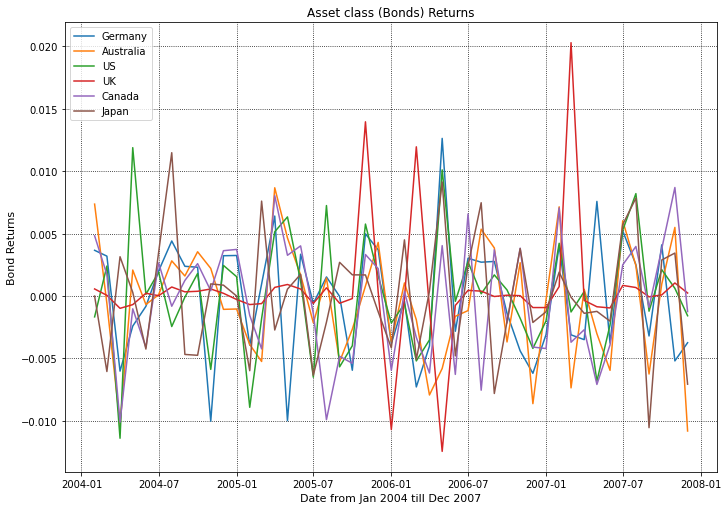

In [26]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2.index,bond_df_2.Germany_R, label='Germany')
plt.plot(bond_df_2.index,bond_df_2.Australia_R, label='Australia')
plt.plot(bond_df_2.index,bond_df_2.US_R, label='US')
plt.plot(bond_df_2.index,bond_df_2.UK_R, label='UK')
plt.plot(bond_df_2.index,bond_df_2.Canada_R, label='Canada')
plt.plot(bond_df_2.Japan_R, label='Japan')
plt.title('Asset class (Bonds) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=11)
plt.ylabel('Bond Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [27]:
# Adding up all the returns of all asset classes for all countries

In [28]:
bond_df_2['Portfolio_R'] = bond_df_2['Germany_R'] + bond_df_2['Australia_R'] + bond_df_2['US_R'] + bond_df_2['UK_R'] + bond_df_2['Canada_R'] + bond_df_2['Japan_R']

In [29]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [30]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
bond_df_2['Portfolio_Value'] = ((bond_df_2['Portfolio_R'] + 1).cumprod())*1000

In [31]:
bond_df_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R', 'Portfolio_R', 'Portfolio_Value']]

Germany_R  Australia_R      US_R      UK_R  Canada_R   Japan_R  \
Date                                                                         
2004-02-01   0.003662     0.007361 -0.001671  0.000566  0.004826  0.000000   
2004-03-01   0.003195    -0.000598  0.002401  0.000056  0.001726 -0.006047   
2004-04-01  -0.006014    -0.010274 -0.011392 -0.000986 -0.010100  0.003147   
2004-05-01  -0.002407     0.002080  0.011882 -0.000689 -0.001024  0.000292   
2004-06-01  -0.000828    -0.000678  0.000133  0.000221 -0.004109 -0.004249   
2004-07-01   0.002005     0.000097  0.001910  0.000026  0.002651  0.003484   
2004-08-01   0.004408     0.002815 -0.002444  0.000721 -0.000818  0.011478   
2004-09-01   0.002380     0.001605 -0.000089  0.000335  0.001248 -0.004679   
2004-10-01   0.002305     0.003546  0.001804  0.000379  0.002594 -0.004748   
2004-11-01  -0.010028     0.002213 -0.005876  0.000565  0.000423  0.000970   
2004-12-01   0.003227    -0.001068  0.002450  0.000216  0.003630  0.000870   
2005-01-01   0.003247    -0.001040  0.001548 -0.000276  0.003734  0.000000   
2005-02-01  -0.003936    -0.003887 -0.008914 -0.000685 -0.001554 -0.005981   
2005-03-01   0.000963    -0.005243 -0.001810 -0.000607 -0.004232  0.007600   
2005-04-01   0.006405     0.008670  0.005146  0.000692  0.008036 -0.002721   
2005-05-01  -0.009988     0.004654  0.006335  0.000923  0.003262  0.000549   
2005-06-01   0.003346     0.001686  0.001201  0.000561  0.004016  0.001740   
2005-07-01  -0.000594    -0.002144 -0.006505 -0.000590 -0.001414 -0.006346   
2005-08-01   0.001529     0.001439  0.007245  0.000656 -0.009903 -0.002092   
2005-09-01  -0.000028    -0.005263 -0.005673 -0.000579 -0.004828  0.002698   
2005-10-01  -0.005945    -0.002657 -0.003985 -0.000205 -0.005386  0.001697   
2005-11-01   0.004978     0.000797  0.005763  0.013953  0.003322  0.001688   
2005-12-01   0.003705     0.004294  0.001618  0.000325  0.002195 -0.001260   
2006-01-01  -0.003797    -0.003675 -0.002165 -0.010693 -0.005948 -0.004150   
2006-02-01  -0.000396     0.001048 -0.000631 -0.000173  0.000358  0.004499   
2006-03-01  -0.007282    -0.001899 -0.005197  0.011950 -0.003324 -0.005086   
2006-04-01  -0.004013    -0.007927 -0.003516 -0.000974 -0.006167  0.000395   
2006-05-01   0.012625    -0.005803  0.010104 -0.012442  0.004035  0.009138   
2006-06-01  -0.002824    -0.001625 -0.000427 -0.000753 -0.006277 -0.004795   
2006-07-01   0.003024    -0.001167  0.002726  0.000451  0.006571  0.002434   
2006-08-01   0.002710     0.005351  0.000178  0.000392 -0.007543  0.007472   
2006-09-01   0.002768     0.003852  0.001690 -0.000038  0.003703 -0.007807   
2006-10-01  -0.001384    -0.003679  0.000486  0.000065 -0.002163 -0.002032   
2006-11-01  -0.004396     0.002666 -0.001784  0.000027  0.003835  0.003798   
2006-12-01  -0.006189    -0.008621 -0.004197 -0.000924 -0.004087 -0.002118   
2007-01-01  -0.003091    -0.000302 -0.001991 -0.000924 -0.004207 -0.001260   
2007-02-01   0.004031     0.007144  0.004224  0.000756  0.007056  0.001913   
2007-03-01  -0.003110    -0.007357 -0.001277  0.020291 -0.003699 -0.000097   
2007-04-01  -0.003494     0.000537  0.000361 -0.000353 -0.002701 -0.001386   
2007-05-01   0.007577    -0.003017 -0.006818 -0.000859 -0.007082 -0.001230   
2007-06-01  -0.003762    -0.005953 -0.002320 -0.000955 -0.003915 -0.002015   
2007-07-01   0.005209     0.006026  0.005275  0.000849  0.002497  0.005724   
2007-08-01   0.002515     0.002436  0.008202  0.000680  0.003969  0.007842   
2007-09-01  -0.003201    -0.006247 -0.001216 -0.000064 -0.000906 -0.010543   
2007-10-01   0.004097     0.000958  0.002111  0.000089  0.003785  0.002887   
2007-11-01  -0.005196     0.005494  0.000616  0.001045  0.008690  0.003440   
2007-12-01  -0.003740    -0.010812 -0.001581  0.000240 -0.001244 -0.007062   

            Portfolio_R  Portfolio_Value  
Date                                      
2004-02-01     0.014744      1014.744390  
2004-03-01     0.000733      1015.488346  
2004-04-01    -0.

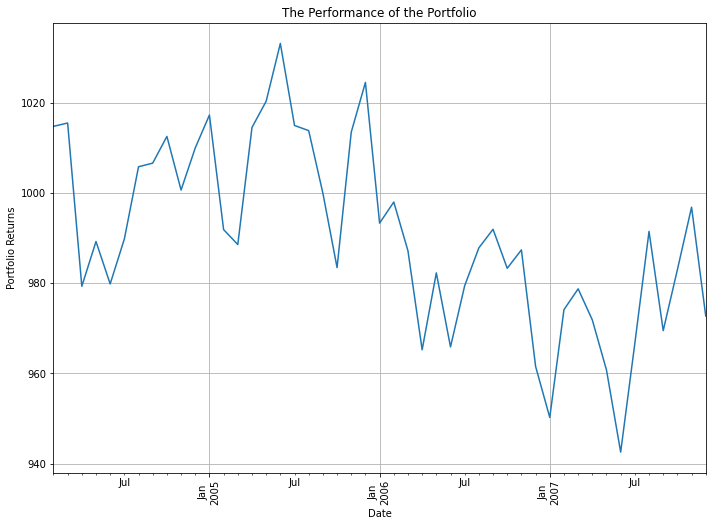

In [32]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2004 till Dec 2007');
plt.ylabel('Portfolio Returns');
bond_df_2['Portfolio_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [33]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(bond_df_2.Portfolio_Value.max() - bond_df_2.Portfolio_Value.min()) / bond_df_2.Portfolio_Value.max()

0.08763512049148023

In [34]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (bond_df_2['Portfolio_Value'][-1] / bond_df_2['Portfolio_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is -4.14%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [35]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
bond_df_2['Monthly_Return'] = bond_df_2['Portfolio_Value'].pct_change(1)

In [36]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = bond_df_2['Monthly_Return'].mean() / bond_df_2['Monthly_Return'].std()
Sharpe_Ratio

-0.046304959305176495

In [37]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

-0.3174508072819164

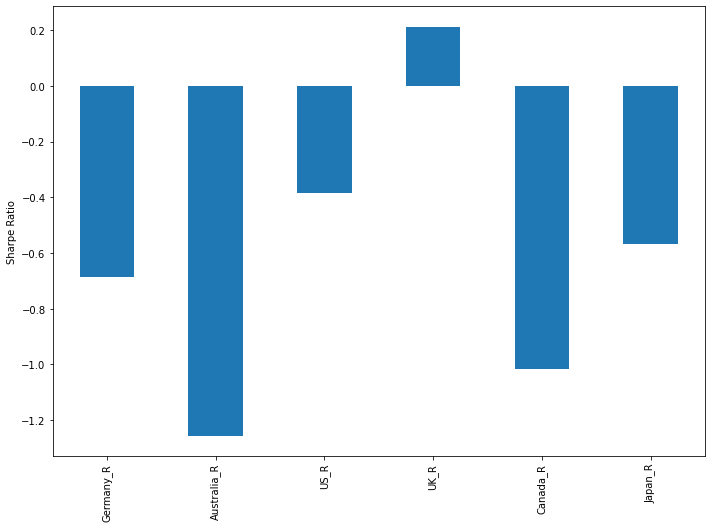

In [38]:
# Calcualte the Sharpe Ratio for bond portfolio
def bond_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = bond_df_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sharpes = bond_df_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
bond_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

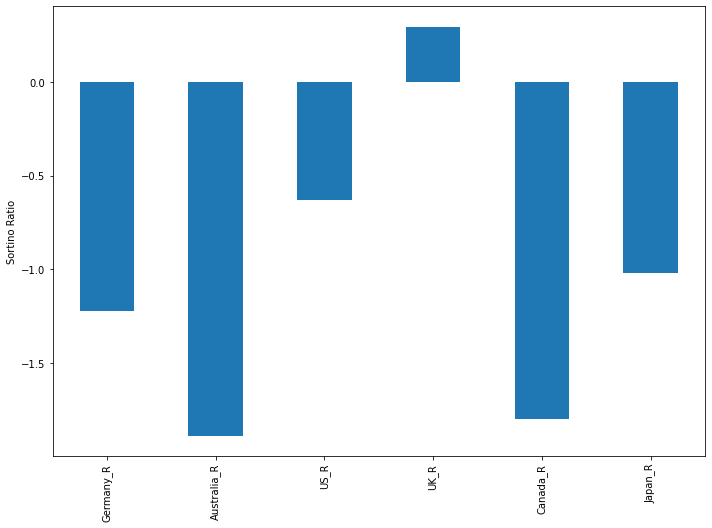

In [39]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = bond_df_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sortinos = bond_df_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
bond_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

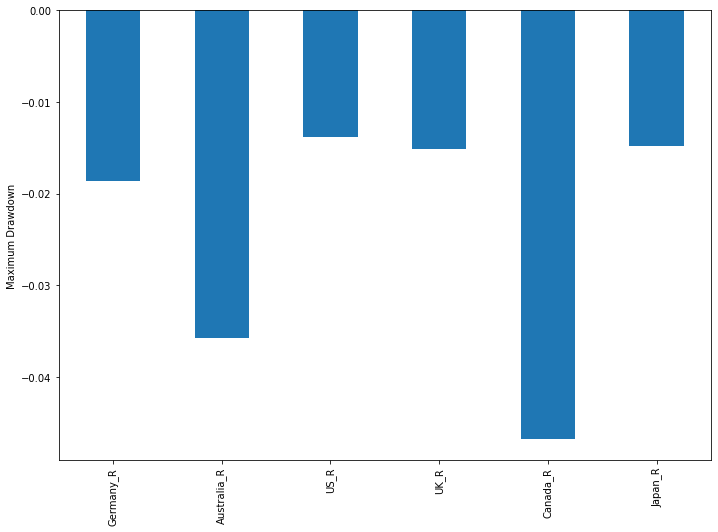

In [40]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def bond_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = bond_df_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_max_drawdown = bond_df_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
bond_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 3.23 %.
- Maximum Drawdown 8.7%.
- Cumulative return of the o=portfolio -4.14%
- Sharpe Ratio - 4.6%.


In [41]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import datetime
from datetime import datetime

In [42]:
# Dataset (Equity.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df = pd.read_csv('Equity_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df.head()

(48, 15)


Date  Australia  Nethelands  Germany   Canada    Hong_Kong     France   \
0  1/1/2004     3272.0      353.31  4058.60  8521.39  13289370117  3638439941   
1  2/1/2004     3360.6      356.59  4018.16  8788.49  13907030273  3725439941   
2  3/1/2004     3415.3      338.87  3856.70  8585.93  12681669922  3625229980   
3  4/1/2004     3400.8      341.41  3985.21  8243.97  11942959961  3674280029   
4  5/1/2004     3460.2      337.19  3921.41  8417.32  12198240234  3669629883   

      Belgium          US    Japan    Spain  Sweden        UK   Italy  \
0  2383760010  1131130005  10783.61  7929.9   673.91  4390.68  103.48   
1  2483159912  1144939941  11041.92  8249.4   698.18  4492.21  107.12   
2  2380350098  1126209961  11715.39  8018.1   690.28  4385.67  110.94   
3  2439610107  1107300049  11761.79  8109.5   685.59  4489.69  106.04   
4  2415429932  1120680054  11236.37  7959.3   673.95  4430.69  109.46   

   Singapore  
0    3253.59  
1    3244.15  
2    3434.66  
3    3141.85  
4    3288.77

In [43]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        48 non-null     object 
 1   Australia   48 non-null     float64
 2   Nethelands  48 non-null     float64
 3   Germany     48 non-null     float64
 4   Canada      48 non-null     float64
 5   Hong_Kong   48 non-null     int64  
 6   France      48 non-null     int64  
 7   Belgium     48 non-null     int64  
 8   US          48 non-null     int64  
 9   Japan       48 non-null     float64
 10  Spain       48 non-null     float64
 11  Sweden      48 non-null     float64
 12  UK          48 non-null     float64
 13  Italy       48 non-null     float64
 14  Singapore   48 non-null     float64
dtypes: float64(10), int64(4), object(1)
memory usage: 5.8+ KB


In [44]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df['Date'] = pd.to_datetime(equity_df.Date)

In [45]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        48 non-null     datetime64[ns]
 1   Australia   48 non-null     float64       
 2   Nethelands  48 non-null     float64       
 3   Germany     48 non-null     float64       
 4   Canada      48 non-null     float64       
 5   Hong_Kong   48 non-null     int64         
 6   France      48 non-null     int64         
 7   Belgium     48 non-null     int64         
 8   US          48 non-null     int64         
 9   Japan       48 non-null     float64       
 10  Spain       48 non-null     float64       
 11  Sweden      48 non-null     float64       
 12  UK          48 non-null     float64       
 13  Italy       48 non-null     float64       
 14  Singapore   48 non-null     float64       
dtypes: datetime64[ns](1), float64(10), int64(4)
memory usage: 5.8 KB


In [46]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df.set_index('Date',inplace=True)

In [47]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
equity_df.isnull().any()

Australia     False
Nethelands    False
Germany       False
Canada        False
Hong_Kong     False
France        False
Belgium       False
US            False
Japan         False
Spain         False
Sweden        False
UK            False
Italy         False
Singapore     False
dtype: bool

In [48]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df = equity_df.rename(columns={'France ':'France'})
equity_df = equity_df.rename(columns={'Japan ':'Japan'})
equity_df = equity_df.rename(columns={'Sweden ':'Sweden'})

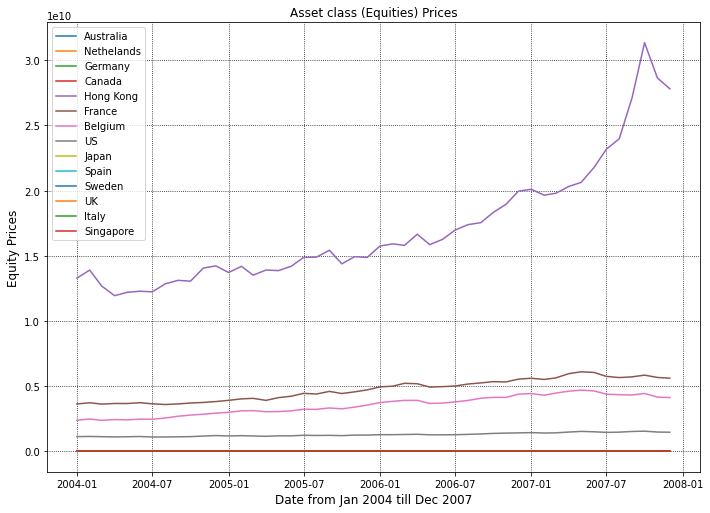

In [49]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df.index, equity_df.Australia, label='Australia')
plt.plot(equity_df.index, equity_df.Nethelands, label='Nethelands')
plt.plot(equity_df.index, equity_df.Germany, label='Germany')
plt.plot(equity_df.index, equity_df.Canada, label='Canada')
plt.plot(equity_df.index, equity_df.Hong_Kong, label='Hong Kong')
plt.plot(equity_df.index, equity_df.France, label='France')
plt.plot(equity_df.index, equity_df.Belgium, label='Belgium')
plt.plot(equity_df.index, equity_df.US, label='US')
plt.plot(equity_df.index, equity_df.Japan, label='Japan')
plt.plot(equity_df.index, equity_df.Spain, label='Spain')
plt.plot(equity_df.index, equity_df.Sweden, label='Sweden')
plt.plot(equity_df.index, equity_df.UK, label='UK')
plt.plot(equity_df.index, equity_df.Italy, label='Italy')
plt.plot(equity_df.index, equity_df.Singapore, label='Singapore')
plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [50]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df = equity_df[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                       'US','Japan','Spain','Sweden','UK','Italy','Singapore']].pct_change()
equity_df

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2004-01-01        NaN         NaN       NaN       NaN        NaN       NaN   
2004-02-01   0.027078    0.009284 -0.009964  0.031345   0.046478  0.023911   
2004-03-01   0.016277   -0.049693 -0.040183 -0.023048  -0.088111 -0.026899   
2004-04-01  -0.004246    0.007495  0.033321 -0.039828  -0.058250  0.013530   
2004-05-01   0.017466   -0.012361 -0.016009  0.021027   0.021375 -0.001266   
2004-06-01   0.021010    0.023548  0.033488  0.015238   0.007174  0.017266   
2004-07-01   0.000906   -0.044099 -0.038769 -0.010240  -0.003884 -0.023008   
2004-08-01   0.004694   -0.020581 -0.028340 -0.009581   0.050028 -0.014483   
2004-09-01   0.031610    0.002538  0.028450  0.034769   0.020992  0.012890   
2004-10-01   0.030996    0.020189  0.017301  0.023382  -0.004982  0.018187   
2004-11-01   0.040412    0.020183  0.041853  0.017933   0.077014  0.012660   
2004-12-01   0.030346    0.032419  0.031527  0.023987   0.012097  0.017958   
2005-01-01   0.013998    0.035452 -0.000289 -0.004607  -0.035730  0.024215   
2005-02-01   0.015947    0.038705  0.022478  0.050442   0.034519  0.028993   
2005-03-01  -0.015098   -0.012848 -0.000395 -0.005786  -0.047795  0.010087   
2005-04-01  -0.030804   -0.057798 -0.037696 -0.025288   0.029007 -0.038367   
2005-05-01   0.030930    0.047329  0.065902  0.025402  -0.003012  0.053434   
2005-06-01   0.041667    0.052512  0.028169  0.030755   0.024085  0.026359   
2005-07-01   0.026020    0.031108  0.065460  0.052527   0.047878  0.052583   
2005-08-01   0.013215   -0.015590 -0.011626  0.023603   0.001517 -0.011766   
2005-09-01   0.043717    0.034369  0.044398  0.032139   0.035224  0.045611   
2005-10-01  -0.039106   -0.021911 -0.022809 -0.057076  -0.067547 -0.035559   
2005-11-01   0.039263    0.062487  0.053627  0.042455   0.038284  0.029519   
2005-12-01   0.027747    0.042957  0.041372  0.041400  -0.004064  0.032364   
2006-01-01   0.034891    0.031412  0.049164  0.059738   0.058933  0.049363   
2006-02-01  -0.001684    0.018246  0.021482 -0.021539   0.010496  0.010602   
2006-03-01   0.042347    0.021734  0.030027  0.036127  -0.007126  0.044076   
2006-04-01   0.025167    0.001515  0.006668  0.007725   0.054176 -0.006216   
2006-05-01  -0.048889   -0.061760 -0.052751 -0.037663  -0.048220 -0.049769   
2006-06-01   0.014435   -0.000363 -0.001678 -0.011209   0.025838  0.007257   
2006-07-01  -0.017324    0.031369 -0.000236  0.018780   0.043259  0.008752   
2006-08-01   0.025953    0.032925  0.031257  0.020522   0.024802  0.031065   
2006-09-01   0.007565    0.031151  0.024705 -0.025881   0.008669  0.016451   
2006-10-01   0.044683    0.006100  0.044067  0.049597   0.044536  0.018804   
2006-11-01   0.018145   -0.018291  0.006424  0.033034   0.034715 -0.003943   
2006-12-01   0.034257    0.036992  0.045605  0.012234   0.052965  0.040190   
2007-01-01   0.018254    0.009024  0.029133  0.009740   0.007097  0.012009   
2007-02-01   0.010237   -0.019207 -0.010851  0.000836  -0.022625 -0.016402   
2007-03-01   0.027861    0.041390  0.030019  0.009236   0.007603  0.021362   
2007-04-01   0.028524    0.039785  0.071106  0.019079   0.026163  0.057840   
2007-05-01   0.023922    0.018048  0.064000  0.047709   0.015527  0.024154   
2007-06-01  -0.006114    0.014471  0.015765 -0.010686   0.055163 -0.008039   
2007-07-01  -0.020829   -0.025939 -0.052849 -0.002728   0.064861 -0.050182   
2007-08-01   0.016764   -0.021087  0.007124 -0.015009   0.034471 -0.015368   
2007-09-01   0.051319    0.034913  0.029240  0.032093   0.131684  0.009358   
2007-10-01   0.028366    0.012699  0.020061  0.037316   0.155112  0.023140   
2007-11-01  -0.032721   -0.073506 -0.018543 -0.063992  -0.086403 -0.030332   
2007-12-01  -0.029588    0.016135  0.025005  0.010515  -0.029010 -0.009962   

             Belgium        US     Japan     Spain    Sweden        UK  \
Date                                 

In [51]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df.dropna(axis=0, inplace=True)
equity_df

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2004-02-01   0.027078    0.009284 -0.009964  0.031345   0.046478  0.023911   
2004-03-01   0.016277   -0.049693 -0.040183 -0.023048  -0.088111 -0.026899   
2004-04-01  -0.004246    0.007495  0.033321 -0.039828  -0.058250  0.013530   
2004-05-01   0.017466   -0.012361 -0.016009  0.021027   0.021375 -0.001266   
2004-06-01   0.021010    0.023548  0.033488  0.015238   0.007174  0.017266   
2004-07-01   0.000906   -0.044099 -0.038769 -0.010240  -0.003884 -0.023008   
2004-08-01   0.004694   -0.020581 -0.028340 -0.009581   0.050028 -0.014483   
2004-09-01   0.031610    0.002538  0.028450  0.034769   0.020992  0.012890   
2004-10-01   0.030996    0.020189  0.017301  0.023382  -0.004982  0.018187   
2004-11-01   0.040412    0.020183  0.041853  0.017933   0.077014  0.012660   
2004-12-01   0.030346    0.032419  0.031527  0.023987   0.012097  0.017958   
2005-01-01   0.013998    0.035452 -0.000289 -0.004607  -0.035730  0.024215   
2005-02-01   0.015947    0.038705  0.022478  0.050442   0.034519  0.028993   
2005-03-01  -0.015098   -0.012848 -0.000395 -0.005786  -0.047795  0.010087   
2005-04-01  -0.030804   -0.057798 -0.037696 -0.025288   0.029007 -0.038367   
2005-05-01   0.030930    0.047329  0.065902  0.025402  -0.003012  0.053434   
2005-06-01   0.041667    0.052512  0.028169  0.030755   0.024085  0.026359   
2005-07-01   0.026020    0.031108  0.065460  0.052527   0.047878  0.052583   
2005-08-01   0.013215   -0.015590 -0.011626  0.023603   0.001517 -0.011766   
2005-09-01   0.043717    0.034369  0.044398  0.032139   0.035224  0.045611   
2005-10-01  -0.039106   -0.021911 -0.022809 -0.057076  -0.067547 -0.035559   
2005-11-01   0.039263    0.062487  0.053627  0.042455   0.038284  0.029519   
2005-12-01   0.027747    0.042957  0.041372  0.041400  -0.004064  0.032364   
2006-01-01   0.034891    0.031412  0.049164  0.059738   0.058933  0.049363   
2006-02-01  -0.001684    0.018246  0.021482 -0.021539   0.010496  0.010602   
2006-03-01   0.042347    0.021734  0.030027  0.036127  -0.007126  0.044076   
2006-04-01   0.025167    0.001515  0.006668  0.007725   0.054176 -0.006216   
2006-05-01  -0.048889   -0.061760 -0.052751 -0.037663  -0.048220 -0.049769   
2006-06-01   0.014435   -0.000363 -0.001678 -0.011209   0.025838  0.007257   
2006-07-01  -0.017324    0.031369 -0.000236  0.018780   0.043259  0.008752   
2006-08-01   0.025953    0.032925  0.031257  0.020522   0.024802  0.031065   
2006-09-01   0.007565    0.031151  0.024705 -0.025881   0.008669  0.016451   
2006-10-01   0.044683    0.006100  0.044067  0.049597   0.044536  0.018804   
2006-11-01   0.018145   -0.018291  0.006424  0.033034   0.034715 -0.003943   
2006-12-01   0.034257    0.036992  0.045605  0.012234   0.052965  0.040190   
2007-01-01   0.018254    0.009024  0.029133  0.009740   0.007097  0.012009   
2007-02-01   0.010237   -0.019207 -0.010851  0.000836  -0.022625 -0.016402   
2007-03-01   0.027861    0.041390  0.030019  0.009236   0.007603  0.021362   
2007-04-01   0.028524    0.039785  0.071106  0.019079   0.026163  0.057840   
2007-05-01   0.023922    0.018048  0.064000  0.047709   0.015527  0.024154   
2007-06-01  -0.006114    0.014471  0.015765 -0.010686   0.055163 -0.008039   
2007-07-01  -0.020829   -0.025939 -0.052849 -0.002728   0.064861 -0.050182   
2007-08-01   0.016764   -0.021087  0.007124 -0.015009   0.034471 -0.015368   
2007-09-01   0.051319    0.034913  0.029240  0.032093   0.131684  0.009358   
2007-10-01   0.028366    0.012699  0.020061  0.037316   0.155112  0.023140   
2007-11-01  -0.032721   -0.073506 -0.018543 -0.063992  -0.086403 -0.030332   
2007-12-01  -0.029588    0.016135  0.025005  0.010515  -0.029010 -0.009962   

             Belgium        US     Japan     Spain    Sweden        UK  \
Date                                                                     
2004-02-01  0.041699  0.012209  0.023954 

In [52]:
print('There are {} rows in the DataFrame'.format(equity_df.shape[0]))

There are 47 rows in the DataFrame


In [53]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
equity_df_2 = equity_df.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.
- The dataset (equity_2004_2007) cover a period of four years, so one year has 252 days of trading days or 12 months * 4 years equal 48 minus two months (null values) equal 46 months.

In [54]:
volatility_equity_df = equity_df

In [55]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

volatility_equity_df['Australia_Vol'] = volatility_equity_df['Australia'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Nethelands_Vol'] = volatility_equity_df['Nethelands'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Germany_Vol'] = volatility_equity_df['Germany'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Canada_Vol'] = volatility_equity_df['Canada'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Hong_Kong_Vol'] = volatility_equity_df['Hong_Kong'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['France_Vol'] = volatility_equity_df['France'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Belgium_Vol'] = volatility_equity_df['Belgium'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['US_Vol'] = volatility_equity_df['US'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Japan_Vol'] = volatility_equity_df['Japan'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Spain_Vol'] = volatility_equity_df['Spain'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Sweden_Vol'] = volatility_equity_df['Sweden'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['UK_Vol'] = volatility_equity_df['UK'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Italy_Vol'] = volatility_equity_df['Italy'].rolling(46).std() * math.sqrt(46)
volatility_equity_df['Singapore_Vol'] = volatility_equity_df['Singapore'].rolling(46).std() * math.sqrt(46)

In [56]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
volatility_equity_df.dropna(axis=0, inplace=True)

In [57]:
volatility_equity_df[['Australia_Vol','Nethelands_Vol','Germany_Vol','Canada_Vol','Hong_Kong_Vol','France_Vol',
                      'Belgium_Vol','US_Vol','Japan_Vol','Spain_Vol','Sweden_Vol','UK_Vol','Italy_Vol','Singapore_Vol']]

Australia_Vol  Nethelands_Vol  Germany_Vol  Canada_Vol  \
Date                                                                 
2007-11-01       0.159626        0.218603     0.218120    0.199665   
2007-12-01       0.165350        0.218738     0.216828    0.198555   

            Hong_Kong_Vol  France_Vol  Belgium_Vol    US_Vol  Japan_Vol  \
Date                                                                      
2007-11-01       0.321088    0.183900     0.202774  0.150557   0.270797   
2007-12-01       0.323091    0.184409     0.201620  0.151137   0.272295   

            Spain_Vol  Sweden_Vol    UK_Vol  Italy_Vol  Singapore_Vol  
Date                                                                   
2007-11-01   0.216476    0.241703  0.151231   0.460971       0.316170  
2007-12-01   0.221105    0.242754  0.150565   0.462375       0.320087

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [58]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_volatility_equity = (0.159626 + 0.218603 + 0.218120 + 0.199665 + 0.321088 + 0.183900 + 0.202774 + 0.150557 + 0.270797 + 0.216476 + 0.241703 + 0.151231 + 0.460971 + 0.316170) / 14
Avg_volatility_equity

0.23654864285714283

In [59]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
equity_target_vol = 0.23654864285714283 / 14
equity_target_vol

0.01689633163265306

In [60]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
portfolio_equity_df = equity_df

In [61]:
portfolio_equity_df['Australia_Alloc'] = equity_target_vol / volatility_equity_df['Australia_Vol'] 
portfolio_equity_df['Nethelands_Alloc'] = equity_target_vol / volatility_equity_df['Nethelands_Vol'] 
portfolio_equity_df['Germany_Alloc'] = equity_target_vol / volatility_equity_df['Germany_Vol'] 
portfolio_equity_df['Canada_Alloc'] = equity_target_vol / volatility_equity_df['Canada_Vol']
portfolio_equity_df['Hong_Kong_Alloc'] = equity_target_vol / volatility_equity_df['Hong_Kong_Vol']
portfolio_equity_df['France_Alloc'] = equity_target_vol / volatility_equity_df['France_Vol']
portfolio_equity_df['Belgium_Alloc'] = equity_target_vol / volatility_equity_df['Belgium_Vol']
portfolio_equity_df['US_Alloc'] = equity_target_vol / volatility_equity_df['US_Vol']
portfolio_equity_df['Japan_Alloc'] = equity_target_vol / volatility_equity_df['Japan_Vol']
portfolio_equity_df['Spain_Alloc'] = equity_target_vol / volatility_equity_df['Spain_Vol']
portfolio_equity_df['Sweden_Alloc'] = equity_target_vol / volatility_equity_df['Sweden_Vol']
portfolio_equity_df['UK_Alloc'] = equity_target_vol / volatility_equity_df['UK_Vol']
portfolio_equity_df['Italy_Alloc'] = equity_target_vol / volatility_equity_df['Italy_Vol']
portfolio_equity_df['Singapore_Alloc'] = equity_target_vol / volatility_equity_df['Singapore_Vol']

In [62]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
portfolio_equity_df.dropna(axis=0, inplace=True)

In [63]:
portfolio_equity_df[['Australia_Alloc','Nethelands_Alloc','Germany_Alloc','Canada_Alloc','Hong_Kong_Alloc',
                     'France_Alloc','Belgium_Alloc','US_Alloc','Japan_Alloc','Spain_Alloc','Sweden_Alloc',
                     'UK_Alloc','Italy_Alloc','Singapore_Alloc']]

Australia_Alloc  Nethelands_Alloc  Germany_Alloc  Canada_Alloc  \
Date                                                                         
2007-11-01         0.105849          0.077292       0.077463      0.084624   
2007-12-01         0.102185          0.077245       0.077925      0.085096   

            Hong_Kong_Alloc  France_Alloc  Belgium_Alloc  US_Alloc  \
Date                                                                 
2007-11-01         0.052622      0.091878       0.083326  0.112225   
2007-12-01         0.052296      0.091624       0.083803  0.111795   

            Japan_Alloc  Spain_Alloc  Sweden_Alloc  UK_Alloc  Italy_Alloc  \
Date                                                                        
2007-11-01     0.062395     0.078052      0.069905  0.111725     0.036654   
2007-12-01     0.062051     0.076418      0.069603  0.112220     0.036542   

            Singapore_Alloc  
Date                         
2007-11-01         0.053441  
2007-12-01         0.052787

In [64]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [65]:
equity_df_2['Australia_R'] = equity_df_2['Australia'] * 0.102185
equity_df_2['Nethelands_R'] = equity_df_2['Nethelands'] * 0.077245
equity_df_2['Germany_R'] = equity_df_2['Germany'] * 0.077925
equity_df_2['Canada_R'] = equity_df_2['Canada'] * 0.085096
equity_df_2['Hong_Kong_R'] = equity_df_2['Hong_Kong'] * 0.052296
equity_df_2['France_R'] = equity_df_2['France'] * 0.091624
equity_df_2['Belgium_R'] = equity_df_2['Belgium'] * 0.083803
equity_df_2['US_R'] = equity_df_2['US'] * 0.111795
equity_df_2['Japan_R'] = equity_df_2['Japan'] * 0.062051
equity_df_2['Spain_R'] = equity_df_2['Spain'] * 0.076418
equity_df_2['Sweden_R'] = equity_df_2['Sweden'] * 0.069603
equity_df_2['UK_R'] = equity_df_2['UK'] * 0.11222
equity_df_2['Italy_R'] = equity_df_2['Italy'] * 0.036542
equity_df_2['Singapore_R'] = equity_df_2['Singapore'] * 0.052787

In [66]:
equity_df_2

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2004-02-01   0.027078    0.009284 -0.009964  0.031345   0.046478  0.023911   
2004-03-01   0.016277   -0.049693 -0.040183 -0.023048  -0.088111 -0.026899   
2004-04-01  -0.004246    0.007495  0.033321 -0.039828  -0.058250  0.013530   
2004-05-01   0.017466   -0.012361 -0.016009  0.021027   0.021375 -0.001266   
2004-06-01   0.021010    0.023548  0.033488  0.015238   0.007174  0.017266   
2004-07-01   0.000906   -0.044099 -0.038769 -0.010240  -0.003884 -0.023008   
2004-08-01   0.004694   -0.020581 -0.028340 -0.009581   0.050028 -0.014483   
2004-09-01   0.031610    0.002538  0.028450  0.034769   0.020992  0.012890   
2004-10-01   0.030996    0.020189  0.017301  0.023382  -0.004982  0.018187   
2004-11-01   0.040412    0.020183  0.041853  0.017933   0.077014  0.012660   
2004-12-01   0.030346    0.032419  0.031527  0.023987   0.012097  0.017958   
2005-01-01   0.013998    0.035452 -0.000289 -0.004607  -0.035730  0.024215   
2005-02-01   0.015947    0.038705  0.022478  0.050442   0.034519  0.028993   
2005-03-01  -0.015098   -0.012848 -0.000395 -0.005786  -0.047795  0.010087   
2005-04-01  -0.030804   -0.057798 -0.037696 -0.025288   0.029007 -0.038367   
2005-05-01   0.030930    0.047329  0.065902  0.025402  -0.003012  0.053434   
2005-06-01   0.041667    0.052512  0.028169  0.030755   0.024085  0.026359   
2005-07-01   0.026020    0.031108  0.065460  0.052527   0.047878  0.052583   
2005-08-01   0.013215   -0.015590 -0.011626  0.023603   0.001517 -0.011766   
2005-09-01   0.043717    0.034369  0.044398  0.032139   0.035224  0.045611   
2005-10-01  -0.039106   -0.021911 -0.022809 -0.057076  -0.067547 -0.035559   
2005-11-01   0.039263    0.062487  0.053627  0.042455   0.038284  0.029519   
2005-12-01   0.027747    0.042957  0.041372  0.041400  -0.004064  0.032364   
2006-01-01   0.034891    0.031412  0.049164  0.059738   0.058933  0.049363   
2006-02-01  -0.001684    0.018246  0.021482 -0.021539   0.010496  0.010602   
2006-03-01   0.042347    0.021734  0.030027  0.036127  -0.007126  0.044076   
2006-04-01   0.025167    0.001515  0.006668  0.007725   0.054176 -0.006216   
2006-05-01  -0.048889   -0.061760 -0.052751 -0.037663  -0.048220 -0.049769   
2006-06-01   0.014435   -0.000363 -0.001678 -0.011209   0.025838  0.007257   
2006-07-01  -0.017324    0.031369 -0.000236  0.018780   0.043259  0.008752   
2006-08-01   0.025953    0.032925  0.031257  0.020522   0.024802  0.031065   
2006-09-01   0.007565    0.031151  0.024705 -0.025881   0.008669  0.016451   
2006-10-01   0.044683    0.006100  0.044067  0.049597   0.044536  0.018804   
2006-11-01   0.018145   -0.018291  0.006424  0.033034   0.034715 -0.003943   
2006-12-01   0.034257    0.036992  0.045605  0.012234   0.052965  0.040190   
2007-01-01   0.018254    0.009024  0.029133  0.009740   0.007097  0.012009   
2007-02-01   0.010237   -0.019207 -0.010851  0.000836  -0.022625 -0.016402   
2007-03-01   0.027861    0.041390  0.030019  0.009236   0.007603  0.021362   
2007-04-01   0.028524    0.039785  0.071106  0.019079   0.026163  0.057840   
2007-05-01   0.023922    0.018048  0.064000  0.047709   0.015527  0.024154   
2007-06-01  -0.006114    0.014471  0.015765 -0.010686   0.055163 -0.008039   
2007-07-01  -0.020829   -0.025939 -0.052849 -0.002728   0.064861 -0.050182   
2007-08-01   0.016764   -0.021087  0.007124 -0.015009   0.034471 -0.015368   
2007-09-01   0.051319    0.034913  0.029240  0.032093   0.131684  0.009358   
2007-10-01   0.028366    0.012699  0.020061  0.037316   0.155112  0.023140   
2007-11-01  -0.032721   -0.073506 -0.018543 -0.063992  -0.086403 -0.030332   
2007-12-01  -0.029588    0.016135  0.025005  0.010515  -0.029010 -0.009962   

             Belgium        US     Japan     Spain  ...  Hong_Kong_R  \
Date                                                ...                
2004-02-01  0.041699  0.012209  0.023954  0.0

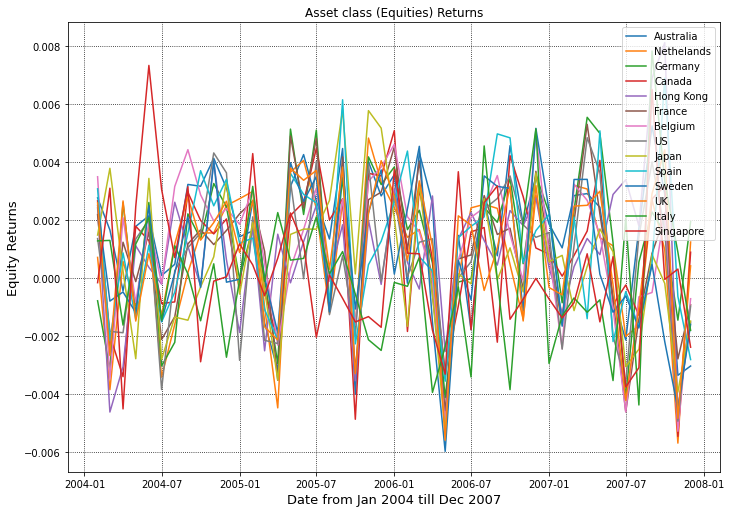

In [67]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2.index, equity_df_2.Australia_R, label='Australia')
plt.plot(equity_df_2.index, equity_df_2.Nethelands_R, label='Nethelands')
plt.plot(equity_df_2.index, equity_df_2.Germany_R, label='Germany')
plt.plot(equity_df_2.index, equity_df_2.Canada_R, label='Canada')
plt.plot(equity_df_2.index, equity_df_2.Hong_Kong_R, label='Hong Kong')
plt.plot(equity_df_2.index, equity_df_2.France_R, label='France')
plt.plot(equity_df_2.index, equity_df_2.Belgium_R, label='Belgium')
plt.plot(equity_df_2.index, equity_df_2.US_R, label='US')
plt.plot(equity_df_2.index, equity_df_2.Japan_R, label='Japan')
plt.plot(equity_df_2.index, equity_df_2.Spain_R, label='Spain')
plt.plot(equity_df_2.index, equity_df_2.Sweden_R, label='Sweden')
plt.plot(equity_df_2.index, equity_df_2.UK_R, label='UK')
plt.plot(equity_df_2.index, equity_df_2.Italy_R, label='Italy')
plt.plot(equity_df_2.index, equity_df_2.Singapore_R, label='Singapore')
plt.title('Asset class (Equities) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Equity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [68]:
# Adding up all the returns of all asset classes for all countries

In [69]:
equity_df_2['Portfolio_R'] = equity_df_2['Australia_R'] + equity_df_2['Nethelands_R'] + equity_df_2['Germany_R'] + equity_df_2['Canada_R'] + equity_df_2['Hong_Kong_R'] + equity_df_2['France_R'] + equity_df_2['Belgium_R'] + equity_df_2['US_R'] + equity_df_2['Japan_R'] + equity_df_2['Spain_R'] + equity_df_2['Sweden_R'] + equity_df_2['UK_R'] + equity_df_2['Italy_R'] + equity_df_2['Singapore_R']

In [70]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [71]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
equity_df_2['Portfolio_Value'] = ((equity_df_2['Portfolio_R'] + 1).cumprod())*1000

In [72]:
equity_df_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R','Portfolio_R', 'Portfolio_Value']]

Australia_R  Nethelands_R  Germany_R  Canada_R  Hong_Kong_R  \
Date                                                                      
2004-02-01     0.002767      0.000717  -0.000776  0.002667     0.002431   
2004-03-01     0.001663     -0.003839  -0.003131 -0.001961    -0.004608   
2004-04-01    -0.000434      0.000579   0.002597 -0.003389    -0.003046   
2004-05-01     0.001785     -0.000955  -0.001248  0.001789     0.001118   
2004-06-01     0.002147      0.001819   0.002610  0.001297     0.000375   
2004-07-01     0.000093     -0.003406  -0.003021 -0.000871    -0.000203   
2004-08-01     0.000480     -0.001590  -0.002208 -0.000815     0.002616   
2004-09-01     0.003230      0.000196   0.002217  0.002959     0.001098   
2004-10-01     0.003167      0.001559   0.001348  0.001990    -0.000261   
2004-11-01     0.004129      0.001559   0.003261  0.001526     0.004028   
2004-12-01     0.003101      0.002504   0.002457  0.002041     0.000633   
2005-01-01     0.001430      0.002738  -0.000023 -0.000392    -0.001869   
2005-02-01     0.001630      0.002990   0.001752  0.004292     0.001805   
2005-03-01    -0.001543     -0.000992  -0.000031 -0.000492    -0.002499   
2005-04-01    -0.003148     -0.004465  -0.002937 -0.002152     0.001517   
2005-05-01     0.003161      0.003656   0.005135  0.002162    -0.000158   
2005-06-01     0.004258      0.004056   0.002195  0.002617     0.001260   
2005-07-01     0.002659      0.002403   0.005101  0.004470     0.002504   
2005-08-01     0.001350     -0.001204  -0.000906  0.002009     0.000079   
2005-09-01     0.004467      0.002655   0.003460  0.002735     0.001842   
2005-10-01    -0.003996     -0.001693  -0.001777 -0.004857    -0.003532   
2005-11-01     0.004012      0.004827   0.004179  0.003613     0.002002   
2005-12-01     0.002835      0.003318   0.003224  0.003523    -0.000213   
2006-01-01     0.003565      0.002426   0.003831  0.005083     0.003082   
2006-02-01    -0.000172      0.001409   0.001674 -0.001833     0.000549   
2006-03-01     0.004327      0.001679   0.002340  0.003074    -0.000373   
2006-04-01     0.002572      0.000117   0.000520  0.000657     0.002833   
2006-05-01    -0.004996     -0.004771  -0.004111 -0.003205    -0.002522   
2006-06-01     0.001475     -0.000028  -0.000131 -0.000954     0.001351   
2006-07-01    -0.001770      0.002423  -0.000018  0.001598     0.002262   
2006-08-01     0.002652      0.002543   0.002436  0.001746     0.001297   
2006-09-01     0.000773      0.002406   0.001925 -0.002202     0.000453   
2006-10-01     0.004566      0.000471   0.003434  0.004220     0.002329   
2006-11-01     0.001854     -0.001413   0.000501  0.002811     0.001815   
2006-12-01     0.003501      0.002857   0.003554  0.001041     0.002770   
2007-01-01     0.001865      0.000697   0.002270  0.000829     0.000371   
2007-02-01     0.001046     -0.001484  -0.000846  0.000071    -0.001183   
2007-03-01     0.002847      0.003197   0.002339  0.000786     0.000398   
2007-04-01     0.002915      0.003073   0.005541  0.001624     0.001368   
2007-05-01     0.002444      0.001394   0.004987  0.004060     0.000812   
2007-06-01    -0.000625      0.001118   0.001229 -0.000909     0.002885   
2007-07-01    -0.002128     -0.002004  -0.004118 -0.000232     0.003392   
2007-08-01     0.001713     -0.001629   0.000555 -0.001277     0.001803   
2007-09-01     0.005244      0.002697   0.002279  0.002731     0.006887   
2007-10-01     0.002899      0.000981   0.001563  0.003175     0.008112   
2007-11-01    -0.003344     -0.005678  -0.001445 -0.005445    -0.004519   
2007-12-01    -0.003023      0.001246   0.001948  0.000895    -0.001517   

            France_R  Belgium_R      US_R   Japan_R   Spain_R  Sweden_R  \
Date                                                                      
2004-02-01  0.002191   0.003494  0.001365  0.001486  0.003079  0.002507   
2004-03-01 -0.002465  -0.003470 -0.001829  0.003785 -0.002143 -0.000788   
2004-04-01  0.001240   0.002086 -0.0

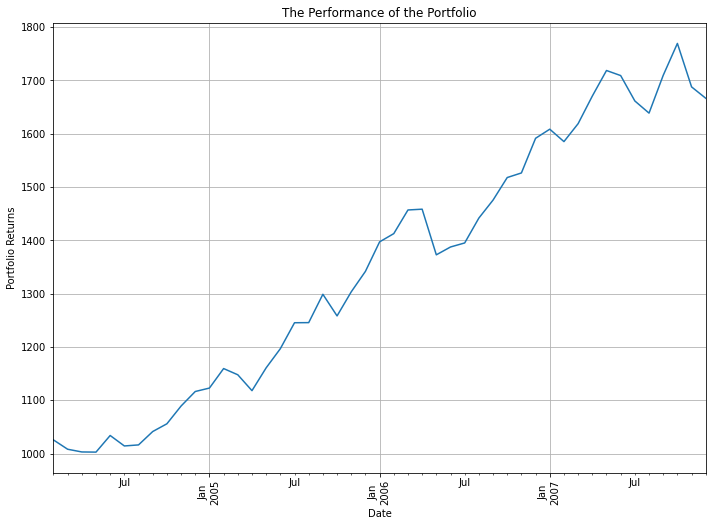

In [73]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date');
plt.ylabel('Portfolio Returns');
equity_df_2['Portfolio_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [75]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(equity_df_2.Portfolio_Value.max() - equity_df_2.Portfolio_Value.min()) / equity_df_2.Portfolio_Value.max()

0.4332116629065215

In [76]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (equity_df_2['Portfolio_Value'][-1] / equity_df_2['Portfolio_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 62.47%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [77]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
equity_df_2['Monthly_Return'] = equity_df_2['Portfolio_Value'].pct_change(1)

In [78]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = equity_df_2['Monthly_Return'].mean() / equity_df_2['Monthly_Return'].std()
Sharpe_Ratio

0.4288332552643525

In [79]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(46)
Annualized_Sharpe_Ratio

2.90848864494063

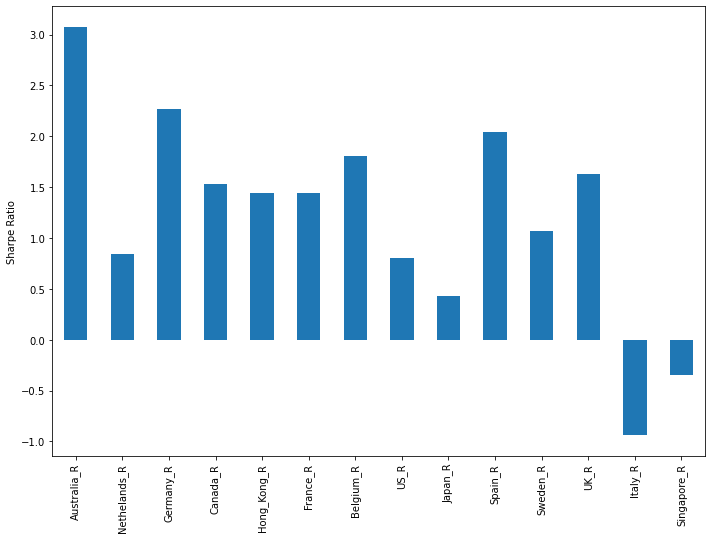

In [80]:
# Calcualte the Sharpe Ratio for equity portfolio
def equity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = equity_df_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sharpes = equity_df_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']].apply(equity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
equity_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

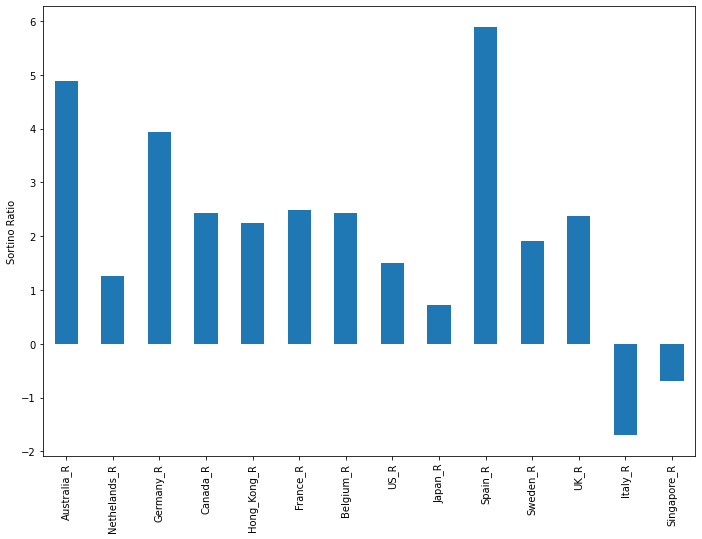

In [81]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = equity_df_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sortinos = equity_df_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']].apply(equity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
equity_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

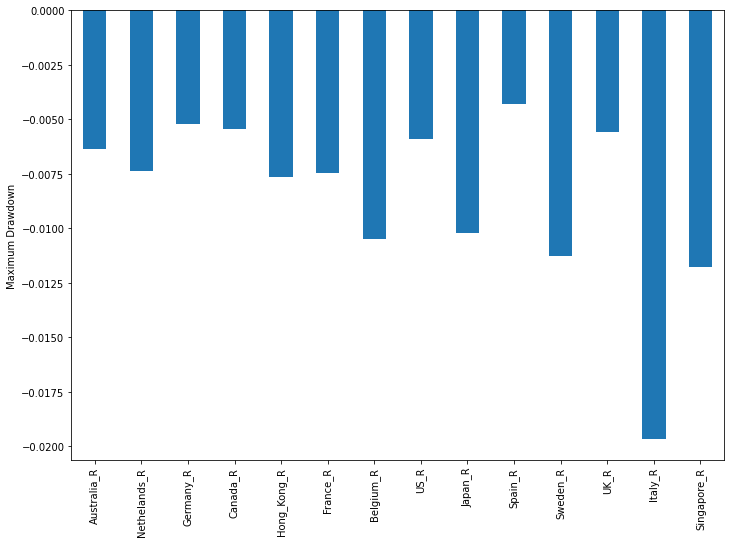

In [82]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def equity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = equity_df_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_max_drawdown = equity_df_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']].apply(equity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
equity_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 1.68 %.
- Maximum Drawdown 43.32%.
- Cumulative return of the o=portfolio 62.47%
- Sharpe Ratio - 4.2%.


In [83]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import datetime
from datetime import datetime

In [84]:
# Dataset (Emerging_Market.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
emerg_market_df = pd.read_csv('Emerging_market_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(emerg_market_df.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
emerg_market_df.head()

(48, 12)


Date  Thailand    Chile    Brazil  Argentina  Russia  Turkey  Portugal  \
0  1/1/2004    698.90  1408.86  21851.44    1140.81  551.72  172.59   7011.72   
1  2/1/2004    716.30  1543.08  21755.02    1183.14  591.09  188.89   7630.46   
2  3/1/2004    647.30  1458.90  22142.26    1201.66  644.64  201.91   7540.45   
3  4/1/2004    648.15  1430.60  19607.23    1077.93  561.78  180.23   7500.35   
4  5/1/2004    641.05  1428.80  19544.67     952.62  535.40  170.81   7223.18   

   Finland  South Africa  Indonesia  Venezuela  
0  1588.13       9953.72     752.93   14588.25  
1  1658.37      10005.41     761.08   12954.31  
2  1617.56       9773.27     735.68   11064.37  
3  1601.09       9455.17     783.41   11872.87  
4  1551.55       9525.95     732.52   14819.87

In [85]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
emerg_market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          48 non-null     object 
 1   Thailand      48 non-null     float64
 2   Chile         48 non-null     float64
 3   Brazil        48 non-null     float64
 4   Argentina     48 non-null     float64
 5   Russia        48 non-null     float64
 6   Turkey        48 non-null     float64
 7   Portugal      48 non-null     float64
 8   Finland       48 non-null     float64
 9   South Africa  48 non-null     float64
 10  Indonesia     48 non-null     float64
 11  Venezuela     48 non-null     float64
dtypes: float64(11), object(1)
memory usage: 4.6+ KB


In [86]:
# Use pandas.to_datetime() function to convert argument to datetime
emerg_market_df['Date'] = pd.to_datetime(emerg_market_df.Date)

In [87]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
emerg_market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          48 non-null     datetime64[ns]
 1   Thailand      48 non-null     float64       
 2   Chile         48 non-null     float64       
 3   Brazil        48 non-null     float64       
 4   Argentina     48 non-null     float64       
 5   Russia        48 non-null     float64       
 6   Turkey        48 non-null     float64       
 7   Portugal      48 non-null     float64       
 8   Finland       48 non-null     float64       
 9   South Africa  48 non-null     float64       
 10  Indonesia     48 non-null     float64       
 11  Venezuela     48 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 4.6 KB


In [88]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
emerg_market_df.set_index('Date',inplace=True)

In [89]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
emerg_market_df.isnull().any()

Thailand        False
Chile           False
Brazil          False
Argentina       False
Russia          False
Turkey          False
Portugal        False
Finland         False
South Africa    False
Indonesia       False
Venezuela       False
dtype: bool

In [90]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
emerg_market_df = emerg_market_df.rename(columns={'South Africa':'South_Africa'})

In [91]:
emerg_market_df[['Thailand','Chile','Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                 'South_Africa','Indonesia','Venezuela']]

Thailand    Chile    Brazil  Argentina   Russia  Turkey  Portugal  \
Date                                                                            
2004-01-01    698.90  1408.86  21851.44    1140.81   551.72  172.59   7011.72   
2004-02-01    716.30  1543.08  21755.02    1183.14   591.09  188.89   7630.46   
2004-03-01    647.30  1458.90  22142.26    1201.66   644.64  201.91   7540.45   
2004-04-01    648.15  1430.60  19607.23    1077.93   561.78  180.23   7500.35   
2004-05-01    641.05  1428.80  19544.67     952.62   535.40  170.81   7223.18   
2004-06-01    646.64  1482.98  21148.91     945.45   534.84  179.68   7387.30   
2004-07-01    636.70  1520.85  22336.87     966.10   502.81  193.81   7126.80   
2004-08-01    624.59  1631.41  22803.19     952.14   549.28  202.18   7113.67   
2004-09-01    644.67  1707.02  23245.24    1142.50   611.03  219.54   7359.15   
2004-10-01    628.16  1768.20  23052.18    1287.14   632.97  229.00   7460.94   
2004-11-01    656.73  1790.47  25128.33    1213.09   570.76  224.86   7523.10   
2004-12-01    668.10  1796.48  26196.25    1375.37   552.22  249.72   7600.16   
2005-01-01    701.91  1809.88  24352.94    1373.79   575.74  273.30   8016.90   
2005-02-01    741.55  1895.20  28139.13    1558.62   635.38  283.96   7896.74   
2005-03-01    681.49  1961.69  26610.65    1400.42   598.04  255.58   7786.61   
2005-04-01    658.88  1956.98  24843.70    1348.35   593.88  235.92   7607.81   
2005-05-01    667.55  1968.78  25207.07    1485.55   603.89  252.36   7524.04   
2005-06-01    675.50  2056.84  25051.21    1367.41   639.98  269.57   7510.58   
2005-07-01    675.67  2175.06  26042.36    1507.59   700.65  296.15   7595.76   
2005-08-01    697.85  2086.25  28044.83    1581.65   784.28  309.08   7817.99   
2005-09-01    723.23  2152.82  31583.79    1694.83   892.50  333.33   8088.64   
2005-10-01    682.62  2072.64  30193.51    1608.86   842.52  319.64   7836.55   
2005-11-01    667.75  2027.61  31916.76    1554.67   944.55  380.89   8114.57   
2005-12-01    713.73  1964.47  33455.94    1543.31  1011.00  397.78   8618.67   
2006-01-01    762.63  2118.46  38382.80    1793.97  1171.44  445.90   8769.79   
2006-02-01    744.05  2166.84  38610.39    1714.05  1320.83  470.16   9476.82   
2006-03-01    733.25  2181.95  37951.97    1800.58  1299.19  429.11  10262.56   
2006-04-01    768.29  2201.56  40363.42    1908.61  1486.85  438.80  10052.90   
2006-05-01    709.43  2156.53  36530.04    1653.72  1281.50  381.32   9403.80   
2006-06-01    678.13  2126.02  36630.66    1711.09  1331.39  354.53   9502.94   
2006-07-01    691.49  2131.58  37077.12    1701.58  1380.24  360.68   9665.43   
2006-08-01    690.90  2206.37  36232.22    1662.84  1448.72  372.86   9957.57   
2006-09-01    686.10  2280.48  36449.40    1637.27  1367.24  369.25  10305.50   
2006-10-01    722.46  2380.26  39262.79    1781.68  1426.86  405.82  10515.60   
2006-11-01    739.06  2559.67  41931.84    1967.02  1550.58  381.69  10662.60   
2006-12-01    679.84  2693.22  44473.71    2090.46  1693.47  391.17  11197.60   
2007-01-01    654.04  2895.28  44641.60    2070.64  1656.94  411.83  11565.10   
2007-02-01    677.13  2811.62  43892.31    2067.64  1655.25  414.31  11693.00   
2007-03-01    673.71  2929.00  45804.66    2102.78  1698.08  436.61  11653.30   
2007-04-01    699.16  3161.22  48956.39    2154.55  1697.28  449.84  12244.30   
2007-05-01    737.40  3279.53  52268.46    2243.03  1570.34  470.81  13256.60   
2007-06-01    776.79  3470.18  54392.06    2190.87  1665.96  470.94  13384.90   
2007-07-01    859.76  3340.43  54182.50    2180.25  1734.42  528.25  13434.20   
2007-08-01    813.21  3310.14  54637.24    2062.08  1677.02  501.99  12711.40   
2007-09-01    845.50  3249.00  60465.06    2187.97  1759.44  540.44  12024.40   
2007-10-01    907.28  3451.18  65317.70    2351.44  1874.73  576.16  13005.50   
2007-11-01    846.44  3204.47  63006.16    2207.16  1850.64  542.14  13120.70   
2007-12-01    858.10  3051.83  63886.10    

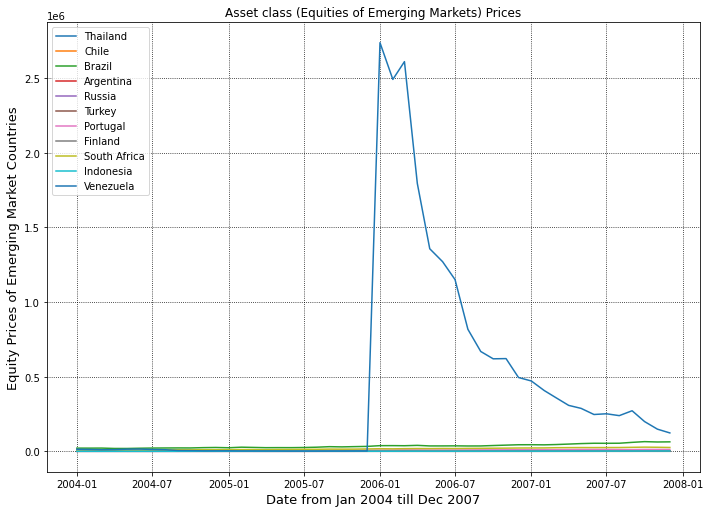

In [92]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df.index, emerg_market_df.Thailand, label='Thailand')
plt.plot(emerg_market_df.index, emerg_market_df.Chile, label='Chile')
plt.plot(emerg_market_df.index, emerg_market_df.Brazil, label='Brazil')
plt.plot(emerg_market_df.index, emerg_market_df.Argentina, label='Argentina')
plt.plot(emerg_market_df.index, emerg_market_df.Russia, label='Russia')
plt.plot(emerg_market_df.index, emerg_market_df.Turkey, label='Turkey')
plt.plot(emerg_market_df.index, emerg_market_df.Portugal, label='Portugal')
plt.plot(emerg_market_df.index, emerg_market_df.Finland, label='Finland')
plt.plot(emerg_market_df.index, emerg_market_df.South_Africa, label='South Africa')
plt.plot(emerg_market_df.index, emerg_market_df.Indonesia, label='Indonesia')
plt.plot(emerg_market_df.index, emerg_market_df.Venezuela, label='Venezuela')
plt.title('Asset class (Equities of Emerging Markets) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Equity Prices of Emerging Market Countries', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [93]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
emerg_market_df = emerg_market_df[['Thailand','Chile','Brazil','Argentina','Russia','Turkey','Portugal',
                                   'Finland', 'South_Africa','Indonesia','Venezuela']].pct_change()
emerg_market_df

Thailand     Chile    Brazil  Argentina    Russia    Turkey  \
Date                                                                      
2004-01-01       NaN       NaN       NaN        NaN       NaN       NaN   
2004-02-01  0.024896  0.095269 -0.004413   0.037105  0.071359  0.094443   
2004-03-01 -0.096328 -0.054553  0.017800   0.015653  0.090595  0.068929   
2004-04-01  0.001313 -0.019398 -0.114488  -0.102966 -0.128537 -0.107375   
2004-05-01 -0.010954 -0.001258 -0.003191  -0.116251 -0.046958 -0.052267   
2004-06-01  0.008720  0.037920  0.082081  -0.007527 -0.001046  0.051929   
2004-07-01 -0.015372  0.025536  0.056171   0.021841 -0.059887  0.078640   
2004-08-01 -0.019020  0.072696  0.020877  -0.014450  0.092421  0.043187   
2004-09-01  0.032149  0.046346  0.019385   0.199929  0.112420  0.085864   
2004-10-01 -0.025610  0.035840 -0.008305   0.126600  0.035907  0.043090   
2004-11-01  0.045482  0.012595  0.090063  -0.057531 -0.098283 -0.018079   
2004-12-01  0.017313  0.003357  0.042499   0.133774 -0.032483  0.110558   
2005-01-01  0.050606  0.007459 -0.070365  -0.001149  0.042592  0.094426   
2005-02-01  0.056474  0.047141  0.155472   0.134540  0.103588  0.039005   
2005-03-01 -0.080993  0.035083 -0.054319  -0.101500 -0.058768 -0.099944   
2005-04-01 -0.033177 -0.002401 -0.066400  -0.037182 -0.006956 -0.076923   
2005-05-01  0.013159  0.006030  0.014626   0.101754  0.016855  0.069685   
2005-06-01  0.011909  0.044728 -0.006183  -0.079526  0.059763  0.068196   
2005-07-01  0.000252  0.057477  0.039565   0.102515  0.094800  0.098601   
2005-08-01  0.032827 -0.040831  0.076893   0.049125  0.119361  0.043660   
2005-09-01  0.036369  0.031909  0.126189   0.071558  0.137986  0.078459   
2005-10-01 -0.056151 -0.037244 -0.044019  -0.050725 -0.056000 -0.041070   
2005-11-01 -0.021784 -0.021726  0.057074  -0.033682  0.121101  0.191622   
2005-12-01  0.068858 -0.031140  0.048225  -0.007307  0.070351  0.044344   
2006-01-01  0.068513  0.078388  0.147264   0.162417  0.158694  0.120971   
2006-02-01 -0.024363  0.022837  0.005929  -0.044549  0.127527  0.054407   
2006-03-01 -0.014515  0.006973 -0.017053   0.050483 -0.016384 -0.087311   
2006-04-01  0.047787  0.008987  0.063540   0.059997  0.144444  0.022582   
2006-05-01 -0.076612 -0.020454 -0.094972  -0.133547 -0.138111 -0.130994   
2006-06-01 -0.044120 -0.014148  0.002754   0.034691  0.038931 -0.070256   
2006-07-01  0.019701  0.002615  0.012188  -0.005558  0.036691  0.017347   
2006-08-01 -0.000853  0.035087 -0.022788  -0.022767  0.049615  0.033770   
2006-09-01 -0.006947  0.033589  0.005994  -0.015377 -0.056243 -0.009682   
2006-10-01  0.052995  0.043754  0.077186   0.088202  0.043606  0.099039   
2006-11-01  0.022977  0.075374  0.067979   0.104025  0.086708 -0.059460   
2006-12-01 -0.080129  0.052175  0.060619   0.062755  0.092153  0.024837   
2007-01-01 -0.037950  0.075025  0.003775  -0.009481 -0.021571  0.052816   
2007-02-01  0.035304 -0.028895 -0.016785  -0.001449 -0.001020  0.006022   
2007-03-01 -0.005051  0.041748  0.043569   0.016995  0.025875  0.053824   
2007-04-01  0.037776  0.079283  0.068808   0.024620 -0.000471  0.030302   
2007-05-01  0.054694  0.037425  0.067653   0.041067 -0.074790  0.046617   
2007-06-01  0.053417  0.058133  0.040629  -0.023254  0.060891  0.000276   
2007-07-01  0.106811 -0.037390 -0.003853  -0.004847  0.041093  0.121693   
2007-08-01 -0.054143 -0.009068  0.008393  -0.054200 -0.033095 -0.049711   
2007-09-01  0.039707 -0.018471  0.106664   0.061050  0.049147  0.076595   
2007-10-01  0.073069  0.062228  0.080255   0.074713  0.065527  0.066094   
2007-11-01 -0.067058 -0.071486 -0.035389  -0.061358 -0.012850 -0.059046   
2007-12-01  0.013775 -0.047633  0.013966  -0.025114  0.020652  0.024422   

            Portugal   Finland  South_Africa  Indonesia   Venezuela  
Date                                                                 
2004-01-01       NaN       NaN           NaN        NaN         NaN  
2004-02-01  0.088244  0.044228      0.005193   0.01

In [94]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
emerg_market_df.dropna(axis=0, inplace=True)
emerg_market_df

Thailand     Chile    Brazil  Argentina    Russia    Turkey  \
Date                                                                      
2004-02-01  0.024896  0.095269 -0.004413   0.037105  0.071359  0.094443   
2004-03-01 -0.096328 -0.054553  0.017800   0.015653  0.090595  0.068929   
2004-04-01  0.001313 -0.019398 -0.114488  -0.102966 -0.128537 -0.107375   
2004-05-01 -0.010954 -0.001258 -0.003191  -0.116251 -0.046958 -0.052267   
2004-06-01  0.008720  0.037920  0.082081  -0.007527 -0.001046  0.051929   
2004-07-01 -0.015372  0.025536  0.056171   0.021841 -0.059887  0.078640   
2004-08-01 -0.019020  0.072696  0.020877  -0.014450  0.092421  0.043187   
2004-09-01  0.032149  0.046346  0.019385   0.199929  0.112420  0.085864   
2004-10-01 -0.025610  0.035840 -0.008305   0.126600  0.035907  0.043090   
2004-11-01  0.045482  0.012595  0.090063  -0.057531 -0.098283 -0.018079   
2004-12-01  0.017313  0.003357  0.042499   0.133774 -0.032483  0.110558   
2005-01-01  0.050606  0.007459 -0.070365  -0.001149  0.042592  0.094426   
2005-02-01  0.056474  0.047141  0.155472   0.134540  0.103588  0.039005   
2005-03-01 -0.080993  0.035083 -0.054319  -0.101500 -0.058768 -0.099944   
2005-04-01 -0.033177 -0.002401 -0.066400  -0.037182 -0.006956 -0.076923   
2005-05-01  0.013159  0.006030  0.014626   0.101754  0.016855  0.069685   
2005-06-01  0.011909  0.044728 -0.006183  -0.079526  0.059763  0.068196   
2005-07-01  0.000252  0.057477  0.039565   0.102515  0.094800  0.098601   
2005-08-01  0.032827 -0.040831  0.076893   0.049125  0.119361  0.043660   
2005-09-01  0.036369  0.031909  0.126189   0.071558  0.137986  0.078459   
2005-10-01 -0.056151 -0.037244 -0.044019  -0.050725 -0.056000 -0.041070   
2005-11-01 -0.021784 -0.021726  0.057074  -0.033682  0.121101  0.191622   
2005-12-01  0.068858 -0.031140  0.048225  -0.007307  0.070351  0.044344   
2006-01-01  0.068513  0.078388  0.147264   0.162417  0.158694  0.120971   
2006-02-01 -0.024363  0.022837  0.005929  -0.044549  0.127527  0.054407   
2006-03-01 -0.014515  0.006973 -0.017053   0.050483 -0.016384 -0.087311   
2006-04-01  0.047787  0.008987  0.063540   0.059997  0.144444  0.022582   
2006-05-01 -0.076612 -0.020454 -0.094972  -0.133547 -0.138111 -0.130994   
2006-06-01 -0.044120 -0.014148  0.002754   0.034691  0.038931 -0.070256   
2006-07-01  0.019701  0.002615  0.012188  -0.005558  0.036691  0.017347   
2006-08-01 -0.000853  0.035087 -0.022788  -0.022767  0.049615  0.033770   
2006-09-01 -0.006947  0.033589  0.005994  -0.015377 -0.056243 -0.009682   
2006-10-01  0.052995  0.043754  0.077186   0.088202  0.043606  0.099039   
2006-11-01  0.022977  0.075374  0.067979   0.104025  0.086708 -0.059460   
2006-12-01 -0.080129  0.052175  0.060619   0.062755  0.092153  0.024837   
2007-01-01 -0.037950  0.075025  0.003775  -0.009481 -0.021571  0.052816   
2007-02-01  0.035304 -0.028895 -0.016785  -0.001449 -0.001020  0.006022   
2007-03-01 -0.005051  0.041748  0.043569   0.016995  0.025875  0.053824   
2007-04-01  0.037776  0.079283  0.068808   0.024620 -0.000471  0.030302   
2007-05-01  0.054694  0.037425  0.067653   0.041067 -0.074790  0.046617   
2007-06-01  0.053417  0.058133  0.040629  -0.023254  0.060891  0.000276   
2007-07-01  0.106811 -0.037390 -0.003853  -0.004847  0.041093  0.121693   
2007-08-01 -0.054143 -0.009068  0.008393  -0.054200 -0.033095 -0.049711   
2007-09-01  0.039707 -0.018471  0.106664   0.061050  0.049147  0.076595   
2007-10-01  0.073069  0.062228  0.080255   0.074713  0.065527  0.066094   
2007-11-01 -0.067058 -0.071486 -0.035389  -0.061358 -0.012850 -0.059046   
2007-12-01  0.013775 -0.047633  0.013966  -0.025114  0.020652  0.024422   

            Portugal   Finland  South_Africa  Indonesia   Venezuela  
Date                                                                 
2004-02-01  0.088244  0.044228      0.005193   0.010824   -0.112004  
2004-03-01 -0.011796 -0.024609     -0.023201  -0.033374   -0.145893  
2004-04-01 -0.005318 -0.010182     -0.032548   0.064879 

In [95]:
print('There are {} rows in the DataFrame'.format(emerg_market_df.shape[0]))

There are 47 rows in the DataFrame


In [96]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
emerg_market_df_2 = emerg_market_df.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.
- The dataset (equity_2004_2007) cover a period of four years, so one year has 252 days of trading days or 12 months * 4 years equal 48 minus one month (null values) equal 47 months.

In [97]:
vol_emerg_market_df = emerg_market_df

In [98]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_emerg_market_df['Thailand_Vol'] = vol_emerg_market_df['Thailand'].rolling(47).std() * math.sqrt(47)
vol_emerg_market_df['Chile_Vol'] = vol_emerg_market_df['Chile'].rolling(47).std() * math.sqrt(47)
vol_emerg_market_df['Brazil_Vol'] = vol_emerg_market_df['Brazil'].rolling(47).std() * math.sqrt(47)
vol_emerg_market_df['Argentina_Vol'] = vol_emerg_market_df['Argentina'].rolling(47).std() * math.sqrt(47)
vol_emerg_market_df['Russia_Vol'] = vol_emerg_market_df['Russia'].rolling(47).std() * math.sqrt(47)
vol_emerg_market_df['Turkey_Vol'] = vol_emerg_market_df['Turkey'].rolling(47).std() * math.sqrt(47)
vol_emerg_market_df['Portugal_Vol'] = vol_emerg_market_df['Portugal'].rolling(47).std() * math.sqrt(47)
vol_emerg_market_df['Finland_Vol'] = vol_emerg_market_df['Finland'].rolling(47).std() * math.sqrt(47)
vol_emerg_market_df['South_Africa_Vol'] = vol_emerg_market_df['South_Africa'].rolling(47).std() * math.sqrt(47)
vol_emerg_market_df['Indonesia_Vol'] = vol_emerg_market_df['Indonesia'].rolling(47).std() * math.sqrt(47)
vol_emerg_market_df['Venezuela_Vol'] = vol_emerg_market_df['Venezuela'].rolling(47).std() * math.sqrt(47)

In [99]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_emerg_market_df.dropna(axis=0, inplace=True)

In [100]:
vol_emerg_market_df[['Thailand_Vol','Chile_Vol','Brazil_Vol','Argentina_Vol','Russia_Vol','Turkey_Vol','Portugal_Vol',
                     'Finland_Vol','South_Africa_Vol','Indonesia_Vol','Venezuela_Vol']]

Thailand_Vol  Chile_Vol  Brazil_Vol  Argentina_Vol  Russia_Vol  \
Date                                                                         
2007-12-01      0.318966     0.2787    0.398772       0.511721    0.497796   

            Turkey_Vol  Portugal_Vol  Finland_Vol  South_Africa_Vol  \
Date                                                                  
2007-12-01    0.476864      0.254032     0.261224          0.281925   

            Indonesia_Vol  Venezuela_Vol  
Date                                      
2007-12-01       0.362558     966.793378

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [101]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_emerg_market_df = (0.318966+0.2787+0.398772+0.511721+0.497796+0.476864+0.254032+0.261224+0.281925+0.362558+966.793378) / 11
Avg_vol_emerg_market_df

88.22144872727273

In [102]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
vol_emerg_market_target_vol = 1 / 11
vol_emerg_market_target_vol

0.09090909090909091

In [103]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
portfolio_emerg_market_df = emerg_market_df

In [104]:
portfolio_emerg_market_df['Thailand_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df['Thailand_Vol']
portfolio_emerg_market_df['Chile_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df['Chile_Vol']
portfolio_emerg_market_df['Brazil_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df['Brazil_Vol']
portfolio_emerg_market_df['Argentina_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df['Argentina_Vol']
portfolio_emerg_market_df['Russia_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df['Russia_Vol']
portfolio_emerg_market_df['Turkey_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df['Turkey_Vol']
portfolio_emerg_market_df['Portugal_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df['Portugal_Vol']
portfolio_emerg_market_df['Finland_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df['Finland_Vol']
portfolio_emerg_market_df['South_Africa_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df['South_Africa_Vol']
portfolio_emerg_market_df['Indonesia_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df['Indonesia_Vol']
portfolio_emerg_market_df['Venezuela_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df['Venezuela_Vol']

In [105]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
portfolio_emerg_market_df.dropna(axis=0, inplace=True)

In [106]:
portfolio_emerg_market_df[['Thailand_Alloc','Chile_Alloc','Brazil_Alloc','Argentina_Alloc','Russia_Alloc',
                           'Turkey_Alloc','Portugal_Alloc','Finland_Alloc','South_Africa_Alloc','Indonesia_Alloc',
                           'Venezuela_Alloc']]

Thailand_Alloc  Chile_Alloc  Brazil_Alloc  Argentina_Alloc  \
Date                                                                     
2007-12-01        0.285012      0.32619      0.227972         0.177654   

            Russia_Alloc  Turkey_Alloc  Portugal_Alloc  Finland_Alloc  \
Date                                                                    
2007-12-01      0.182623      0.190639        0.357864       0.348012   

            South_Africa_Alloc  Indonesia_Alloc  Venezuela_Alloc  
Date                                                              
2007-12-01            0.322459         0.250744         0.000094

In [107]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [108]:
emerg_market_df_2['Thailand_R'] = emerg_market_df_2['Thailand'] * 0.285012
emerg_market_df_2['Chile_R'] = emerg_market_df_2['Chile'] * 0.32619
emerg_market_df_2['Brazil_R'] = emerg_market_df_2['Brazil'] * 0.227972
emerg_market_df_2['Argentina_R'] = emerg_market_df_2['Argentina'] * 0.177654
emerg_market_df_2['Russia_R'] = emerg_market_df_2['Russia'] * 0.190639
emerg_market_df_2['Turkey_R'] = emerg_market_df_2['Turkey'] * 0.190639
emerg_market_df_2['Portugal_R'] = emerg_market_df_2['Portugal'] * 0.357864
emerg_market_df_2['Finland_R'] = emerg_market_df_2['Finland'] * 0.348012
emerg_market_df_2['South_Africa_R'] = emerg_market_df_2['South_Africa'] * 0.322459
emerg_market_df_2['Indonesia_R'] = emerg_market_df_2['Indonesia'] * 0.250744
emerg_market_df_2['Venezuela_R'] = emerg_market_df_2['Venezuela'] * 0.000094

In [109]:
emerg_market_df_2

Thailand     Chile    Brazil  Argentina    Russia    Turkey  \
Date                                                                      
2004-02-01  0.024896  0.095269 -0.004413   0.037105  0.071359  0.094443   
2004-03-01 -0.096328 -0.054553  0.017800   0.015653  0.090595  0.068929   
2004-04-01  0.001313 -0.019398 -0.114488  -0.102966 -0.128537 -0.107375   
2004-05-01 -0.010954 -0.001258 -0.003191  -0.116251 -0.046958 -0.052267   
2004-06-01  0.008720  0.037920  0.082081  -0.007527 -0.001046  0.051929   
2004-07-01 -0.015372  0.025536  0.056171   0.021841 -0.059887  0.078640   
2004-08-01 -0.019020  0.072696  0.020877  -0.014450  0.092421  0.043187   
2004-09-01  0.032149  0.046346  0.019385   0.199929  0.112420  0.085864   
2004-10-01 -0.025610  0.035840 -0.008305   0.126600  0.035907  0.043090   
2004-11-01  0.045482  0.012595  0.090063  -0.057531 -0.098283 -0.018079   
2004-12-01  0.017313  0.003357  0.042499   0.133774 -0.032483  0.110558   
2005-01-01  0.050606  0.007459 -0.070365  -0.001149  0.042592  0.094426   
2005-02-01  0.056474  0.047141  0.155472   0.134540  0.103588  0.039005   
2005-03-01 -0.080993  0.035083 -0.054319  -0.101500 -0.058768 -0.099944   
2005-04-01 -0.033177 -0.002401 -0.066400  -0.037182 -0.006956 -0.076923   
2005-05-01  0.013159  0.006030  0.014626   0.101754  0.016855  0.069685   
2005-06-01  0.011909  0.044728 -0.006183  -0.079526  0.059763  0.068196   
2005-07-01  0.000252  0.057477  0.039565   0.102515  0.094800  0.098601   
2005-08-01  0.032827 -0.040831  0.076893   0.049125  0.119361  0.043660   
2005-09-01  0.036369  0.031909  0.126189   0.071558  0.137986  0.078459   
2005-10-01 -0.056151 -0.037244 -0.044019  -0.050725 -0.056000 -0.041070   
2005-11-01 -0.021784 -0.021726  0.057074  -0.033682  0.121101  0.191622   
2005-12-01  0.068858 -0.031140  0.048225  -0.007307  0.070351  0.044344   
2006-01-01  0.068513  0.078388  0.147264   0.162417  0.158694  0.120971   
2006-02-01 -0.024363  0.022837  0.005929  -0.044549  0.127527  0.054407   
2006-03-01 -0.014515  0.006973 -0.017053   0.050483 -0.016384 -0.087311   
2006-04-01  0.047787  0.008987  0.063540   0.059997  0.144444  0.022582   
2006-05-01 -0.076612 -0.020454 -0.094972  -0.133547 -0.138111 -0.130994   
2006-06-01 -0.044120 -0.014148  0.002754   0.034691  0.038931 -0.070256   
2006-07-01  0.019701  0.002615  0.012188  -0.005558  0.036691  0.017347   
2006-08-01 -0.000853  0.035087 -0.022788  -0.022767  0.049615  0.033770   
2006-09-01 -0.006947  0.033589  0.005994  -0.015377 -0.056243 -0.009682   
2006-10-01  0.052995  0.043754  0.077186   0.088202  0.043606  0.099039   
2006-11-01  0.022977  0.075374  0.067979   0.104025  0.086708 -0.059460   
2006-12-01 -0.080129  0.052175  0.060619   0.062755  0.092153  0.024837   
2007-01-01 -0.037950  0.075025  0.003775  -0.009481 -0.021571  0.052816   
2007-02-01  0.035304 -0.028895 -0.016785  -0.001449 -0.001020  0.006022   
2007-03-01 -0.005051  0.041748  0.043569   0.016995  0.025875  0.053824   
2007-04-01  0.037776  0.079283  0.068808   0.024620 -0.000471  0.030302   
2007-05-01  0.054694  0.037425  0.067653   0.041067 -0.074790  0.046617   
2007-06-01  0.053417  0.058133  0.040629  -0.023254  0.060891  0.000276   
2007-07-01  0.106811 -0.037390 -0.003853  -0.004847  0.041093  0.121693   
2007-08-01 -0.054143 -0.009068  0.008393  -0.054200 -0.033095 -0.049711   
2007-09-01  0.039707 -0.018471  0.106664   0.061050  0.049147  0.076595   
2007-10-01  0.073069  0.062228  0.080255   0.074713  0.065527  0.066094   
2007-11-01 -0.067058 -0.071486 -0.035389  -0.061358 -0.012850 -0.059046   
2007-12-01  0.013775 -0.047633  0.013966  -0.025114  0.020652  0.024422   

            Portugal   Finland  South_Africa  Indonesia  ...   Chile_R  \
Date                                                     ...             
2004-02-01  0.088244  0.044228      0.005193   0.010824  ...  0.031076   
2004-03-01 -0.011796 -0.024609     -0.023201  -0.033374  ... -0.017795   
2004-04-01 -0.005318 -0.010182     -0.03

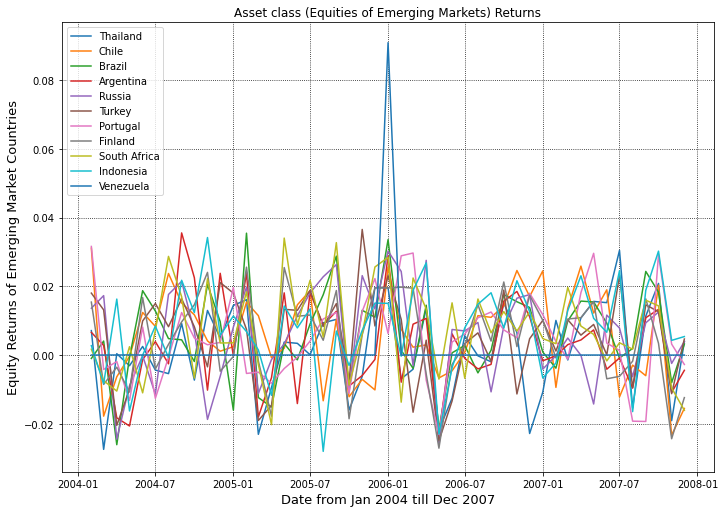

In [110]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2.index, emerg_market_df_2.Thailand_R, label='Thailand')
plt.plot(emerg_market_df_2.index, emerg_market_df_2.Chile_R, label='Chile')
plt.plot(emerg_market_df_2.index, emerg_market_df_2.Brazil_R, label='Brazil')
plt.plot(emerg_market_df_2.index, emerg_market_df_2.Argentina_R, label='Argentina')
plt.plot(emerg_market_df_2.index, emerg_market_df_2.Russia_R, label='Russia')
plt.plot(emerg_market_df_2.index, emerg_market_df_2.Turkey_R, label='Turkey')
plt.plot(emerg_market_df_2.index, emerg_market_df_2.Portugal_R, label='Portugal')
plt.plot(emerg_market_df_2.index, emerg_market_df_2.Finland_R, label='Finland')
plt.plot(emerg_market_df_2.index, emerg_market_df_2.South_Africa_R, label='South Africa')
plt.plot(emerg_market_df_2.index, emerg_market_df_2.Indonesia_R, label='Indonesia')
plt.plot(emerg_market_df_2.index, emerg_market_df_2.Venezuela_R, label='Venezuela')
plt.title('Asset class (Equities of Emerging Markets) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Equity Returns of Emerging Market Countries', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [111]:
# Adding up all the returns of all asset classes for all countries

In [112]:
emerg_market_df_2['Portfolio_R'] = emerg_market_df_2['Thailand_R'] + emerg_market_df_2['Chile_R'] + emerg_market_df_2['Brazil_R'] + emerg_market_df_2['Argentina_R'] + emerg_market_df_2['Russia_R'] + emerg_market_df_2['Turkey_R'] + emerg_market_df_2['Portugal_R'] + emerg_market_df_2['Finland_R'] + emerg_market_df_2['South_Africa_R'] + emerg_market_df_2['Indonesia_R'] + emerg_market_df_2['Venezuela_R']

In [113]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [114]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
emerg_market_df_2['Portfolio_Value'] = ((emerg_market_df_2['Portfolio_R'] + 1).cumprod())*1000

In [115]:
emerg_market_df_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R', 'Portfolio_R','Portfolio_Value']]

Thailand_R   Chile_R  Brazil_R  Argentina_R  Russia_R  Turkey_R  \
Date                                                                          
2004-02-01    0.007096  0.031076 -0.001006     0.006592  0.013604  0.018005   
2004-03-01   -0.027455 -0.017795  0.004058     0.002781  0.017271  0.013141   
2004-04-01    0.000374 -0.006327 -0.026100    -0.018292 -0.024504 -0.020470   
2004-05-01   -0.003122 -0.000410 -0.000727    -0.020652 -0.008952 -0.009964   
2004-06-01    0.002485  0.012369  0.018712    -0.001337 -0.000199  0.009900   
2004-07-01   -0.004381  0.008330  0.012805     0.003880 -0.011417  0.014992   
2004-08-01   -0.005421  0.023713  0.004759    -0.002567  0.017619  0.008233   
2004-09-01    0.009163  0.015118  0.004419     0.035518  0.021432  0.016369   
2004-10-01   -0.007299  0.011691 -0.001893     0.022491  0.006845  0.008215   
2004-11-01    0.012963  0.004108  0.020532    -0.010221 -0.018737 -0.003446   
2004-12-01    0.004934  0.001095  0.009689     0.023766 -0.006193  0.021077   
2005-01-01    0.014423  0.002433 -0.016041    -0.000204  0.008120  0.018001   
2005-02-01    0.016096  0.015377  0.035443     0.023902  0.019748  0.007436   
2005-03-01   -0.023084  0.011444 -0.012383    -0.018032 -0.011203 -0.019053   
2005-04-01   -0.009456 -0.000783 -0.015137    -0.006605 -0.001326 -0.014665   
2005-05-01    0.003750  0.001967  0.003334     0.018077  0.003213  0.013285   
2005-06-01    0.003394  0.014590 -0.001410    -0.014128  0.011393  0.013001   
2005-07-01    0.000072  0.018748  0.009020     0.018212  0.018073  0.018797   
2005-08-01    0.009356 -0.013319  0.017529     0.008727  0.022755  0.008323   
2005-09-01    0.010366  0.010408  0.028768     0.012713  0.026306  0.014957   
2005-10-01   -0.016004 -0.012149 -0.010035    -0.009011 -0.010676 -0.007830   
2005-11-01   -0.006209 -0.007087  0.013011    -0.005984  0.023087  0.036531   
2005-12-01    0.019625 -0.010158  0.010994    -0.001298  0.013412  0.008454   
2006-01-01    0.019527  0.025569  0.033572     0.028854  0.030253  0.023062   
2006-02-01   -0.006944  0.007449  0.001352    -0.007914  0.024312  0.010372   
2006-03-01   -0.004137  0.002275 -0.003888     0.008968 -0.003123 -0.016645   
2006-04-01    0.013620  0.002932  0.014485     0.010659  0.027537  0.004305   
2006-05-01   -0.021835 -0.006672 -0.021651    -0.023725 -0.026329 -0.024972   
2006-06-01   -0.012575 -0.004615  0.000628     0.006163  0.007422 -0.013394   
2006-07-01    0.005615  0.000853  0.002779    -0.000987  0.006995  0.003307   
2006-08-01   -0.000243  0.011445 -0.005195    -0.004045  0.009458  0.006438   
2006-09-01   -0.001980  0.010956  0.001366    -0.002732 -0.010722 -0.001846   
2006-10-01    0.015104  0.014272  0.017596     0.015669  0.008313  0.018881   
2006-11-01    0.006549  0.024586  0.015497     0.018481  0.016530 -0.011335   
2006-12-01   -0.022838  0.017019  0.013819     0.011149  0.017568  0.004735   
2007-01-01   -0.010816  0.024473  0.000861    -0.001684 -0.004112  0.010069   
2007-02-01    0.010062 -0.009425 -0.003826    -0.000257 -0.000194  0.001148   
2007-03-01   -0.001440  0.013618  0.009933     0.003019  0.004933  0.010261   
2007-04-01    0.010767  0.025861  0.015686     0.004374 -0.000090  0.005777   
2007-05-01    0.015589  0.012208  0.015423     0.007296 -0.014258  0.008887   
2007-06-01    0.015225  0.018963  0.009262    -0.004131  0.011608  0.000053   
2007-07-01    0.030443 -0.012196 -0.000878    -0.000861  0.007834  0.023199   
2007-08-01   -0.015431 -0.002958  0.001913    -0.009629 -0.006309 -0.009477   
2007-09-01    0.011317 -0.006025  0.024316     0.010846  0.009369  0.014602   
2007-10-01    0.020826  0.020298  0.018296     0.013273  0.012492  0.012600   
2007-11-01   -0.019112 -0.023318 -0.008068    -0.010901 -0.002450 -0.011256   
2007-12-01    0.003926 -0.015538  0.003184    -0.004462  0.003937  0.004656   

            Portugal_R  Finland_R  South_Africa_R  Indonesia_R   Venezuela_R  \
Date                                                        

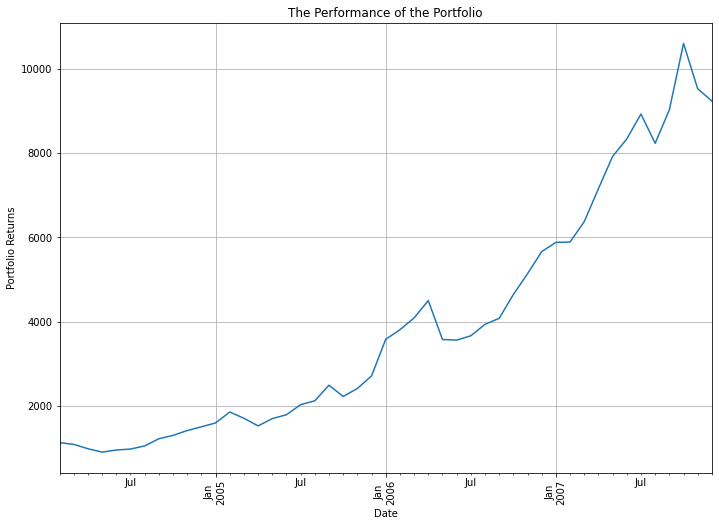

In [116]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
emerg_market_df_2['Portfolio_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [117]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(emerg_market_df_2.Portfolio_Value.max() - emerg_market_df_2.Portfolio_Value.min()) / emerg_market_df_2.Portfolio_Value.max()

0.9149462716556082

In [118]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (emerg_market_df_2['Portfolio_Value'][-1] / emerg_market_df_2['Portfolio_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 720.09%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [119]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
emerg_market_df_2['Monthly_Return'] = emerg_market_df_2['Portfolio_Value'].pct_change(1)

In [120]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = emerg_market_df_2['Monthly_Return'].mean() / emerg_market_df_2['Monthly_Return'].std()
Sharpe_Ratio

0.5361779850888462

In [121]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

3.6758510701081106

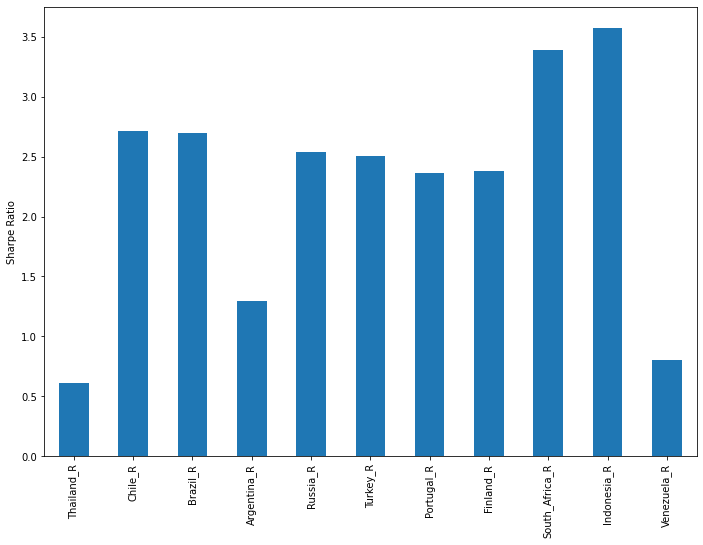

In [122]:
# Calcualte the Sharpe Ratio for equity portfolio
def emerg_market_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = emerg_market_df_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
emerg_market_sharpes = emerg_market_df_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']].apply(emerg_market_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
emerg_market_sharpes.plot.bar();  

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

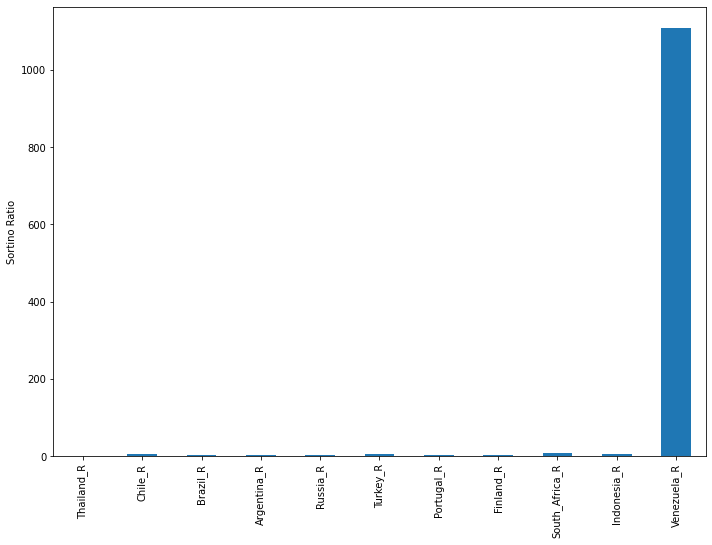

In [123]:
# Calcualte the Sortino Ratio for equity portfolio
def emerg_market_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = emerg_market_df_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
emerg_market_sortinos = emerg_market_df_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R',
                                           'Portugal_R','Finland_R','South_Africa_R','Indonesia_R',
                                           'Venezuela_R']].apply(emerg_market_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
emerg_market_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

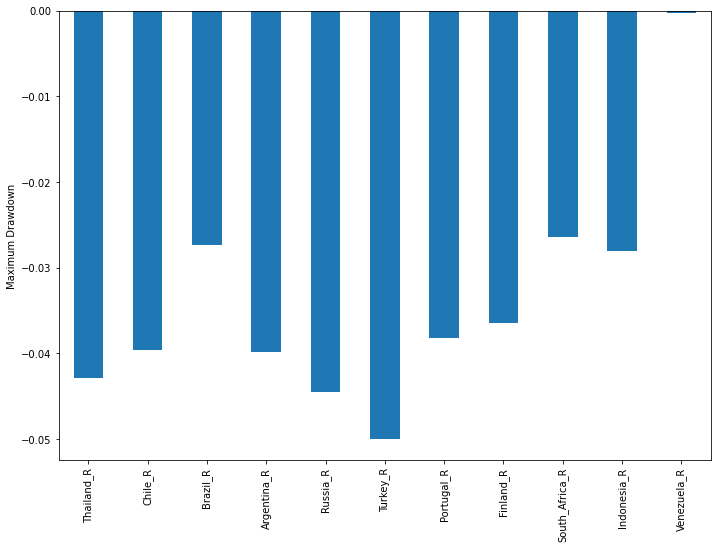

In [124]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def emerg_market_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = emerg_market_df_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
emerg_market_max_drawdown = emerg_market_df_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']].apply(emerg_market_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
emerg_market_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 9 %.
- Maximum Drawdown 91 %.
- Cumulative return of the o=portfolio 720.09%
- Sharpe Ratio 5.36%.

In [125]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import datetime
from datetime import datetime

In [126]:
# Dataset (Commodity.csv) from Master Equity Portfolio Excel file
# Dataset includes: Gold, WTI (West Texas Intermediate Crude Oil), Heat Oil, Natural Gas, Silver, US Coffee,
# US Corn, Wheat, Copper, Platinum, and Cocoa

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
commodity_df = pd.read_csv('Commodity_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(commodity_df.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
commodity_df.head()

(48, 12)


Date   Gold    WTI  Heat_Oil  Natural_Gas  Silver  US_Coffee  US_Corn  \
0  1/1/2004  402.2  33.05      1.70         5397    6246      75.50   276.25   
1  2/1/2004  396.4  36.16      1.75         5416    6696      75.05   296.25   
2  3/1/2004  427.3  35.76      1.72         5933    7936      73.75   320.00   
3  4/1/2004  387.0  37.38      1.71         5862    5867      67.15   316.50   
4  5/1/2004  394.0  39.88      1.87         6442    6105      85.55   304.00   

    Wheat  Copper  Platinum  Cocoa  
0  389.00   11430     894.0   3132  
1  380.75   13430     835.2   3239  
2  408.00   13590     988.8   3148  
3  381.50   12100     909.7   3040  
4  362.00   12780    1010.1   3055

In [127]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         48 non-null     object 
 1   Gold         48 non-null     float64
 2   WTI          48 non-null     float64
 3   Heat_Oil     48 non-null     float64
 4   Natural_Gas  48 non-null     int64  
 5   Silver       48 non-null     int64  
 6   US_Coffee    48 non-null     float64
 7   US_Corn      48 non-null     float64
 8   Wheat        48 non-null     float64
 9   Copper       48 non-null     int64  
 10  Platinum     48 non-null     float64
 11  Cocoa        48 non-null     int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 4.6+ KB


In [128]:
# Use pandas.to_datetime() function to convert argument to datetime
commodity_df['Date'] = pd.to_datetime(commodity_df.Date)

In [129]:
# Use pandas.DataFrame.astype() function to casta pandas object to a specified data type
commodity_df['Natural_Gas'] = commodity_df['Natural_Gas'].astype(float)
commodity_df['Silver'] = commodity_df['Silver'].astype(float)
commodity_df['Copper'] = commodity_df['Copper'].astype(float)
commodity_df['Cocoa'] = commodity_df['Cocoa'].astype(float)

In [130]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         48 non-null     datetime64[ns]
 1   Gold         48 non-null     float64       
 2   WTI          48 non-null     float64       
 3   Heat_Oil     48 non-null     float64       
 4   Natural_Gas  48 non-null     float64       
 5   Silver       48 non-null     float64       
 6   US_Coffee    48 non-null     float64       
 7   US_Corn      48 non-null     float64       
 8   Wheat        48 non-null     float64       
 9   Copper       48 non-null     float64       
 10  Platinum     48 non-null     float64       
 11  Cocoa        48 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 4.6 KB


In [131]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
commodity_df.set_index('Date',inplace=True)

In [132]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
commodity_df.isnull().any()

Gold           False
WTI            False
Heat_Oil       False
Natural_Gas    False
Silver         False
US_Coffee      False
US_Corn        False
Wheat          False
Copper         False
Platinum       False
Cocoa          False
dtype: bool

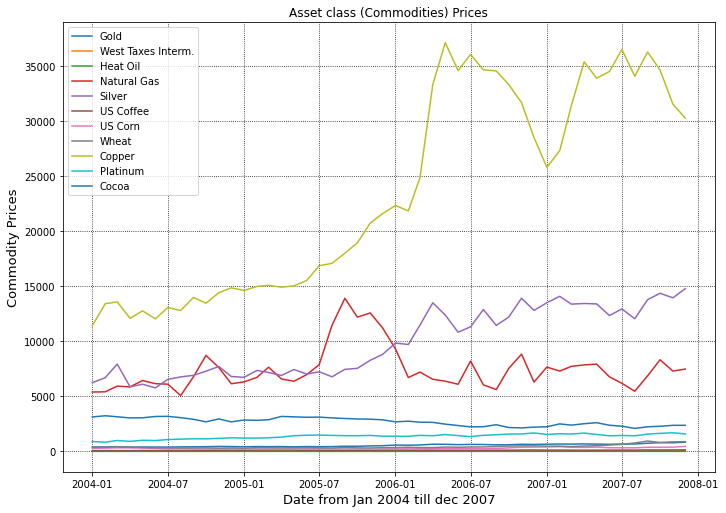

In [133]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df.index, commodity_df.Gold, label='Gold')
plt.plot(commodity_df.index, commodity_df.WTI, label='West Taxes Interm.')
plt.plot(commodity_df.index, commodity_df.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df.index, commodity_df.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df.index, commodity_df.Silver, label='Silver')
plt.plot(commodity_df.index, commodity_df.US_Coffee, label='US Coffee')
plt.plot(commodity_df.index, commodity_df.US_Corn, label='US Corn')
plt.plot(commodity_df.index, commodity_df.Wheat, label='Wheat')
plt.plot(commodity_df.index, commodity_df.Copper, label='Copper')
plt.plot(commodity_df.index, commodity_df.Platinum, label='Platinum')
plt.plot(commodity_df.index, commodity_df.Cocoa, label='Cocoa')
plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2004 till dec 2007', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [134]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
commodity_df = commodity_df[['Gold','WTI','Heat_Oil','Natural_Gas','Silver','US_Coffee','US_Corn','Wheat','Copper',
                             'Platinum','Cocoa']].pct_change()
commodity_df

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2004-01-01       NaN       NaN       NaN          NaN       NaN        NaN   
2004-02-01 -0.014421  0.094100  0.029412     0.003520  0.072046  -0.005960   
2004-03-01  0.077952 -0.011062 -0.017143     0.095458  0.185185  -0.017322   
2004-04-01 -0.094313  0.045302 -0.005814    -0.011967 -0.260711  -0.089492   
2004-05-01  0.018088  0.066881  0.093567     0.098942  0.040566   0.274013   
2004-06-01 -0.003553 -0.070963 -0.037433    -0.044551 -0.053890  -0.145529   
2004-07-01 -0.004075  0.182186  0.138889    -0.006986  0.134003  -0.090971   
2004-08-01  0.049616 -0.038356  0.019512    -0.169830  0.033740   0.042889   
2004-09-01  0.020224  0.178538  0.014354     0.339180  0.021415   0.188312   
2004-10-01  0.023406  0.042707 -0.075472     0.284032  0.054367  -0.096539   
2004-11-01  0.053209 -0.050811  0.086735    -0.126648  0.059106   0.269489   
2004-12-01 -0.030578 -0.115612 -0.070423    -0.193045 -0.118607   0.098465   
2005-01-01 -0.035886  0.109321  0.040404     0.027972 -0.010284   0.015422   
2005-02-01  0.034851  0.073651  0.106796     0.064705  0.092326   0.130992   
2005-03-01 -0.017869  0.070531  0.118421     0.137147 -0.025683   0.060848   
2005-04-01  0.014696 -0.102527  0.043137    -0.139553 -0.037238  -0.009889   
2005-05-01 -0.042989  0.045253  0.030075    -0.031283  0.078372  -0.054335   
2005-06-01  0.047081  0.087166  0.010949     0.094372 -0.055884  -0.115758   
2005-07-01 -0.013765  0.072035  0.007220     0.129494  0.029880  -0.014333   
2005-08-01  0.009072  0.138187 -0.028674     0.454914 -0.063139  -0.052351   
2005-09-01  0.081143 -0.039164 -0.007380     0.213476  0.099838  -0.043990   
2005-10-01 -0.008316 -0.097826 -0.003717    -0.123267  0.012336   0.034243   
2005-11-01  0.063427 -0.040830 -0.003731     0.031299  0.096689  -0.037765   
2005-12-01  0.045491  0.064899 -0.022472    -0.108207  0.065217   0.151613   
2006-01-01  0.103848  0.112713  0.019157    -0.170067  0.116780   0.103641   
2006-02-01 -0.016118 -0.095848  0.139098    -0.279304 -0.013198  -0.054146   
2006-03-01  0.035969  0.085002 -0.026403     0.073875  0.181070  -0.042934   
2006-04-01  0.120316  0.078793  0.006780    -0.090846  0.176829   0.001869   
2006-05-01 -0.014268 -0.008208  0.057239    -0.026087 -0.082309  -0.076959   
2006-06-01 -0.045136  0.037032 -0.025478    -0.043860 -0.126230   0.005558   
2006-07-01  0.033741  0.006357 -0.065359     0.345183  0.045417  -0.001508   
2006-08-01 -0.013087 -0.055645 -0.027972    -0.263427  0.139073   0.046804   
2006-09-01 -0.043617 -0.104611  0.021583    -0.070767 -0.112403   0.035096   
2006-10-01  0.009188 -0.066444  0.073944     0.340569  0.066550   0.005574   
2006-11-01  0.070849  0.074919 -0.029508     0.173878  0.140272   0.105774   
2006-12-01 -0.018086 -0.032948  0.054054    -0.287766 -0.079497   0.054302   
2007-01-01  0.026448 -0.047666 -0.028846     0.217177  0.054299  -0.067750   
2007-02-01  0.026687  0.062779  0.013201    -0.047867  0.043362   0.000425   
2007-03-01 -0.009561  0.066030 -0.009772     0.058904 -0.050355  -0.071793   
2007-04-01  0.026395 -0.002429  0.003289     0.017206  0.004108  -0.055835   
2007-05-01 -0.028655 -0.025871  0.026230     0.009157 -0.002678   0.084828   
2007-06-01 -0.019516  0.104202 -0.092652    -0.146440 -0.078753  -0.008043   
2007-07-01  0.029008  0.106537 -0.045775    -0.085929  0.048328   0.029730   
2007-08-01  0.009147 -0.053318  0.018450    -0.116782 -0.068494  -0.014436   
2007-09-01  0.103715  0.102917  0.155797     0.256401  0.143497   0.142033   
2007-10-01  0.066236  0.157605  0.000000     0.212518  0.042265  -0.056743   
2007-11-01 -0.012374 -0.061568  0.006270    -0.123409 -0.028796   0.037907   
2007-12-01  0.067374  0.081952 -0.062305     0.024788  0.059729   0.081382   

             US_Corn     Wheat    Copper  Platinum     Cocoa  
Date                                                

In [135]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
commodity_df.dropna(axis=0, inplace=True)
commodity_df

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2004-02-01 -0.014421  0.094100  0.029412     0.003520  0.072046  -0.005960   
2004-03-01  0.077952 -0.011062 -0.017143     0.095458  0.185185  -0.017322   
2004-04-01 -0.094313  0.045302 -0.005814    -0.011967 -0.260711  -0.089492   
2004-05-01  0.018088  0.066881  0.093567     0.098942  0.040566   0.274013   
2004-06-01 -0.003553 -0.070963 -0.037433    -0.044551 -0.053890  -0.145529   
2004-07-01 -0.004075  0.182186  0.138889    -0.006986  0.134003  -0.090971   
2004-08-01  0.049616 -0.038356  0.019512    -0.169830  0.033740   0.042889   
2004-09-01  0.020224  0.178538  0.014354     0.339180  0.021415   0.188312   
2004-10-01  0.023406  0.042707 -0.075472     0.284032  0.054367  -0.096539   
2004-11-01  0.053209 -0.050811  0.086735    -0.126648  0.059106   0.269489   
2004-12-01 -0.030578 -0.115612 -0.070423    -0.193045 -0.118607   0.098465   
2005-01-01 -0.035886  0.109321  0.040404     0.027972 -0.010284   0.015422   
2005-02-01  0.034851  0.073651  0.106796     0.064705  0.092326   0.130992   
2005-03-01 -0.017869  0.070531  0.118421     0.137147 -0.025683   0.060848   
2005-04-01  0.014696 -0.102527  0.043137    -0.139553 -0.037238  -0.009889   
2005-05-01 -0.042989  0.045253  0.030075    -0.031283  0.078372  -0.054335   
2005-06-01  0.047081  0.087166  0.010949     0.094372 -0.055884  -0.115758   
2005-07-01 -0.013765  0.072035  0.007220     0.129494  0.029880  -0.014333   
2005-08-01  0.009072  0.138187 -0.028674     0.454914 -0.063139  -0.052351   
2005-09-01  0.081143 -0.039164 -0.007380     0.213476  0.099838  -0.043990   
2005-10-01 -0.008316 -0.097826 -0.003717    -0.123267  0.012336   0.034243   
2005-11-01  0.063427 -0.040830 -0.003731     0.031299  0.096689  -0.037765   
2005-12-01  0.045491  0.064899 -0.022472    -0.108207  0.065217   0.151613   
2006-01-01  0.103848  0.112713  0.019157    -0.170067  0.116780   0.103641   
2006-02-01 -0.016118 -0.095848  0.139098    -0.279304 -0.013198  -0.054146   
2006-03-01  0.035969  0.085002 -0.026403     0.073875  0.181070  -0.042934   
2006-04-01  0.120316  0.078793  0.006780    -0.090846  0.176829   0.001869   
2006-05-01 -0.014268 -0.008208  0.057239    -0.026087 -0.082309  -0.076959   
2006-06-01 -0.045136  0.037032 -0.025478    -0.043860 -0.126230   0.005558   
2006-07-01  0.033741  0.006357 -0.065359     0.345183  0.045417  -0.001508   
2006-08-01 -0.013087 -0.055645 -0.027972    -0.263427  0.139073   0.046804   
2006-09-01 -0.043617 -0.104611  0.021583    -0.070767 -0.112403   0.035096   
2006-10-01  0.009188 -0.066444  0.073944     0.340569  0.066550   0.005574   
2006-11-01  0.070849  0.074919 -0.029508     0.173878  0.140272   0.105774   
2006-12-01 -0.018086 -0.032948  0.054054    -0.287766 -0.079497   0.054302   
2007-01-01  0.026448 -0.047666 -0.028846     0.217177  0.054299  -0.067750   
2007-02-01  0.026687  0.062779  0.013201    -0.047867  0.043362   0.000425   
2007-03-01 -0.009561  0.066030 -0.009772     0.058904 -0.050355  -0.071793   
2007-04-01  0.026395 -0.002429  0.003289     0.017206  0.004108  -0.055835   
2007-05-01 -0.028655 -0.025871  0.026230     0.009157 -0.002678   0.084828   
2007-06-01 -0.019516  0.104202 -0.092652    -0.146440 -0.078753  -0.008043   
2007-07-01  0.029008  0.106537 -0.045775    -0.085929  0.048328   0.029730   
2007-08-01  0.009147 -0.053318  0.018450    -0.116782 -0.068494  -0.014436   
2007-09-01  0.103715  0.102917  0.155797     0.256401  0.143497   0.142033   
2007-10-01  0.066236  0.157605  0.000000     0.212518  0.042265  -0.056743   
2007-11-01 -0.012374 -0.061568  0.006270    -0.123409 -0.028796   0.037907   
2007-12-01  0.067374  0.081952 -0.062305     0.024788  0.059729   0.081382   

             US_Corn     Wheat    Copper  Platinum     Cocoa  
Date                                                          
2004-02-01  0.072398 -0.021208  0.174978 -0.065772  0.034163  
2004

In [136]:
print('There are {} rows in the DataFrame'.format(commodity_df.shape[0]))

There are 47 rows in the DataFrame


In [137]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
commodity_df_2 = commodity_df.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.
- The dataset (commodity_2004_2007) cover a period of four years, so one year has 252 days of trading days or 12 months * 4 years equal 48 minus one month (null value) equal 47 months.

In [138]:
vol_com_df = commodity_df

In [139]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_com_df['Gold_Vol'] = vol_com_df['Gold'].rolling(47).std() * math.sqrt(47)
vol_com_df['WTI_Vol'] = vol_com_df['WTI'].rolling(47).std() * math.sqrt(47)
vol_com_df['Heat_Oil_Vol'] = vol_com_df['Heat_Oil'].rolling(47).std() * math.sqrt(47)
vol_com_df['Natural_Gas_Vol'] = vol_com_df['Natural_Gas'].rolling(47).std() * math.sqrt(47)
vol_com_df['Silver_Vol'] = vol_com_df['Silver'].rolling(47).std() * math.sqrt(47)
vol_com_df['US_Coffee_Vol'] = vol_com_df['US_Coffee'].rolling(47).std() * math.sqrt(47)
vol_com_df['US_Corn_Vol'] = vol_com_df['US_Corn'].rolling(47).std() * math.sqrt(47)
vol_com_df['Wheat_Vol'] = vol_com_df['Wheat'].rolling(47).std() * math.sqrt(47)
vol_com_df['Copper_Vol'] = vol_com_df['Copper'].rolling(47).std() * math.sqrt(47)
vol_com_df['Platinum_Vol'] = vol_com_df['Platinum'].rolling(47).std() * math.sqrt(47)
vol_com_df['Cocoa_Vol'] = vol_com_df['Cocoa'].rolling(47).std() * math.sqrt(47)

In [140]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_com_df.dropna(axis=0, inplace=True)

In [141]:
vol_com_df[['Gold_Vol','WTI_Vol','Heat_Oil_Vol','Natural_Gas_Vol','Silver_Vol','US_Coffee_Vol','US_Corn_Vol',
           'Wheat_Vol','Copper_Vol','Platinum_Vol','Cocoa_Vol']]

Gold_Vol   WTI_Vol  Heat_Oil_Vol  Natural_Gas_Vol  Silver_Vol  \
Date                                                                        
2007-12-01  0.306134  0.554422      0.394152         1.194513    0.630244   

            US_Coffee_Vol  US_Corn_Vol  Wheat_Vol  Copper_Vol  Platinum_Vol  \
Date                                                                          
2007-12-01       0.630225      0.61633   0.577043    0.571878      0.401136   

            Cocoa_Vol  
Date                   
2007-12-01   0.358956

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [142]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility_com = (0.306134+0.554422+0.394152+1.194513+0.630244+0.630225+0.61633+0.577043+0.571878+0.401136+0.358956) / 11
volatility_com

0.5668211818181818

In [143]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
commodity_target_vol = 0.5668211818181818 / 11
commodity_target_vol

0.05152919834710743

In [144]:
# Create a new dataframe called commodity_portfolio_df which calculates the allocation to each asset class 
commodity_portfolio_df = equity_df

In [145]:
commodity_portfolio_df['Gold_Alloc'] = commodity_target_vol / vol_com_df['Gold_Vol']
commodity_portfolio_df['WTI_Alloc'] = commodity_target_vol / vol_com_df['WTI_Vol']
commodity_portfolio_df['Heat_Oil_Alloc'] = commodity_target_vol / vol_com_df['Heat_Oil_Vol']
commodity_portfolio_df['Natural_Gas_Alloc'] = commodity_target_vol / vol_com_df['Natural_Gas_Vol']
commodity_portfolio_df['Silver_Alloc'] = commodity_target_vol / vol_com_df['Silver_Vol']
commodity_portfolio_df['US_Coffee_Alloc'] = commodity_target_vol / vol_com_df['US_Coffee_Vol']
commodity_portfolio_df['US_Corn_Alloc'] = commodity_target_vol / vol_com_df['US_Corn_Vol']
commodity_portfolio_df['Wheat_Alloc'] = commodity_target_vol / vol_com_df['Wheat_Vol']
commodity_portfolio_df['Copper_Alloc'] = commodity_target_vol / vol_com_df['Copper_Vol']
commodity_portfolio_df['Platinum_Alloc'] = commodity_target_vol / vol_com_df['Platinum_Vol']
commodity_portfolio_df['Cocoa_Alloc'] = commodity_target_vol / vol_com_df['Cocoa_Vol']

In [146]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
commodity_portfolio_df.dropna(axis=0, inplace=True)

In [147]:
commodity_portfolio_df[['Gold_Alloc','WTI_Alloc','Heat_Oil_Alloc','Natural_Gas_Alloc','Silver_Alloc',
                        'US_Coffee_Alloc','US_Corn_Alloc','Wheat_Alloc','Copper_Alloc','Platinum_Alloc','Cocoa_Alloc']]

Gold_Alloc  WTI_Alloc  Heat_Oil_Alloc  Natural_Gas_Alloc  \
Date                                                                   
2007-12-01    0.168322   0.092942        0.130734           0.043138   

            Silver_Alloc  US_Coffee_Alloc  US_Corn_Alloc  Wheat_Alloc  \
Date                                                                    
2007-12-01      0.081761         0.081763       0.083607     0.089299   

            Copper_Alloc  Platinum_Alloc  Cocoa_Alloc  
Date                                                   
2007-12-01      0.090105        0.128458     0.143553

In [148]:
# I will multiply the monthly commodity prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (Commodity)

In [149]:
commodity_df_2['Gold_R'] = commodity_df_2['Gold'] * 0.168322
commodity_df_2['WTI_R'] = commodity_df_2['WTI'] * 0.092942
commodity_df_2['Heat_Oil_R'] = commodity_df_2['Heat_Oil'] * 0.130734
commodity_df_2['Natural_Gas_R'] = commodity_df_2['Natural_Gas'] * 0.043138
commodity_df_2['Silver_R'] = commodity_df_2['Silver'] * 0.081761
commodity_df_2['US_Coffee_R'] = commodity_df_2['US_Coffee'] * 0.081763
commodity_df_2['US_Corn_R'] = commodity_df_2['US_Corn'] * 0.083607
commodity_df_2['Wheat_R'] = commodity_df_2['Wheat'] * 0.089299
commodity_df_2['Copper_R'] = commodity_df_2['Copper'] * 0.090105
commodity_df_2['Platinum_R'] = commodity_df_2['Platinum'] * 0.128458
commodity_df_2['Cocoa_R'] = commodity_df_2['Cocoa'] * 0.143553

In [150]:
commodity_df_2

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2004-02-01 -0.014421  0.094100  0.029412     0.003520  0.072046  -0.005960   
2004-03-01  0.077952 -0.011062 -0.017143     0.095458  0.185185  -0.017322   
2004-04-01 -0.094313  0.045302 -0.005814    -0.011967 -0.260711  -0.089492   
2004-05-01  0.018088  0.066881  0.093567     0.098942  0.040566   0.274013   
2004-06-01 -0.003553 -0.070963 -0.037433    -0.044551 -0.053890  -0.145529   
2004-07-01 -0.004075  0.182186  0.138889    -0.006986  0.134003  -0.090971   
2004-08-01  0.049616 -0.038356  0.019512    -0.169830  0.033740   0.042889   
2004-09-01  0.020224  0.178538  0.014354     0.339180  0.021415   0.188312   
2004-10-01  0.023406  0.042707 -0.075472     0.284032  0.054367  -0.096539   
2004-11-01  0.053209 -0.050811  0.086735    -0.126648  0.059106   0.269489   
2004-12-01 -0.030578 -0.115612 -0.070423    -0.193045 -0.118607   0.098465   
2005-01-01 -0.035886  0.109321  0.040404     0.027972 -0.010284   0.015422   
2005-02-01  0.034851  0.073651  0.106796     0.064705  0.092326   0.130992   
2005-03-01 -0.017869  0.070531  0.118421     0.137147 -0.025683   0.060848   
2005-04-01  0.014696 -0.102527  0.043137    -0.139553 -0.037238  -0.009889   
2005-05-01 -0.042989  0.045253  0.030075    -0.031283  0.078372  -0.054335   
2005-06-01  0.047081  0.087166  0.010949     0.094372 -0.055884  -0.115758   
2005-07-01 -0.013765  0.072035  0.007220     0.129494  0.029880  -0.014333   
2005-08-01  0.009072  0.138187 -0.028674     0.454914 -0.063139  -0.052351   
2005-09-01  0.081143 -0.039164 -0.007380     0.213476  0.099838  -0.043990   
2005-10-01 -0.008316 -0.097826 -0.003717    -0.123267  0.012336   0.034243   
2005-11-01  0.063427 -0.040830 -0.003731     0.031299  0.096689  -0.037765   
2005-12-01  0.045491  0.064899 -0.022472    -0.108207  0.065217   0.151613   
2006-01-01  0.103848  0.112713  0.019157    -0.170067  0.116780   0.103641   
2006-02-01 -0.016118 -0.095848  0.139098    -0.279304 -0.013198  -0.054146   
2006-03-01  0.035969  0.085002 -0.026403     0.073875  0.181070  -0.042934   
2006-04-01  0.120316  0.078793  0.006780    -0.090846  0.176829   0.001869   
2006-05-01 -0.014268 -0.008208  0.057239    -0.026087 -0.082309  -0.076959   
2006-06-01 -0.045136  0.037032 -0.025478    -0.043860 -0.126230   0.005558   
2006-07-01  0.033741  0.006357 -0.065359     0.345183  0.045417  -0.001508   
2006-08-01 -0.013087 -0.055645 -0.027972    -0.263427  0.139073   0.046804   
2006-09-01 -0.043617 -0.104611  0.021583    -0.070767 -0.112403   0.035096   
2006-10-01  0.009188 -0.066444  0.073944     0.340569  0.066550   0.005574   
2006-11-01  0.070849  0.074919 -0.029508     0.173878  0.140272   0.105774   
2006-12-01 -0.018086 -0.032948  0.054054    -0.287766 -0.079497   0.054302   
2007-01-01  0.026448 -0.047666 -0.028846     0.217177  0.054299  -0.067750   
2007-02-01  0.026687  0.062779  0.013201    -0.047867  0.043362   0.000425   
2007-03-01 -0.009561  0.066030 -0.009772     0.058904 -0.050355  -0.071793   
2007-04-01  0.026395 -0.002429  0.003289     0.017206  0.004108  -0.055835   
2007-05-01 -0.028655 -0.025871  0.026230     0.009157 -0.002678   0.084828   
2007-06-01 -0.019516  0.104202 -0.092652    -0.146440 -0.078753  -0.008043   
2007-07-01  0.029008  0.106537 -0.045775    -0.085929  0.048328   0.029730   
2007-08-01  0.009147 -0.053318  0.018450    -0.116782 -0.068494  -0.014436   
2007-09-01  0.103715  0.102917  0.155797     0.256401  0.143497   0.142033   
2007-10-01  0.066236  0.157605  0.000000     0.212518  0.042265  -0.056743   
2007-11-01 -0.012374 -0.061568  0.006270    -0.123409 -0.028796   0.037907   
2007-12-01  0.067374  0.081952 -0.062305     0.024788  0.059729   0.081382   

             US_Corn     Wheat    Copper  Platinum  ...     WTI_R  Heat_Oil_R  \
Date                                                ...                         
2004-02-01  0.072398 -0.021208 

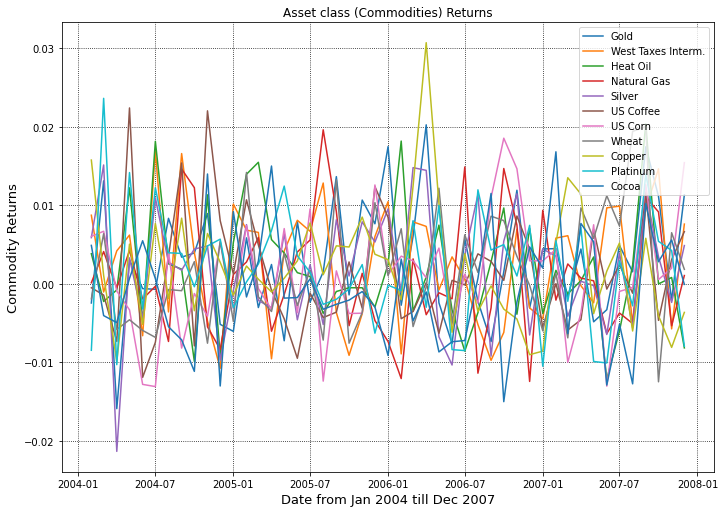

In [151]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2.index, commodity_df_2.Gold_R, label='Gold')
plt.plot(commodity_df_2.index, commodity_df_2.WTI_R, label='West Taxes Interm.')
plt.plot(commodity_df_2.index, commodity_df_2.Heat_Oil_R, label='Heat Oil')
plt.plot(commodity_df_2.index, commodity_df_2.Natural_Gas_R, label='Natural Gas')
plt.plot(commodity_df_2.index, commodity_df_2.Silver_R, label='Silver')
plt.plot(commodity_df_2.index, commodity_df_2.US_Coffee_R, label='US Coffee')
plt.plot(commodity_df_2.index, commodity_df_2.US_Corn_R, label='US Corn')
plt.plot(commodity_df_2.index, commodity_df_2.Wheat_R, label='Wheat')
plt.plot(commodity_df_2.index, commodity_df_2.Copper_R, label='Copper')
plt.plot(commodity_df_2.index, commodity_df_2.Platinum_R, label='Platinum')
plt.plot(commodity_df_2.index, commodity_df_2.Cocoa_R, label='Cocoa')
plt.title('Asset class (Commodities) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Commodity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [152]:
# Adding up all the returns of all asset classes for all commodities

In [153]:
commodity_df_2['Portfolio_R'] = commodity_df_2['Gold_R'] + commodity_df_2['WTI_R'] + commodity_df_2['Heat_Oil_R'] + commodity_df_2['Natural_Gas_R'] + commodity_df_2['Silver_R'] + commodity_df_2['US_Coffee_R'] + commodity_df_2['US_Corn_R'] + commodity_df_2['Wheat_R'] + commodity_df_2['Copper_R'] + commodity_df_2['Platinum_R'] + commodity_df_2['Cocoa_R']

In [154]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [155]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
commodity_df_2['Portfolio_Value'] = ((commodity_df_2['Portfolio_R'] + 1).cumprod())*1000

In [156]:
commodity_df_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R','Portfolio_R', 'Portfolio_Value']]

Gold_R     WTI_R  Heat_Oil_R  Natural_Gas_R  Silver_R  \
Date                                                                  
2004-02-01 -0.002427  0.008746    0.003845       0.000152  0.005891   
2004-03-01  0.013121 -0.001028   -0.002241       0.004118  0.015141   
2004-04-01 -0.015875  0.004210   -0.000760      -0.000516 -0.021316   
2004-05-01  0.003045  0.006216    0.012232       0.004268  0.003317   
2004-06-01 -0.000598 -0.006595   -0.004894      -0.001922 -0.004406   
2004-07-01 -0.000686  0.016933    0.018157      -0.000301  0.010956   
2004-08-01  0.008352 -0.003565    0.002551      -0.007326  0.002759   
2004-09-01  0.003404  0.016594    0.001877       0.014632  0.001751   
2004-10-01  0.003940  0.003969   -0.009867       0.012253  0.004445   
2004-11-01  0.008956 -0.004723    0.011339      -0.005463  0.004833   
2004-12-01 -0.005147 -0.010745   -0.009207      -0.008328 -0.009697   
2005-01-01 -0.006040  0.010161    0.005282       0.001207 -0.000841   
2005-02-01  0.005866  0.006845    0.013962       0.002791  0.007549   
2005-03-01 -0.003008  0.006555    0.015482       0.005916 -0.002100   
2005-04-01  0.002474 -0.009529    0.005640      -0.006020 -0.003045   
2005-05-01 -0.007236  0.004206    0.003932      -0.001349  0.006408   
2005-06-01  0.007925  0.008101    0.001431       0.004071 -0.004569   
2005-07-01 -0.002317  0.006695    0.000944       0.005586  0.002443   
2005-08-01  0.001527  0.012843   -0.003749       0.019624 -0.005162   
2005-09-01  0.013658 -0.003640   -0.000965       0.009209  0.008163   
2005-10-01 -0.001400 -0.009092   -0.000486      -0.005317  0.001009   
2005-11-01  0.010676 -0.003795   -0.000488       0.001350  0.007905   
2005-12-01  0.007657  0.006032   -0.002938      -0.004668  0.005332   
2006-01-01  0.017480  0.010476    0.002504      -0.007336  0.009548   
2006-02-01 -0.002713 -0.008908    0.018185      -0.012049 -0.001079   
2006-03-01  0.006054  0.007900   -0.003452       0.003187  0.014804   
2006-04-01  0.020252  0.007323    0.000886      -0.003919  0.014458   
2006-05-01 -0.002402 -0.000763    0.007483      -0.001125 -0.006730   
2006-06-01 -0.007597  0.003442   -0.003331      -0.001892 -0.010321   
2006-07-01  0.005679  0.000591   -0.008545       0.014891  0.003713   
2006-08-01 -0.002203 -0.005172   -0.003657      -0.011364  0.011371   
2006-09-01 -0.007342 -0.009723    0.002822      -0.003053 -0.009190   
2006-10-01  0.001547 -0.006175    0.009667       0.014691  0.005441   
2006-11-01  0.011925  0.006963   -0.003858       0.007501  0.011469   
2006-12-01 -0.003044 -0.003062    0.007067      -0.012414 -0.006500   
2007-01-01  0.004452 -0.004430   -0.003771       0.009369  0.004440   
2007-02-01  0.004492  0.005835    0.001726      -0.002065  0.003545   
2007-03-01 -0.001609  0.006137   -0.001278       0.002541 -0.004117   
2007-04-01  0.004443 -0.000226    0.000430       0.000742  0.000336   
2007-05-01 -0.004823 -0.002405    0.003429       0.000395 -0.000219   
2007-06-01 -0.003285  0.009685   -0.012113      -0.006317 -0.006439   
2007-07-01  0.004883  0.009902   -0.005984      -0.003707  0.003951   
2007-08-01  0.001540 -0.004955    0.002412      -0.005038 -0.005600   
2007-09-01  0.017457  0.009565    0.020368       0.011061  0.011732   
2007-10-01  0.011149  0.014648    0.000000       0.009168  0.003456   
2007-11-01 -0.002083 -0.005722    0.000820      -0.005324 -0.002354   
2007-12-01  0.011341  0.007617   -0.008145       0.001069  0.004884   

            US_Coffee_R  US_Corn_R   Wheat_R  Copper_R  Platinum_R   Cocoa_R  \
Date                                                                           
2004-02-01    -0.000487   0.006053 -0.001894  0.015766   -0.008449  0.004904   
2004-03-01    -0.001416   0.006703  0.006391  0.001073    0.023624 -0.004033   
2004-04-01    -0.007317  -0.000914 -0.005800 -0.009879   -0.010276 -0.004925   
2004-05-01     0.022404  -0.003302 -0.004564  0.005064    0.014177  0.000708   
2004-06-01    -0.011899  -0.012789 -0.005920 -0.005147

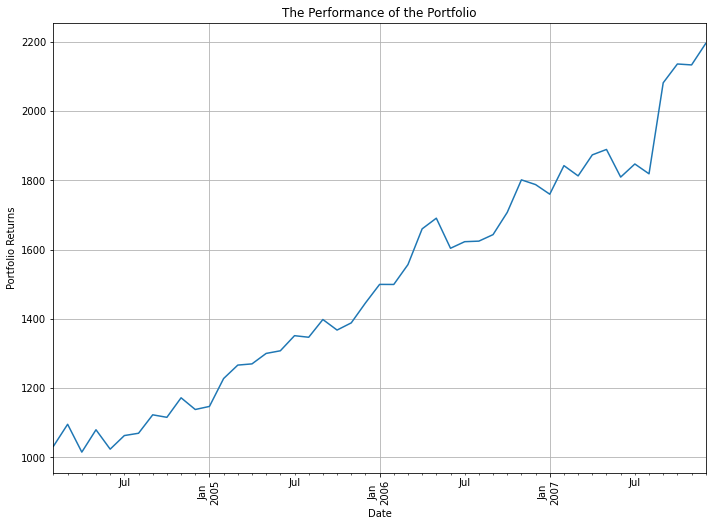

In [157]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
commodity_df_2['Portfolio_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [158]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(commodity_df_2.Portfolio_Value.max() - commodity_df_2.Portfolio_Value.min()) / commodity_df_2.Portfolio_Value.max()

0.5375645448133122

In [159]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (commodity_df_2['Portfolio_Value'][-1] / commodity_df_2['Portfolio_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 112.69%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [160]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
commodity_df_2['Monthly_Return'] = commodity_df_2['Portfolio_Value'].pct_change(1)

In [161]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = commodity_df_2['Monthly_Return'].mean() / commodity_df_2['Monthly_Return'].std()
Sharpe_Ratio

0.45312945214623523

In [162]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

3.106499013183542

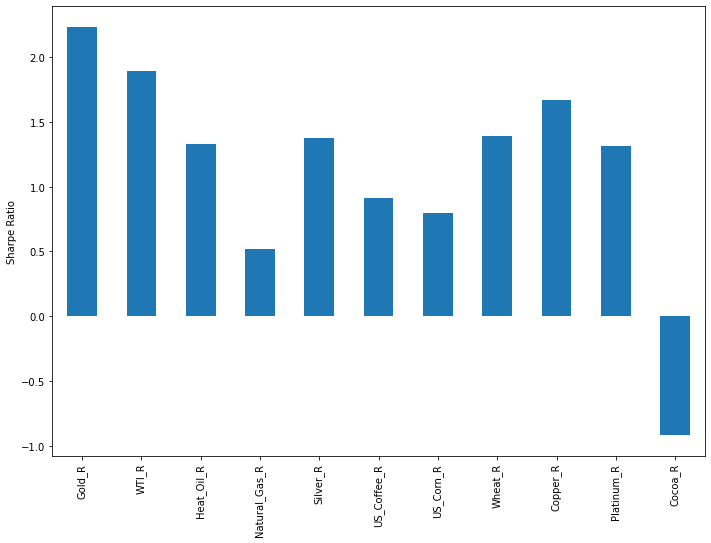

In [163]:
# Calcualte the Sharpe Ratio for commodity portfolio
def commodity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = commodity_df_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sharpes = commodity_df_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
commodity_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

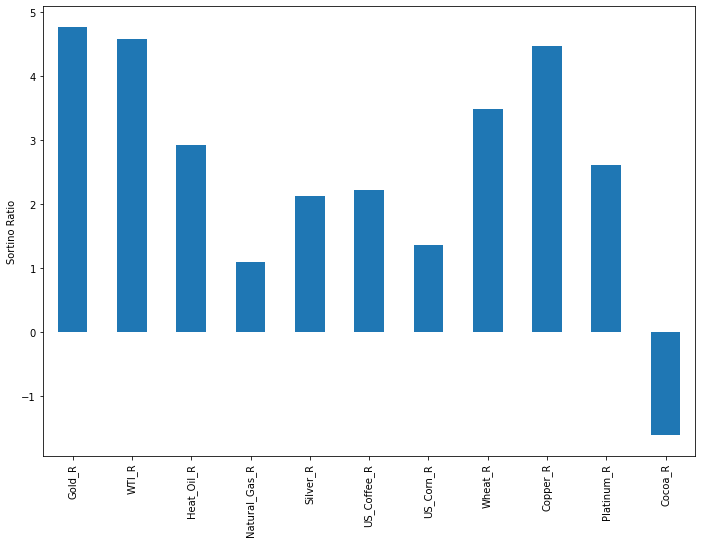

In [164]:
# Calcualte the Sortino Ratio for commodity portfolio
def commodity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = commodity_df_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sortinos = commodity_df_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
commodity_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

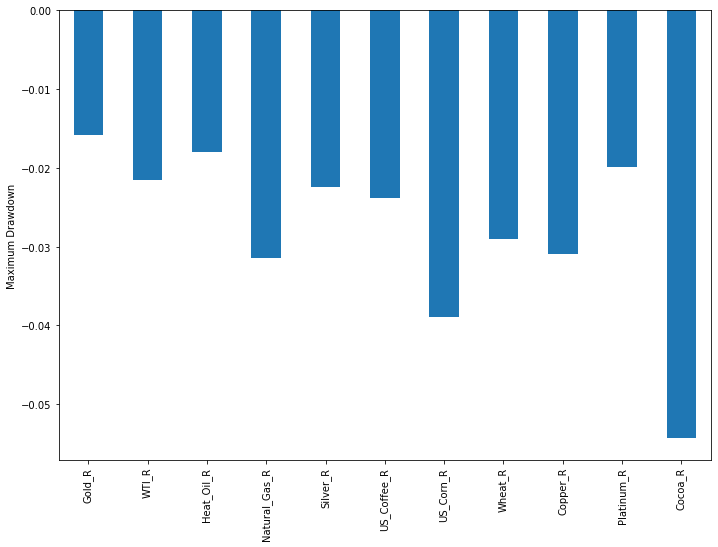

In [165]:
# Calcualte the Maximum Drawdown (MDD) for commodity portfolio
def commodity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = commodity_df_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_max_drawdown = commodity_df_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
commodity_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 5.15 %.
- Maximum Drawdown 5.37%.
- Cumulative return of the o=portfolio 112.69%
- Sharpe Ratio 4.53%.


In [166]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import datetime
from datetime import datetime

In [167]:
# Dataset (Currency.csv) from Master Equity Portfolio Excel file
# We have five different currency:Australian dollar (AUD), Euro, Canadian dollar (CAD), Japanese yen (JPY),
# and British pound sterling (GBP.)

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
currency_df = pd.read_csv('Currency_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(currency_df.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
currency_df.head()

(48, 6)


Date   AUD  EURO   CAD     JPY   GBP
0  1/1/2004  1.37  0.92  1.39  120.20  0.68
1  2/1/2004  1.38  0.95  1.33  123.23  0.66
2  3/1/2004  1.40  0.91  1.31  120.76  0.65
3  4/1/2004  1.42  0.90  1.34  119.74  0.66
4  5/1/2004  1.41  0.89  1.33  121.30  0.65

In [168]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    48 non-null     object 
 1   AUD     48 non-null     float64
 2   EURO    48 non-null     float64
 3   CAD     48 non-null     float64
 4   JPY     48 non-null     float64
 5   GBP     48 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.4+ KB


In [169]:
# Use pandas.to_datetime() function to convert argument to datetime
currency_df['Date'] = pd.to_datetime(currency_df.Date)

In [170]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    48 non-null     datetime64[ns]
 1   AUD     48 non-null     float64       
 2   EURO    48 non-null     float64       
 3   CAD     48 non-null     float64       
 4   JPY     48 non-null     float64       
 5   GBP     48 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.4 KB


In [171]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
currency_df.set_index('Date',inplace=True)

In [172]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
currency_df.isnull().any()

AUD     False
EURO    False
CAD     False
JPY     False
GBP     False
dtype: bool

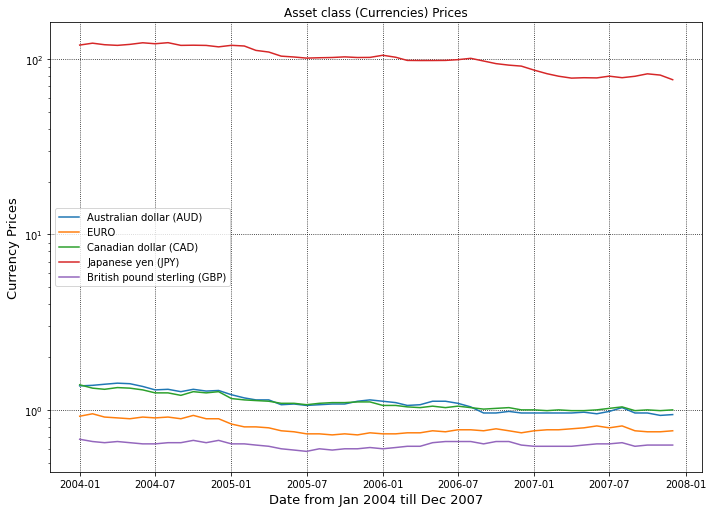

In [174]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df.index, currency_df.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df.index, currency_df.EURO, label='EURO')
plt.plot(currency_df.index, currency_df.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df.index, currency_df.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df.index, currency_df.GBP, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [175]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
currency_df = currency_df[['AUD','EURO','CAD','JPY','GBP']].pct_change()
currency_df

AUD      EURO       CAD       JPY       GBP
Date                                                        
2004-01-01       NaN       NaN       NaN       NaN       NaN
2004-02-01  0.007299  0.032609 -0.043165  0.025208 -0.029412
2004-03-01  0.014493 -0.042105 -0.015038 -0.020044 -0.015152
2004-04-01  0.014286 -0.010989  0.022901 -0.008447  0.015385
2004-05-01 -0.007042 -0.011111 -0.007463  0.013028 -0.015152
2004-06-01 -0.035461  0.022472 -0.022556  0.021270 -0.015385
2004-07-01 -0.044118 -0.010989 -0.038462 -0.012754  0.000000
2004-08-01  0.007692  0.011111  0.000000  0.014227  0.015625
2004-09-01 -0.030534 -0.021978 -0.032000 -0.034747  0.000000
2004-10-01  0.031496  0.044944  0.049587  0.002172  0.030769
2004-11-01 -0.022901 -0.043011 -0.015748 -0.002750 -0.029851
2004-12-01  0.007812  0.000000  0.016000 -0.018720  0.030769
2005-01-01 -0.054264 -0.067416 -0.086614  0.020354 -0.044776
2005-02-01 -0.040984 -0.036145 -0.017241 -0.008931  0.000000
2005-03-01 -0.025641  0.000000 -0.008772 -0.056005 -0.015625
2005-04-01  0.000000 -0.012500 -0.008850 -0.021322 -0.015873
2005-05-01 -0.061404 -0.037975 -0.026786 -0.052507 -0.032258
2005-06-01  0.009346 -0.013158  0.000000 -0.011256 -0.016667
2005-07-01 -0.018519 -0.026667 -0.018349 -0.014401 -0.016949
2005-08-01  0.009434  0.000000  0.018692  0.004838  0.034483
2005-09-01  0.009346 -0.013699  0.009174  0.003242 -0.016667
2005-10-01  0.000000  0.013889  0.000000  0.008226  0.016949
2005-11-01  0.037037 -0.013699  0.009091 -0.008354  0.000000
2005-12-01  0.017857  0.027778  0.000000  0.001567  0.016667
2006-01-01 -0.017544 -0.013514 -0.045045  0.028362 -0.016393
2006-02-01 -0.017857  0.000000  0.000000 -0.025678  0.016667
2006-03-01 -0.036364  0.013699 -0.018868 -0.040800  0.016393
2006-04-01  0.009434  0.000000 -0.009615 -0.001425  0.000000
2006-05-01  0.046729  0.027027  0.019417  0.000306  0.048387
2006-06-01  0.000000 -0.013158 -0.019048  0.001222  0.015385
2006-07-01 -0.026786  0.026667  0.019417  0.009870  0.000000
2006-08-01 -0.045872  0.000000 -0.019048  0.017632  0.000000
2006-09-01 -0.076923 -0.012987 -0.019417 -0.034653 -0.030303
2006-10-01  0.000000  0.026316  0.009901 -0.033846  0.031250
2006-11-01  0.020833 -0.025641  0.009804 -0.019427  0.000000
2006-12-01 -0.020408 -0.026316 -0.029126 -0.012775 -0.045455
2007-01-01  0.000000  0.027027  0.000000 -0.051431 -0.015873
2007-02-01  0.000000  0.013158 -0.010000 -0.045896  0.000000
2007-03-01  0.000000  0.000000  0.010101 -0.032352  0.000000
2007-04-01  0.000000  0.012987 -0.010000 -0.024668  0.000000
2007-05-01  0.010417  0.012821  0.000000  0.005392  0.016129
2007-06-01 -0.020619  0.025316  0.010101 -0.002682  0.015873
2007-07-01  0.031579 -0.024691  0.020000  0.023431  0.000000
2007-08-01  0.051020  0.025316  0.019608 -0.020143  0.015625
2007-09-01 -0.067961 -0.061728 -0.048077  0.018897 -0.046154
2007-10-01  0.000000 -0.013158  0.010101  0.032707  0.016129
2007-11-01 -0.031250  0.000000 -0.010000 -0.016382  0.000000
2007-12-01  0.010753  0.013333  0.010101 -0.058969  0.000000

In [176]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
currency_df.dropna(axis=0, inplace=True)
currency_df

AUD      EURO       CAD       JPY       GBP
Date                                                        
2004-02-01  0.007299  0.032609 -0.043165  0.025208 -0.029412
2004-03-01  0.014493 -0.042105 -0.015038 -0.020044 -0.015152
2004-04-01  0.014286 -0.010989  0.022901 -0.008447  0.015385
2004-05-01 -0.007042 -0.011111 -0.007463  0.013028 -0.015152
2004-06-01 -0.035461  0.022472 -0.022556  0.021270 -0.015385
2004-07-01 -0.044118 -0.010989 -0.038462 -0.012754  0.000000
2004-08-01  0.007692  0.011111  0.000000  0.014227  0.015625
2004-09-01 -0.030534 -0.021978 -0.032000 -0.034747  0.000000
2004-10-01  0.031496  0.044944  0.049587  0.002172  0.030769
2004-11-01 -0.022901 -0.043011 -0.015748 -0.002750 -0.029851
2004-12-01  0.007812  0.000000  0.016000 -0.018720  0.030769
2005-01-01 -0.054264 -0.067416 -0.086614  0.020354 -0.044776
2005-02-01 -0.040984 -0.036145 -0.017241 -0.008931  0.000000
2005-03-01 -0.025641  0.000000 -0.008772 -0.056005 -0.015625
2005-04-01  0.000000 -0.012500 -0.008850 -0.021322 -0.015873
2005-05-01 -0.061404 -0.037975 -0.026786 -0.052507 -0.032258
2005-06-01  0.009346 -0.013158  0.000000 -0.011256 -0.016667
2005-07-01 -0.018519 -0.026667 -0.018349 -0.014401 -0.016949
2005-08-01  0.009434  0.000000  0.018692  0.004838  0.034483
2005-09-01  0.009346 -0.013699  0.009174  0.003242 -0.016667
2005-10-01  0.000000  0.013889  0.000000  0.008226  0.016949
2005-11-01  0.037037 -0.013699  0.009091 -0.008354  0.000000
2005-12-01  0.017857  0.027778  0.000000  0.001567  0.016667
2006-01-01 -0.017544 -0.013514 -0.045045  0.028362 -0.016393
2006-02-01 -0.017857  0.000000  0.000000 -0.025678  0.016667
2006-03-01 -0.036364  0.013699 -0.018868 -0.040800  0.016393
2006-04-01  0.009434  0.000000 -0.009615 -0.001425  0.000000
2006-05-01  0.046729  0.027027  0.019417  0.000306  0.048387
2006-06-01  0.000000 -0.013158 -0.019048  0.001222  0.015385
2006-07-01 -0.026786  0.026667  0.019417  0.009870  0.000000
2006-08-01 -0.045872  0.000000 -0.019048  0.017632  0.000000
2006-09-01 -0.076923 -0.012987 -0.019417 -0.034653 -0.030303
2006-10-01  0.000000  0.026316  0.009901 -0.033846  0.031250
2006-11-01  0.020833 -0.025641  0.009804 -0.019427  0.000000
2006-12-01 -0.020408 -0.026316 -0.029126 -0.012775 -0.045455
2007-01-01  0.000000  0.027027  0.000000 -0.051431 -0.015873
2007-02-01  0.000000  0.013158 -0.010000 -0.045896  0.000000
2007-03-01  0.000000  0.000000  0.010101 -0.032352  0.000000
2007-04-01  0.000000  0.012987 -0.010000 -0.024668  0.000000
2007-05-01  0.010417  0.012821  0.000000  0.005392  0.016129
2007-06-01 -0.020619  0.025316  0.010101 -0.002682  0.015873
2007-07-01  0.031579 -0.024691  0.020000  0.023431  0.000000
2007-08-01  0.051020  0.025316  0.019608 -0.020143  0.015625
2007-09-01 -0.067961 -0.061728 -0.048077  0.018897 -0.046154
2007-10-01  0.000000 -0.013158  0.010101  0.032707  0.016129
2007-11-01 -0.031250  0.000000 -0.010000 -0.016382  0.000000
2007-12-01  0.010753  0.013333  0.010101 -0.058969  0.000000

In [177]:
print('There are {} rows in the DataFrame'.format(currency_df.shape[0]))

There are 47 rows in the DataFrame


In [178]:
# Use pandas.DataFrame.copy() function to make a copy of currency_df
currency_df_2 = currency_df.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.
- The dataset (currency_2004_2007) cover a period of four years, so one year has 252 days of trading days or 12 months * 4 years equal 48 minus one month (null value) equal 47 months.

In [179]:
vol_curr_df = currency_df

In [180]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_curr_df['AUD_Vol'] = vol_curr_df['AUD'].rolling(47).std() * math.sqrt(47)
vol_curr_df['EURO_Vol'] = vol_curr_df['EURO'].rolling(47).std() * math.sqrt(47)
vol_curr_df['CAD_Vol'] = vol_curr_df['CAD'].rolling(47).std() * math.sqrt(47)
vol_curr_df['JPY_Vol'] = vol_curr_df['JPY'].rolling(47).std() * math.sqrt(47)
vol_curr_df['GBP_Vol'] = vol_curr_df['GBP'].rolling(47).std() * math.sqrt(47)

In [181]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_curr_df.dropna(axis=0, inplace=True)

In [182]:
vol_curr_df[['AUD_Vol','EURO_Vol','CAD_Vol','JPY_Vol','GBP_Vol']]

AUD_Vol  EURO_Vol   CAD_Vol   JPY_Vol   GBP_Vol
Date                                                        
2007-12-01  0.198605  0.171187  0.160573  0.162692  0.148649

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy that focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, the Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that the RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [183]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_curr = (0.198605+0.171187+0.160573+0.162692+0.148649) / 5
Avg_vol_curr

0.16834120000000002

In [184]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
curr_target_vol = 0.16834120000000002 / 5
curr_target_vol

0.03366824

In [185]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
portfolio_curr_df = currency_df

In [186]:
portfolio_curr_df['AUD_Alloc'] = curr_target_vol / vol_curr_df['AUD_Vol'] 
portfolio_curr_df['EURO_Alloc'] = curr_target_vol / vol_curr_df['EURO_Vol'] 
portfolio_curr_df['CAD_Alloc'] = curr_target_vol / vol_curr_df['CAD_Vol'] 
portfolio_curr_df['JPY_Alloc'] = curr_target_vol / vol_curr_df['JPY_Vol'] 
portfolio_curr_df['GBP_Alloc'] = curr_target_vol / vol_curr_df['GBP_Vol'] 

In [187]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
portfolio_curr_df.dropna(axis=0, inplace=True)

In [188]:
portfolio_curr_df[['AUD_Alloc','EURO_Alloc','CAD_Alloc','JPY_Alloc','GBP_Alloc']]

AUD_Alloc  EURO_Alloc  CAD_Alloc  JPY_Alloc  GBP_Alloc
Date                                                              
2007-12-01   0.169524    0.196675   0.209676   0.206945   0.226495

In [189]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (currencies)

In [190]:
currency_df_2['AUD_R'] = currency_df_2['AUD'] * 0.169524
currency_df_2['EURO_R'] = currency_df_2['EURO'] * 0.196675
currency_df_2['CAD_R'] = currency_df_2['CAD'] * 0.209676
currency_df_2['JPY_R'] = currency_df_2['JPY'] * 0.206945
currency_df_2['GBP_R'] = currency_df_2['GBP'] * 0.226495

In [191]:
currency_df_2

AUD      EURO       CAD       JPY       GBP     AUD_R  \
Date                                                                     
2004-02-01  0.007299  0.032609 -0.043165  0.025208 -0.029412  0.001237   
2004-03-01  0.014493 -0.042105 -0.015038 -0.020044 -0.015152  0.002457   
2004-04-01  0.014286 -0.010989  0.022901 -0.008447  0.015385  0.002422   
2004-05-01 -0.007042 -0.011111 -0.007463  0.013028 -0.015152 -0.001194   
2004-06-01 -0.035461  0.022472 -0.022556  0.021270 -0.015385 -0.006011   
2004-07-01 -0.044118 -0.010989 -0.038462 -0.012754  0.000000 -0.007479   
2004-08-01  0.007692  0.011111  0.000000  0.014227  0.015625  0.001304   
2004-09-01 -0.030534 -0.021978 -0.032000 -0.034747  0.000000 -0.005176   
2004-10-01  0.031496  0.044944  0.049587  0.002172  0.030769  0.005339   
2004-11-01 -0.022901 -0.043011 -0.015748 -0.002750 -0.029851 -0.003882   
2004-12-01  0.007812  0.000000  0.016000 -0.018720  0.030769  0.001324   
2005-01-01 -0.054264 -0.067416 -0.086614  0.020354 -0.044776 -0.009199   
2005-02-01 -0.040984 -0.036145 -0.017241 -0.008931  0.000000 -0.006948   
2005-03-01 -0.025641  0.000000 -0.008772 -0.056005 -0.015625 -0.004347   
2005-04-01  0.000000 -0.012500 -0.008850 -0.021322 -0.015873  0.000000   
2005-05-01 -0.061404 -0.037975 -0.026786 -0.052507 -0.032258 -0.010409   
2005-06-01  0.009346 -0.013158  0.000000 -0.011256 -0.016667  0.001584   
2005-07-01 -0.018519 -0.026667 -0.018349 -0.014401 -0.016949 -0.003139   
2005-08-01  0.009434  0.000000  0.018692  0.004838  0.034483  0.001599   
2005-09-01  0.009346 -0.013699  0.009174  0.003242 -0.016667  0.001584   
2005-10-01  0.000000  0.013889  0.000000  0.008226  0.016949  0.000000   
2005-11-01  0.037037 -0.013699  0.009091 -0.008354  0.000000  0.006279   
2005-12-01  0.017857  0.027778  0.000000  0.001567  0.016667  0.003027   
2006-01-01 -0.017544 -0.013514 -0.045045  0.028362 -0.016393 -0.002974   
2006-02-01 -0.017857  0.000000  0.000000 -0.025678  0.016667 -0.003027   
2006-03-01 -0.036364  0.013699 -0.018868 -0.040800  0.016393 -0.006165   
2006-04-01  0.009434  0.000000 -0.009615 -0.001425  0.000000  0.001599   
2006-05-01  0.046729  0.027027  0.019417  0.000306  0.048387  0.007922   
2006-06-01  0.000000 -0.013158 -0.019048  0.001222  0.015385  0.000000   
2006-07-01 -0.026786  0.026667  0.019417  0.009870  0.000000 -0.004541   
2006-08-01 -0.045872  0.000000 -0.019048  0.017632  0.000000 -0.007776   
2006-09-01 -0.076923 -0.012987 -0.019417 -0.034653 -0.030303 -0.013040   
2006-10-01  0.000000  0.026316  0.009901 -0.033846  0.031250  0.000000   
2006-11-01  0.020833 -0.025641  0.009804 -0.019427  0.000000  0.003532   
2006-12-01 -0.020408 -0.026316 -0.029126 -0.012775 -0.045455 -0.003460   
2007-01-01  0.000000  0.027027  0.000000 -0.051431 -0.015873  0.000000   
2007-02-01  0.000000  0.013158 -0.010000 -0.045896  0.000000  0.000000   
2007-03-01  0.000000  0.000000  0.010101 -0.032352  0.000000  0.000000   
2007-04-01  0.000000  0.012987 -0.010000 -0.024668  0.000000  0.000000   
2007-05-01  0.010417  0.012821  0.000000  0.005392  0.016129  0.001766   
2007-06-01 -0.020619  0.025316  0.010101 -0.002682  0.015873 -0.003495   
2007-07-01  0.031579 -0.024691  0.020000  0.023431  0.000000  0.005353   
2007-08-01  0.051020  0.025316  0.019608 -0.020143  0.015625  0.008649   
2007-09-01 -0.067961 -0.061728 -0.048077  0.018897 -0.046154 -0.011521   
2007-10-01  0.000000 -0.013158  0.010101  0.032707  0.016129  0.000000   
2007-11-01 -0.031250  0.000000 -0.010000 -0.016382  0.000000 -0.005298   
2007-12-01  0.010753  0.013333  0.010101 -0.058969  0.000000  0.001823   

              EURO_R     CAD_R     JPY_R     GBP_R  
Date                                                
2004-02-01  0.006413 -0.009051  0.005217 -0.006662  
2004-03-01 -0.008281 -0.003153 -0.004148 -0.003432  
2004-04-01 -0.002161  0.004802 -0.001748  0.003485  
2004-05-01 -0.002185 -0.001565  0.002696 -0.003432  
2004-06-01  0.004420 -0.004730  0.004402 -0.003485  
2004-07-01 -0.00216

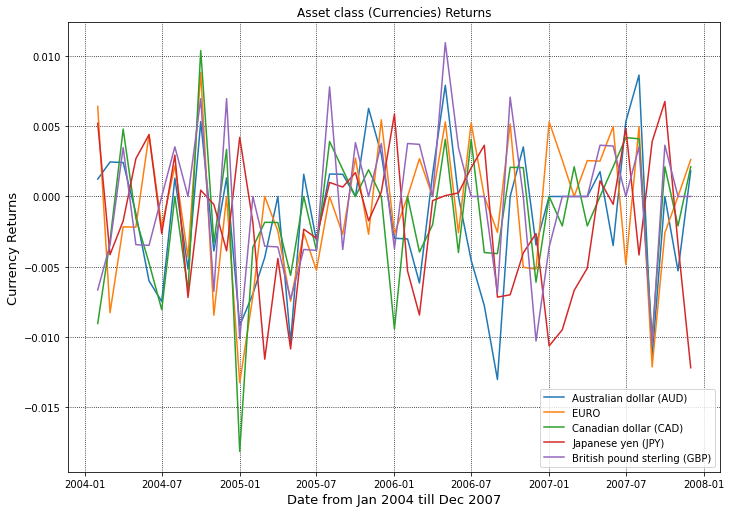

In [192]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2.index, currency_df_2.AUD_R, label='Australian dollar (AUD)')
plt.plot(currency_df_2.index, currency_df_2.EURO_R, label='EURO')
plt.plot(currency_df_2.index, currency_df_2.CAD_R, label='Canadian dollar (CAD)')
plt.plot(currency_df_2.index, currency_df_2.JPY_R, label='Japanese yen (JPY)')
plt.plot(currency_df_2.index, currency_df_2.GBP_R, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Currency Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

In [193]:
# Adding up all the returns of all asset classes for all currencies (AUD, EURO, CAD, JPY, and GBP)

In [194]:
currency_df_2['Portfolio_R'] = currency_df_2['AUD_R'] + currency_df_2['EURO_R'] + currency_df_2['CAD_R'] + currency_df_2['JPY_R'] + currency_df_2['GBP_R']

In [195]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [196]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
currency_df_2['Portfolio_Value'] = ((currency_df_2['Portfolio_R'] + 1).cumprod())*1000

In [197]:
currency_df_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R','Portfolio_R', 'Portfolio_Value']]

AUD_R    EURO_R     CAD_R     JPY_R     GBP_R  Portfolio_R  \
Date                                                                        
2004-02-01  0.001237  0.006413 -0.009051  0.005217 -0.006662    -0.002845   
2004-03-01  0.002457 -0.008281 -0.003153 -0.004148 -0.003432    -0.016557   
2004-04-01  0.002422 -0.002161  0.004802 -0.001748  0.003485     0.006799   
2004-05-01 -0.001194 -0.002185 -0.001565  0.002696 -0.003432    -0.005679   
2004-06-01 -0.006011  0.004420 -0.004730  0.004402 -0.003485    -0.005404   
2004-07-01 -0.007479 -0.002161 -0.008064 -0.002639  0.000000    -0.020344   
2004-08-01  0.001304  0.002185  0.000000  0.002944  0.003539     0.009973   
2004-09-01 -0.005176 -0.004323 -0.006710 -0.007191  0.000000    -0.023399   
2004-10-01  0.005339  0.008839  0.010397  0.000449  0.006969     0.031994   
2004-11-01 -0.003882 -0.008459 -0.003302 -0.000569 -0.006761    -0.022974   
2004-12-01  0.001324  0.000000  0.003355 -0.003874  0.006969     0.007774   
2005-01-01 -0.009199 -0.013259 -0.018161  0.004212 -0.010142    -0.046548   
2005-02-01 -0.006948 -0.007109 -0.003615 -0.001848  0.000000    -0.019520   
2005-03-01 -0.004347  0.000000 -0.001839 -0.011590 -0.003539    -0.021315   
2005-04-01  0.000000 -0.002458 -0.001856 -0.004413 -0.003595    -0.012322   
2005-05-01 -0.010409 -0.007469 -0.005616 -0.010866 -0.007306    -0.041667   
2005-06-01  0.001584 -0.002588  0.000000 -0.002329 -0.003775    -0.007108   
2005-07-01 -0.003139 -0.005245 -0.003847 -0.002980 -0.003839    -0.019050   
2005-08-01  0.001599  0.000000  0.003919  0.001001  0.007810     0.014330   
2005-09-01  0.001584 -0.002694  0.001924  0.000671 -0.003775    -0.002290   
2005-10-01  0.000000  0.002732  0.000000  0.001702  0.003839     0.008273   
2005-11-01  0.006279 -0.002694  0.001906 -0.001729  0.000000     0.003762   
2005-12-01  0.003027  0.005463  0.000000  0.000324  0.003775     0.012590   
2006-01-01 -0.002974 -0.002658 -0.009445  0.005869 -0.003713    -0.012920   
2006-02-01 -0.003027  0.000000  0.000000 -0.005314  0.003775    -0.004566   
2006-03-01 -0.006165  0.002694 -0.003956 -0.008443  0.003713    -0.012157   
2006-04-01  0.001599  0.000000 -0.002016 -0.000295  0.000000    -0.000712   
2006-05-01  0.007922  0.005316  0.004071  0.000063  0.010959     0.028331   
2006-06-01  0.000000 -0.002588 -0.003994  0.000253  0.003485    -0.002844   
2006-07-01 -0.004541  0.005245  0.004071  0.002042  0.000000     0.006818   
2006-08-01 -0.007776  0.000000 -0.003994  0.003649  0.000000    -0.008121   
2006-09-01 -0.013040 -0.002554 -0.004071 -0.007171 -0.006863    -0.033701   
2006-10-01  0.000000  0.005176  0.002076 -0.007004  0.007078     0.007325   
2006-11-01  0.003532 -0.005043  0.002056 -0.004020  0.000000    -0.003476   
2006-12-01 -0.003460 -0.005176 -0.006107 -0.002644 -0.010295    -0.027681   
2007-01-01  0.000000  0.005316  0.000000 -0.010643 -0.003595    -0.008923   
2007-02-01  0.000000  0.002588 -0.002097 -0.009498  0.000000    -0.009007   
2007-03-01  0.000000  0.000000  0.002118 -0.006695  0.000000    -0.004577   
2007-04-01  0.000000  0.002554 -0.002097 -0.005105  0.000000    -0.004647   
2007-05-01  0.001766  0.002521  0.000000  0.001116  0.003653     0.009056   
2007-06-01 -0.003495  0.004979  0.002118 -0.000555  0.003595     0.006642   
2007-07-01  0.005353 -0.004856  0.004194  0.004849  0.000000     0.009540   
2007-08-01  0.008649  0.004979  0.004111 -0.004168  0.003539     0.017110   
2007-09-01 -0.011521 -0.012140 -0.010081  0.003911 -0.010454    -0.040285   
2007-10-01  0.000000 -0.002588  0.002118  0.006769  0.003653     0.009952   
2007-11-01 -0.005298  0.000000 -0.002097 -0.003390  0.000000    -0.010784   
2007-12-01  0.001823  0.002622  0.002118 -0.012203  0.000000    -0.005640   

            Portfolio_Value  
Date                         
2004-02-01       997.155003  
2004-03-01       980.645191  
2004-04-01       987.312426  
2004-05-01       981.705014  
2004-06-01       976.399619  
2004-07-01       956.535589  
2

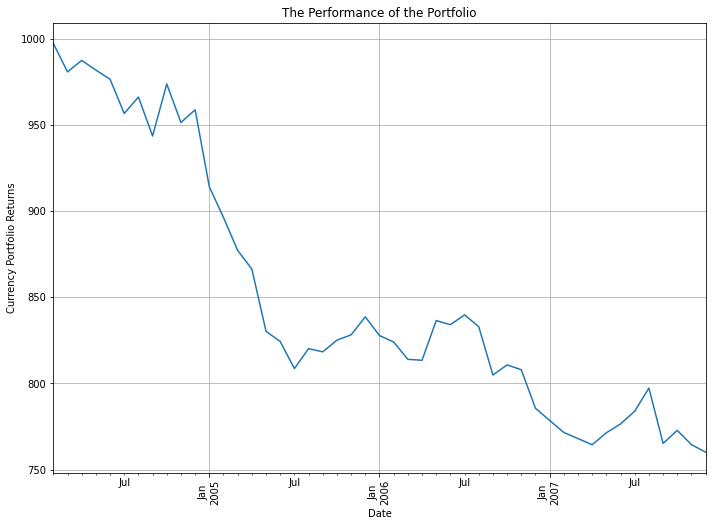

In [198]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2004 till Dec 2007')
plt.ylabel('Currency Portfolio Returns')
currency_df_2['Portfolio_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [199]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
# (currency_df_2.Portfolio_Value.max() - currency_df_2.Portfolio_Value.min()) / currency_df_2.Portfolio_Value.max()
print("The Maximum Drawdown (MDD) of the Portfolio is {:.2f} %".format((currency_df_2.Portfolio_Value.max() - currency_df_2.Portfolio_Value.min()) / currency_df_2.Portfolio_Value.max()
))

The Maximum Drawdown (MDD) of the Portfolio is 0.24 %


In [200]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (currency_df_2['Portfolio_Value'][-1] / currency_df_2['Portfolio_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f} %".format(cumulative_return))

The Cumulative Return of the Portfolio is -23.77 %


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [201]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
currency_df_2['Monthly_Return'] = currency_df_2['Portfolio_Value'].pct_change(1)

In [202]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = currency_df_2['Monthly_Return'].mean() / currency_df_2['Monthly_Return'].std()
Sharpe_Ratio

-0.3362387210584859

In [203]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

-2.305136534857572

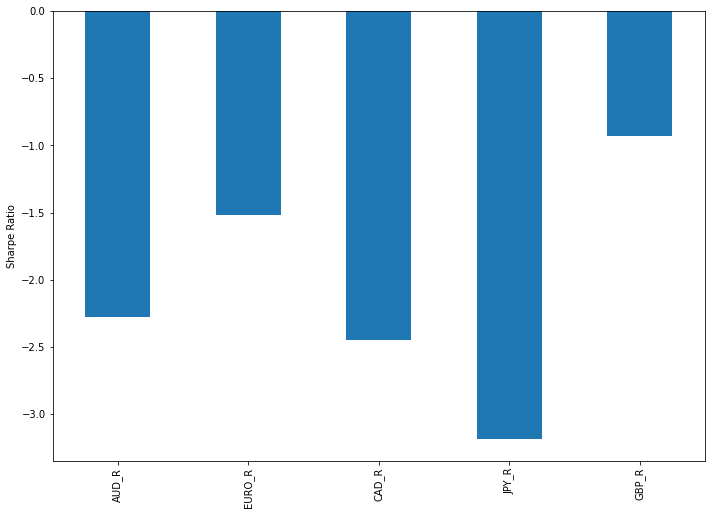

In [204]:
# Calcualte the Sharpe Ratio for currency portfolio
def currency_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = currency_df_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sharpes = currency_df_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
currency_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

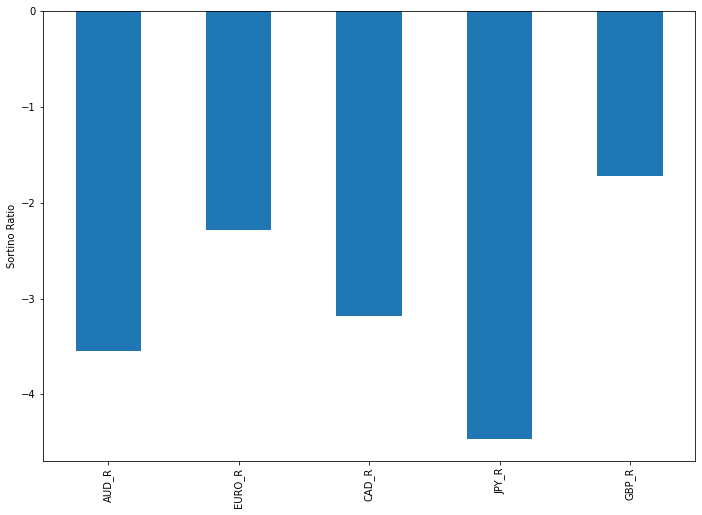

In [205]:
# Calcualte the Sortino Ratio for currency portfolio
def currency_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = currency_df_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sortinos = currency_df_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
currency_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

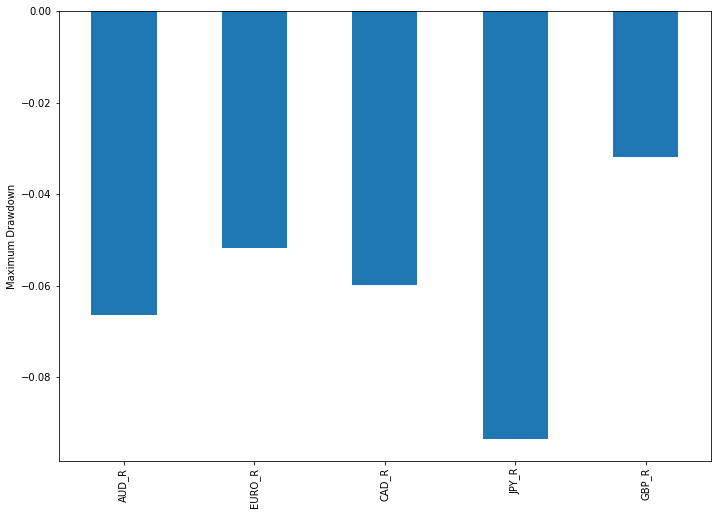

In [206]:
# Calcualte the Maximum Drawdown (MDD) for currency portfolio
def currency_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = currency_df_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_max_drawdown = currency_df_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
currency_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 3.36 %.
- Maximum Drawdown 0.24 %.
- Cumulative return of the o=portfolio -23.77 %
- Sharpe Ratio -3.36%.

In [207]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import datetime
from datetime import datetime

In [208]:
# Dataset Industry Portfolio contains the monthly weighted average returns of industry portfolio
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
industry_portfolio_df = pd.read_csv('Industry_Portfolio_1999_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(industry_portfolio_df.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
industry_portfolio_df.head()

(264, 11)


Date  NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth   Utils  \
0  1-Jan-99  -3.41   5.43   0.56  -5.51  15.09   8.79   2.36   0.24  -6.26   
1  1-Feb-99  -3.78  -4.31  -1.95  -3.17 -11.46  -2.92  -1.50   0.22  -3.78   
2  1-Mar-99  -1.96  -0.84   4.75  15.42   8.51  -0.66   2.79   2.55  -1.69   
3  1-Apr-99   3.76  10.33   9.27  15.91   2.36   8.33   0.51  -5.53   7.18   
4  1-May-99   1.41  -5.54  -3.17  -3.13  -0.67   1.03  -2.88  -2.05   6.72   

   Other  
0   1.11  
1  -0.01  
2   2.41  
3   6.77  
4  -3.52

In [209]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
industry_portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    264 non-null    object 
 1   NoDur   264 non-null    float64
 2   Durbl   264 non-null    float64
 3   Manuf   264 non-null    float64
 4   Enrgy   264 non-null    float64
 5   HiTec   264 non-null    float64
 6   Telcm   264 non-null    float64
 7   Shops   264 non-null    float64
 8   Hlth    264 non-null    float64
 9   Utils   264 non-null    float64
 10  Other   264 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.8+ KB


In [210]:
# Use pandas.to_datetime() function to convert argument to datetime
industry_portfolio_df['Date'] = pd.to_datetime(industry_portfolio_df.Date)

In [211]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
industry_portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    264 non-null    datetime64[ns]
 1   NoDur   264 non-null    float64       
 2   Durbl   264 non-null    float64       
 3   Manuf   264 non-null    float64       
 4   Enrgy   264 non-null    float64       
 5   HiTec   264 non-null    float64       
 6   Telcm   264 non-null    float64       
 7   Shops   264 non-null    float64       
 8   Hlth    264 non-null    float64       
 9   Utils   264 non-null    float64       
 10  Other   264 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 22.8 KB


In [212]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
industry_portfolio_df.set_index('Date',inplace=True)

In [213]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
industry_portfolio_df.isnull().any()

NoDur    False
Durbl    False
Manuf    False
Enrgy    False
HiTec    False
Telcm    False
Shops    False
Hlth     False
Utils    False
Other    False
dtype: bool

In [214]:
industry_portfolio_df[['NoDur','Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth ','Utils','Other']]

NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth   Utils  \
Date                                                                        
1999-01-01  -3.41   5.43   0.56  -5.51  15.09   8.79   2.36   0.24  -6.26   
1999-02-01  -3.78  -4.31  -1.95  -3.17 -11.46  -2.92  -1.50   0.22  -3.78   
1999-03-01  -1.96  -0.84   4.75  15.42   8.51  -0.66   2.79   2.55  -1.69   
1999-04-01   3.76  10.33   9.27  15.91   2.36   8.33   0.51  -5.53   7.18   
1999-05-01   1.41  -5.54  -3.17  -3.13  -0.67   1.03  -2.88  -2.05   6.72   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2020-08-01   4.43  40.86   6.27  -1.14  10.60   5.45   8.13   2.77  -2.25   
2020-09-01  -2.06  -9.02  -0.01 -14.94  -5.18  -2.20  -3.83  -1.51  -0.27   
2020-10-01  -2.61  -3.17  -0.77  -4.53  -1.88  -3.90  -2.53  -4.29   4.49   
2020-11-01  10.02  33.99  13.87  28.60  11.02  14.44   8.39   9.63   2.63   
2020-12-01   4.90  15.43   2.53   5.75   5.00   5.29   1.49   4.72   0.63   

            Other  
Date               
1999-01-01   1.11  
1999-02-01  -0.01  
1999-03-01   2.41  
1999-04-01   6.77  
1999-05-01  -3.52  
...           ...  
2020-08-01   7.20  
2020-09-01  -2.92  
2020-10-01  -2.03  
2020-11-01  15.69  
2020-12-01   5.21  

[264 rows x 10 columns]

In [215]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
industry_portfolio_df = industry_portfolio_df.rename(columns={'Hlth ':'Hlth'})

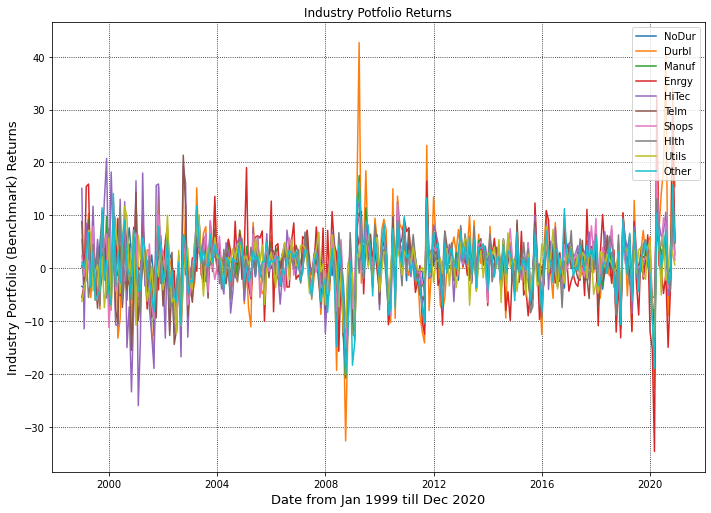

In [216]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(industry_portfolio_df.index, industry_portfolio_df.NoDur, label='NoDur')
plt.plot(industry_portfolio_df.index, industry_portfolio_df.Durbl, label='Durbl')
plt.plot(industry_portfolio_df.index, industry_portfolio_df.Manuf, label='Manuf')
plt.plot(industry_portfolio_df.index, industry_portfolio_df.Enrgy, label='Enrgy')
plt.plot(industry_portfolio_df.index, industry_portfolio_df.HiTec, label='HiTec')
plt.plot(industry_portfolio_df.index, industry_portfolio_df.Telcm, label='Telm')
plt.plot(industry_portfolio_df.index, industry_portfolio_df.Shops, label='Shops')
plt.plot(industry_portfolio_df.index, industry_portfolio_df.Hlth, label='Hlth')
plt.plot(industry_portfolio_df.index, industry_portfolio_df.Utils, label='Utils')
plt.plot(industry_portfolio_df.index,industry_portfolio_df.Other, label='Other')
plt.title('Industry Potfolio Returns')
plt.xlabel('Date from Jan 1999 till Dec 2020', fontsize=13)
plt.ylabel('Industry Portfolio (Benchmark) Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [217]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import time
import datetime
from datetime import datetime

In [218]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2000_2020 = pd.read_csv('Bond_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2000_2020.head()

(252, 7)


Date  Germany  Australia      US      UK  Canada   Japan
0  1/1/2000    98.71     102.11   95.28  100.23   92.80   99.87
1  2/1/2000    99.07     106.07  100.59  102.33   95.62   99.70
2  3/1/2000   101.07     108.00  103.66  103.86   96.91  100.86
3  4/1/2000   100.46     107.28  102.28  104.06   95.09  100.13
4  5/1/2000   100.53     109.13  101.53  104.33   96.27  100.59

In [219]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Germany    252 non-null    float64
 2   Australia  252 non-null    float64
 3   US         252 non-null    float64
 4   UK         252 non-null    float64
 5   Canada     252 non-null    float64
 6   Japan      252 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [220]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2000_2020['Date'] = pd.to_datetime(bond_df_2000_2020.Date)

In [221]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Germany    252 non-null    float64       
 2   Australia  252 non-null    float64       
 3   US         252 non-null    float64       
 4   UK         252 non-null    float64       
 5   Canada     252 non-null    float64       
 6   Japan      252 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [222]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2000_2020.set_index('Date',inplace=True)

In [223]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
bond_df_2000_2020.isnull().any()

Germany      False
Australia    False
US           False
UK           False
Canada       False
Japan        False
dtype: bool

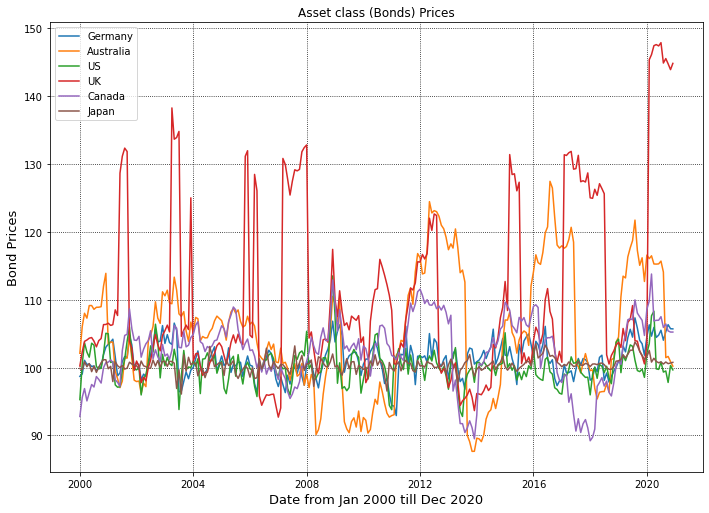

In [224]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Germany, label='Germany')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Australia, label='Australia')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.US, label='US')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.UK, label='UK')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Canada, label='Canada')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Japan, label='Japan')
plt.title('Asset class (Bonds) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Bond Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [225]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2000_2020 = bond_df_2000_2020[['Germany','Australia','US','UK','Canada','Japan']].pct_change()
bond_df_2000_2020

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-01-01       NaN        NaN       NaN       NaN       NaN       NaN
2000-02-01  0.003647   0.038782  0.055730  0.020952  0.030388 -0.001702
2000-03-01  0.020188   0.018196  0.030520  0.014952  0.013491  0.011635
2000-04-01 -0.006035  -0.006667 -0.013313  0.001926 -0.018780 -0.007238
2000-05-01  0.000697   0.017245 -0.007333  0.002595  0.012409  0.004594
...              ...        ...       ...       ...       ...       ...
2020-08-01 -0.013934  -0.013918 -0.014875 -0.020291 -0.014791 -0.003074
2020-09-01  0.012016  -0.110546  0.001611  0.004556  0.004815  0.002984
2020-10-01  0.009878   0.001774 -0.016985 -0.005292 -0.009585 -0.002380
2020-11-01 -0.005643  -0.007477  0.025560 -0.005942 -0.001613  0.000895
2020-12-01 -0.000189  -0.006642 -0.006480  0.006394  0.000000  0.000993

[252 rows x 6 columns]

In [226]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2000_2020.dropna(axis=0, inplace=True)
bond_df_2000_2020

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-02-01  0.003647   0.038782  0.055730  0.020952  0.030388 -0.001702
2000-03-01  0.020188   0.018196  0.030520  0.014952  0.013491  0.011635
2000-04-01 -0.006035  -0.006667 -0.013313  0.001926 -0.018780 -0.007238
2000-05-01  0.000697   0.017245 -0.007333  0.002595  0.012409  0.004594
2000-06-01 -0.003680   0.000092  0.020290  0.000863  0.012880 -0.011830
...              ...        ...       ...       ...       ...       ...
2020-08-01 -0.013934  -0.013918 -0.014875 -0.020291 -0.014791 -0.003074
2020-09-01  0.012016  -0.110546  0.001611  0.004556  0.004815  0.002984
2020-10-01  0.009878   0.001774 -0.016985 -0.005292 -0.009585 -0.002380
2020-11-01 -0.005643  -0.007477  0.025560 -0.005942 -0.001613  0.000895
2020-12-01 -0.000189  -0.006642 -0.006480  0.006394  0.000000  0.000993

[251 rows x 6 columns]

In [227]:
print('There are {} rows in the DataFrame'.format(bond_df_2000_2020.shape[0]))

There are 251 rows in the DataFrame


In [228]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
bond_df_2000_2020_2 = bond_df_2000_2020.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [229]:
vol_bond_df_2000_2020 = bond_df_2000_2020

In [230]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_bond_df_2000_2020['Germany_Vol'] = vol_bond_df_2000_2020['Germany'].rolling(213).std() * math.sqrt(213)
vol_bond_df_2000_2020['Australia_Vol'] = vol_bond_df_2000_2020['Australia'].rolling(213).std() * math.sqrt(213)
vol_bond_df_2000_2020['US_Vol'] = vol_bond_df_2000_2020['US'].rolling(213).std() * math.sqrt(213)
vol_bond_df_2000_2020['UK_Vol'] = vol_bond_df_2000_2020['UK'].rolling(213).std() * math.sqrt(213)
vol_bond_df_2000_2020['Canada_Vol'] = vol_bond_df_2000_2020['Canada'].rolling(213).std() * math.sqrt(213)
vol_bond_df_2000_2020['Japan_Vol'] = vol_bond_df_2000_2020['Japan'].rolling(213).std() * math.sqrt(213)

In [231]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_bond_df_2000_2020.dropna(axis=0, inplace=True)

In [232]:
vol_bond_df_2000_2020[['Germany_Vol','Australia_Vol','US_Vol','UK_Vol','Canada_Vol','Japan_Vol']]

Germany_Vol  Australia_Vol    US_Vol    UK_Vol  Canada_Vol  \
Date                                                                     
2017-10-01     0.293584       0.439694  0.363623  1.012663    0.290447   
2017-11-01     0.293570       0.438236  0.359383  1.012522    0.288933   
2017-12-01     0.292930       0.438085  0.358090  1.012481    0.288917   
2018-01-01     0.293991       0.438177  0.358825  1.012981    0.289059   
2018-02-01     0.294006       0.437840  0.360105  1.012988    0.288847   
2018-03-01     0.294435       0.438693  0.359698  1.013013    0.288870   
2018-04-01     0.294512       0.438957  0.360062  1.013031    0.297065   
2018-05-01     0.295173       0.439073  0.359338  1.013021    0.296704   
2018-06-01     0.295143       0.439074  0.359328  1.013044    0.296753   
2018-07-01     0.297418       0.439074  0.359461  1.013086    0.296977   
2018-08-01     0.297026       0.438346  0.358971  1.030994    0.296174   
2018-09-01     0.297155       0.438177  0.358162  1.031109    0.296576   
2018-10-01     0.297254       0.431325  0.358263  1.031162    0.296624   
2018-11-01     0.297330       0.431320  0.357589  1.031158    0.297270   
2018-12-01     0.297365       0.431950  0.358624  1.031175    0.298410   
2019-01-01     0.296445       0.429958  0.356973  1.031014    0.297390   
2019-02-01     0.295142       0.433443  0.360180  1.031013    0.297417   
2019-03-01     0.296176       0.434017  0.361095  1.013031    0.298594   
2019-04-01     0.295832       0.433944  0.360370  1.013038    0.294152   
2019-05-01     0.296456       0.433443  0.360137  1.013309    0.294023   
2019-06-01     0.296668       0.433564  0.359420  1.013301    0.294023   
2019-07-01     0.295077       0.432582  0.358857  0.990510    0.291863   
2019-08-01     0.295954       0.432056  0.357285  0.991680    0.291853   
2019-09-01     0.294470       0.432494  0.356994  0.991101    0.291967   
2019-10-01     0.294886       0.432943  0.356996  0.991172    0.292015   
2019-11-01     0.294900       0.433025  0.356997  0.991158    0.292011   
2019-12-01     0.294545       0.433700  0.354873  0.990915    0.291266   
2020-01-01     0.295607       0.434729  0.355796  0.991231    0.293302   
2020-02-01     0.296032       0.434715  0.356014  1.070247    0.293422   
2020-03-01     0.296001       0.429296  0.357733  1.070136    0.295545   
2020-04-01     0.295868       0.429392  0.356972  1.070123    0.301534   
2020-05-01     0.295877       0.429224  0.365478  1.070039    0.298918   
2020-06-01     0.295067       0.427927  0.363264  1.069955    0.298651   
2020-07-01     0.294573       0.427335  0.362723  1.069799    0.298504   
2020-08-01     0.294914       0.427513  0.359096  1.070000    0.298792   
2020-09-01     0.294338       0.439610  0.357384  1.069843    0.297765   
2020-10-01     0.293427       0.439580  0.357408  1.069882    0.297444   
2020-11-01     0.293230       0.439581  0.358103  1.069921    0.297439   
2020-12-01     0.293010       0.439312  0.358045  1.069841    0.297328   

            Japan_Vol  
Date                   
2017-10-01   0.187159  
2017-11-01   0.187169  
2017-12-01   0.186816  
2018-01-01   0.186704  
2018-02-01   0.186683  
2018-03-01   0.186299  
2018-04-01   0.186124  
2018-05-01   0.185894  
2018-06-01   0.185746  
2018-07-01   0.185640  
2018-08-01   0.185648  
2018-09-01   0.185661  
2018-10-01   0.185196  
2018-11-01   0.185204  
2018-12-01   0.183997  
2019-01-01   0.181545  
2019-02-01   0.181453  
2019-03-01   0.181547  
2019-04-01   0.181582  
2019-05-01   0.181574  
2019-06-01   0.181660  
2019-07-01   0.181454  
2019-08-01   0.181810  
2019-09-01   0.181886  
2019-10-01   0.182063  
2019-11-01   0.182106  
2019-12-01   0.181822  
2020-01-01   0.181732  
2020-02-01   0.181934  
2020-03-01   0.182700  
2020-04-01   0.182781  
2020-05-01   0.182444  
2020-06-01   0.182233  
2020-07-01   0.182060  
2020-08-01   0.181823  
2020-09-01   0.181646  
2020-10-01   0.181663  
2020-11-01   0.181513  
2020-12-01   0.18

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [233]:
# Use pandas.DataFrame.describe() function to generate descriptive statistics (Arithmetic mean)
vol_bond_df_2000_2020[['Germany_Vol','Australia_Vol','US_Vol','UK_Vol','Canada_Vol','Japan_Vol']].describe()

Germany_Vol  Australia_Vol     US_Vol     UK_Vol  Canada_Vol  Japan_Vol
count    39.000000      39.000000  39.000000  39.000000   39.000000  39.000000
mean      0.295266       0.434651   0.358916   1.028377    0.294945   0.183444
std       0.001293       0.003978   0.002175   0.029082    0.003476   0.002129
min       0.292930       0.427335   0.354873   0.990510    0.288847   0.181363
25%       0.294452       0.432003   0.357396   1.012822    0.291989   0.181662
50%       0.295142       0.433944   0.358825   1.013301    0.296576   0.182106
75%       0.296104       0.438520   0.359880   1.069820    0.297428   0.185654
max       0.297418       0.439694   0.365478   1.070247    0.301534   0.187169

In [234]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes (I will exclude UK bond)
Avg_vol_bond_2000_2020 = (0.295266+0.434651+0.358916+1.028377+0.294945+0.183444) / 6
Avg_vol_bond_2000_2020

0.4325998333333334

In [235]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
bond_2000_2020_target_vol = 0.4325998333333334 / 6
bond_2000_2020_target_vol

0.07209997222222224

In [236]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
portfolio_bond_df_2000_2020 = bond_df_2000_2020

In [237]:
portfolio_bond_df_2000_2020['Germany_Alloc'] = bond_2000_2020_target_vol / vol_bond_df_2000_2020['Germany_Vol'] 
portfolio_bond_df_2000_2020['Australia_Alloc'] = bond_2000_2020_target_vol / vol_bond_df_2000_2020['Australia_Vol'] 
portfolio_bond_df_2000_2020['US_Alloc'] = bond_2000_2020_target_vol / vol_bond_df_2000_2020['US_Vol']
portfolio_bond_df_2000_2020['UK_Alloc'] = bond_2000_2020_target_vol / vol_bond_df_2000_2020['UK_Vol']
portfolio_bond_df_2000_2020['Canada_Alloc'] = bond_2000_2020_target_vol / vol_bond_df_2000_2020['Canada_Vol']
portfolio_bond_df_2000_2020['Japan_Alloc'] = bond_2000_2020_target_vol / vol_bond_df_2000_2020['Japan_Vol']

In [238]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
portfolio_bond_df_2000_2020.dropna(axis=0, inplace=True)

In [239]:
portfolio_bond_df_2000_2020[['Germany_Alloc','Australia_Alloc','US_Alloc','UK_Alloc','Canada_Alloc','Japan_Alloc']]

Germany_Alloc  Australia_Alloc  US_Alloc  UK_Alloc  Canada_Alloc  \
Date                                                                           
2017-10-01       0.245585         0.163978  0.198282  0.071198      0.248238   
2017-11-01       0.245597         0.164523  0.200622  0.071208      0.249539   
2017-12-01       0.246134         0.164580  0.201346  0.071211      0.249553   
2018-01-01       0.245245         0.164545  0.200933  0.071176      0.249430   
2018-02-01       0.245233         0.164672  0.200219  0.071176      0.249613   
2018-03-01       0.244876         0.164352  0.200446  0.071174      0.249593   
2018-04-01       0.244811         0.164253  0.200243  0.071173      0.242708   
2018-05-01       0.244264         0.164209  0.200647  0.071173      0.243003   
2018-06-01       0.244288         0.164209  0.200652  0.071172      0.242963   
2018-07-01       0.242419         0.164209  0.200578  0.071169      0.242780   
2018-08-01       0.242739         0.164482  0.200852  0.069933      0.243438   
2018-09-01       0.242634         0.164545  0.201306  0.069925      0.243108   
2018-10-01       0.242554         0.167159  0.201249  0.069921      0.243069   
2018-11-01       0.242491         0.167161  0.201628  0.069921      0.242540   
2018-12-01       0.242463         0.166918  0.201046  0.069920      0.241613   
2019-01-01       0.243215         0.167691  0.201976  0.069931      0.242442   
2019-02-01       0.244289         0.166342  0.200178  0.069931      0.242421   
2019-03-01       0.243437         0.166122  0.199670  0.071173      0.241465   
2019-04-01       0.243719         0.166150  0.200072  0.071172      0.245111   
2019-05-01       0.243206         0.166343  0.200201  0.071153      0.245219   
2019-06-01       0.243033         0.166296  0.200601  0.071154      0.245219   
2019-07-01       0.244343         0.166674  0.200916  0.072791      0.247033   
2019-08-01       0.243619         0.166877  0.201799  0.072705      0.247042   
2019-09-01       0.244847         0.166707  0.201964  0.072747      0.246945   
2019-10-01       0.244501         0.166535  0.201963  0.072742      0.246905   
2019-11-01       0.244490         0.166503  0.201962  0.072743      0.246909   
2019-12-01       0.244784         0.166244  0.203171  0.072761      0.247540   
2020-01-01       0.243905         0.165851  0.202644  0.072738      0.245822   
2020-02-01       0.243555         0.165856  0.202520  0.067368      0.245721   
2020-03-01       0.243580         0.167950  0.201547  0.067375      0.243956   
2020-04-01       0.243689         0.167912  0.201977  0.067375      0.239111   
2020-05-01       0.243682         0.167978  0.197276  0.067381      0.241203   
2020-06-01       0.244351         0.168487  0.198478  0.067386      0.241419   
2020-07-01       0.244761         0.168720  0.198774  0.067396      0.241538   
2020-08-01       0.244478         0.168650  0.200782  0.067383      0.241305   
2020-09-01       0.244956         0.164009  0.201744  0.067393      0.242138   
2020-10-01       0.245717         0.164020  0.201730  0.067391      0.242398   
2020-11-01       0.245882         0.164020  0.201339  0.067388      0.242402   
2020-12-01       0.246067         0.164120  0.201371  0.067393      0.242493   

            Japan_Alloc  
Date                     
2017-10-01     0.385234  
2017-11-01     0.385213  
2017-12-01     0.385941  
2018-01-01     0.386172  
2018-02-01     0.386217  
2018-03-01     0.387012  
2018-04-01     0.387375  
2018-05-01     0.387855  
2018-06-01     0.388165  
2018-07-01     0.388385  
2018-08-01     0.388370  
2018-09-01     0.388342  
2018-10-01     0.389316  
2018-11-01     0.389300  
2018-12-01     0.391854  
2019-01-01     0.397146  
2019-02-01     0.397348  
2019-03-01     0.397143  
2019-04-01     0.397066  
2019-05-01     0.397083  
2019-06-01     0.396894  
2019-07-01     0.397345  
2019-08-01     0.396567  
2019-09-01     0.396402  
2019-10-01     0.396017  
2019-11-01     0.395924  
201

In [240]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (bonds)

In [241]:
portfolio_bond_df_2000_2020['Germany_R'] = portfolio_bond_df_2000_2020['Germany']*portfolio_bond_df_2000_2020['Germany_Alloc']
portfolio_bond_df_2000_2020['Australia_R'] = portfolio_bond_df_2000_2020['Australia'] * portfolio_bond_df_2000_2020['Australia_Alloc']
portfolio_bond_df_2000_2020['US_R'] = portfolio_bond_df_2000_2020['US'] * portfolio_bond_df_2000_2020['US_Alloc']
portfolio_bond_df_2000_2020['UK_R'] = portfolio_bond_df_2000_2020['UK'] * portfolio_bond_df_2000_2020['UK_Alloc']
portfolio_bond_df_2000_2020['Canada_R'] = portfolio_bond_df_2000_2020['Canada'] * portfolio_bond_df_2000_2020['Canada_Alloc']
portfolio_bond_df_2000_2020['Japan_R'] = portfolio_bond_df_2000_2020['Japan'] * portfolio_bond_df_2000_2020['Japan_Alloc']

In [242]:
portfolio_bond_df_2000_2020.head(5)

Germany  Australia        US        UK    Canada     Japan  \
Date                                                                      
2017-10-01  0.009465   0.013910 -0.004228  0.001178  0.014153 -0.000199   
2017-11-01 -0.001382   0.014614 -0.003640 -0.001490  0.006760  0.002791   
2017-12-01 -0.004645  -0.013619  0.000406  0.010524 -0.013212 -0.001193   
2018-01-01 -0.025519  -0.011125 -0.026473 -0.028523 -0.020852 -0.003383   
2018-02-01  0.003057   0.001105  0.031257 -0.000560  0.005828  0.003594   

            Germany_Vol  Australia_Vol    US_Vol    UK_Vol  ...  US_Alloc  \
Date                                                        ...             
2017-10-01     0.293584       0.439694  0.363623  1.012663  ...  0.198282   
2017-11-01     0.293570       0.438236  0.359383  1.012522  ...  0.200622   
2017-12-01     0.292930       0.438085  0.358090  1.012481  ...  0.201346   
2018-01-01     0.293991       0.438177  0.358825  1.012981  ...  0.200933   
2018-02-01     0.294006       0.437840  0.360105  1.012988  ...  0.200219   

            UK_Alloc  Canada_Alloc  Japan_Alloc  Germany_R  Australia_R  \
Date                                                                      
2017-10-01  0.071198      0.248238     0.385234   0.002324     0.002281   
2017-11-01  0.071208      0.249539     0.385213  -0.000339     0.002404   
2017-12-01  0.071211      0.249553     0.385941  -0.001143    -0.002241   
2018-01-01  0.071176      0.249430     0.386172  -0.006258    -0.001831   
2018-02-01  0.071176      0.249613     0.386217   0.000750     0.000182   

                US_R      UK_R  Canada_R   Japan_R  
Date                                                
2017-10-01 -0.000838  0.000084  0.003513 -0.000077  
2017-11-01 -0.000730 -0.000106  0.001687  0.001075  
2017-12-01  0.000082  0.000749 -0.003297 -0.000460  
2018-01-01 -0.005319 -0.002030 -0.005201 -0.001306  
2018-02-01  0.006258 -0.000040  0.001455  0.001388  

[5 rows x 24 columns]

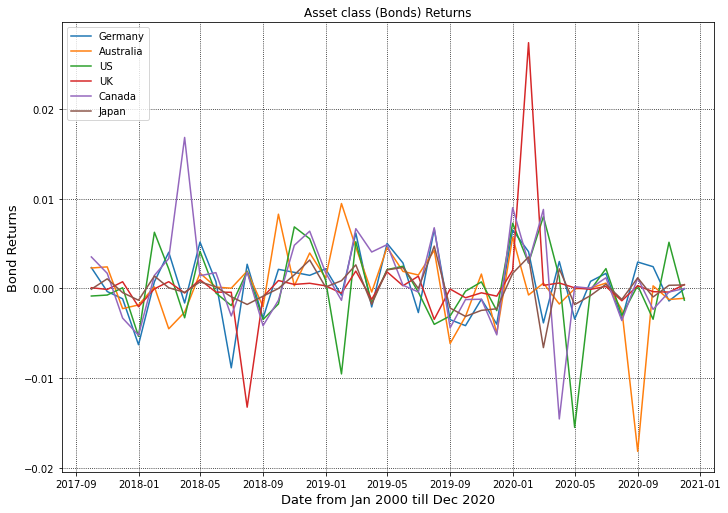

In [243]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(portfolio_bond_df_2000_2020.index, portfolio_bond_df_2000_2020.Germany_R, label='Germany')
plt.plot(portfolio_bond_df_2000_2020.index, portfolio_bond_df_2000_2020.Australia_R, label='Australia')
plt.plot(portfolio_bond_df_2000_2020.index, portfolio_bond_df_2000_2020.US_R, label='US')
plt.plot(portfolio_bond_df_2000_2020.index, portfolio_bond_df_2000_2020.UK_R, label='UK')
plt.plot(portfolio_bond_df_2000_2020.index, portfolio_bond_df_2000_2020.Canada_R, label='Canada')
plt.plot(portfolio_bond_df_2000_2020.index, portfolio_bond_df_2000_2020.Japan_R, label='Japan')
plt.title('Asset class (Bonds) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Bond Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [244]:
# Adding up all the returns of all asset classes for all countries

In [245]:
portfolio_bond_df_2000_2020['Portfolio_R'] = portfolio_bond_df_2000_2020['Germany_R'] + portfolio_bond_df_2000_2020['Australia_R'] + portfolio_bond_df_2000_2020['US_R'] + portfolio_bond_df_2000_2020['UK_R'] + portfolio_bond_df_2000_2020['Canada_R'] + portfolio_bond_df_2000_2020['Japan_R']

In [246]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
portfolio_bond_df_2000_2020['Portfolio_Value'] = ((portfolio_bond_df_2000_2020['Portfolio_R'] + 1).cumprod())*1000

In [247]:
portfolio_bond_df_2000_2020[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R', 'Portfolio_R', 'Portfolio_Value']]

Germany_R  Australia_R      US_R      UK_R  Canada_R   Japan_R  \
Date                                                                         
2017-10-01   0.002324     0.002281 -0.000838  0.000084  0.003513 -0.000077   
2017-11-01  -0.000339     0.002404 -0.000730 -0.000106  0.001687  0.001075   
2017-12-01  -0.001143    -0.002241  0.000082  0.000749 -0.003297 -0.000460   
2018-01-01  -0.006258    -0.001831 -0.005319 -0.002030 -0.005201 -0.001306   
2018-02-01   0.000750     0.000182  0.006258 -0.000040  0.001455  0.001388   
2018-03-01   0.004030    -0.004486  0.002167  0.000758  0.003338  0.000077   
2018-04-01  -0.001615    -0.002643 -0.003262 -0.000502  0.016814 -0.000424   
2018-05-01   0.005161     0.001704  0.004139  0.000971  0.001424  0.000734   
2018-06-01   0.000770     0.000153 -0.000499 -0.000403  0.001764  0.000193   
2018-07-01  -0.008833     0.000034 -0.001902 -0.000422 -0.003056 -0.000926   
2018-08-01   0.002697     0.001926  0.001902 -0.013212  0.001827 -0.001779   
2018-09-01  -0.003302    -0.002023 -0.003456 -0.000933 -0.004142 -0.000855   
2018-10-01   0.002132     0.008270 -0.001717  0.000883 -0.001312  0.000000   
2018-11-01   0.001793     0.000297  0.006857  0.000453  0.004809  0.001522   
2018-12-01   0.001463     0.003952  0.005536  0.000580  0.006379  0.003170   
2019-01-01   0.002188     0.001164  0.000915  0.000298  0.001765  0.000157   
2019-02-01  -0.000750     0.009457 -0.009509 -0.000526 -0.001320  0.000866   
2019-03-01   0.006169     0.004589  0.005211  0.001936  0.006657  0.002629   
2019-04-01  -0.002055    -0.000395 -0.001611 -0.001211  0.004059 -0.001754   
2019-05-01   0.005016     0.004570  0.002101  0.001848  0.004883  0.002075   
2019-06-01   0.002839     0.001902  0.002476  0.000307  0.000367  0.002336   
2019-07-01  -0.002683     0.001502 -0.000408  0.001366 -0.000392  0.000000   
2019-08-01   0.006622     0.004246 -0.003992 -0.003438  0.006762  0.004717   
2019-09-01  -0.003468    -0.006122 -0.003057 -0.000063 -0.004379 -0.002177   
2019-10-01  -0.004137    -0.003111 -0.000304 -0.001029 -0.001234 -0.003108   
2019-11-01  -0.001199     0.001606  0.000731 -0.000483 -0.001195 -0.002436   
2019-12-01  -0.003973    -0.004994 -0.002464 -0.000851 -0.005161 -0.002260   
2020-01-01   0.006516     0.005711  0.007258  0.002040  0.008990  0.001686   
2020-02-01   0.004100    -0.000726  0.002837  0.027362  0.002852  0.003510   
2020-03-01  -0.003827     0.000593  0.008002  0.000348  0.008797 -0.006582   
2020-04-01   0.003004    -0.001730  0.001257  0.000609 -0.014521  0.002191   
2020-05-01  -0.003405    -0.000029 -0.015465  0.000073  0.000203 -0.001793   
2020-06-01   0.000795     0.000044 -0.000159 -0.000091  0.000023 -0.000784   
2020-07-01   0.001682     0.000600  0.002212  0.000220  0.001197  0.000472   
2020-08-01  -0.003406    -0.002347 -0.002987 -0.001367 -0.003569 -0.001219   
2020-09-01   0.002943    -0.018131  0.000325  0.000307  0.001166  0.001185   
2020-10-01   0.002427     0.000291 -0.003426 -0.000357 -0.002323 -0.000945   
2020-11-01  -0.001388    -0.001226  0.005146 -0.000400 -0.000391  0.000355   
2020-12-01  -0.000047    -0.001090 -0.001305  0.000431  0.000000  0.000395   

            Portfolio_R  Portfolio_Value  
Date                                      
2017-10-01     0.007287      1007.287361  
2017-11-01     0.003990      1011.306845  
2017-12-01    -0.006311      1004.924424  
2018-01-01    -0.021946       982.870381  
2018-02-01     0.009993       992.692074  
2018-03-01     0.005883       998.532453  
2018-04-01     0.008368      1006.888257  
2018-05-01     0.014132      1021.118024  
2018-06-01     0.001977      1023.137232  
2018-07-01    -0.015105      1007.683089  
2018-08-01    -0.006638      1000.994061  
2018-09-01    -0.014711       986.268304  
2018-10-01     0.008257       994.411799  
2018-11-01     0.015732      1010.055861  
2018-12-01     0.021080      1031.348334  
2019-01-01     0.006487      1038.038279  
2019-02-01    -0.001783      1036.18797

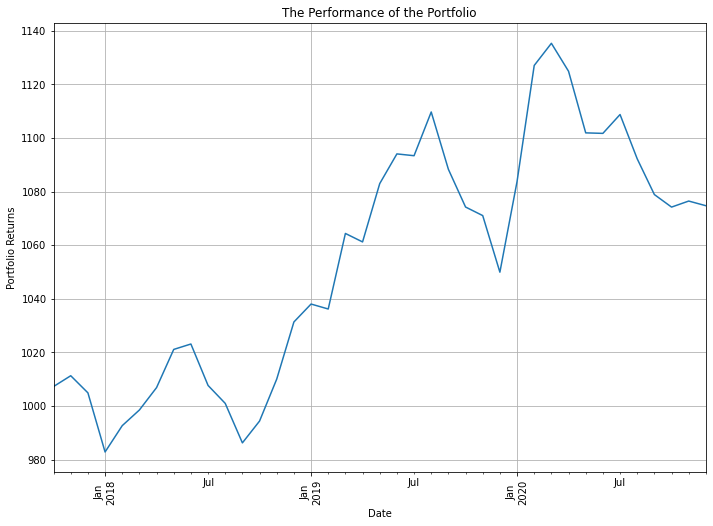

In [248]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
portfolio_bond_df_2000_2020['Portfolio_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [249]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(portfolio_bond_df_2000_2020.Portfolio_Value.max() - portfolio_bond_df_2000_2020.Portfolio_Value.min()) / portfolio_bond_df_2000_2020.Portfolio_Value.max()

0.1342393824373636

In [250]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (portfolio_bond_df_2000_2020['Portfolio_Value'][-1] / portfolio_bond_df_2000_2020['Portfolio_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 6.69%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [251]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
portfolio_bond_df_2000_2020['Monthly_Return'] = portfolio_bond_df_2000_2020['Portfolio_Value'].pct_change(1)

In [252]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = portfolio_bond_df_2000_2020['Monthly_Return'].mean() / portfolio_bond_df_2000_2020['Monthly_Return'].std()
Sharpe_Ratio

0.1220234729414764

In [253]:
portfolio_bond_df_2000_2020.shape[0]

39

In [254]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(39)
Annualized_Sharpe_Ratio

0.7620363442771413

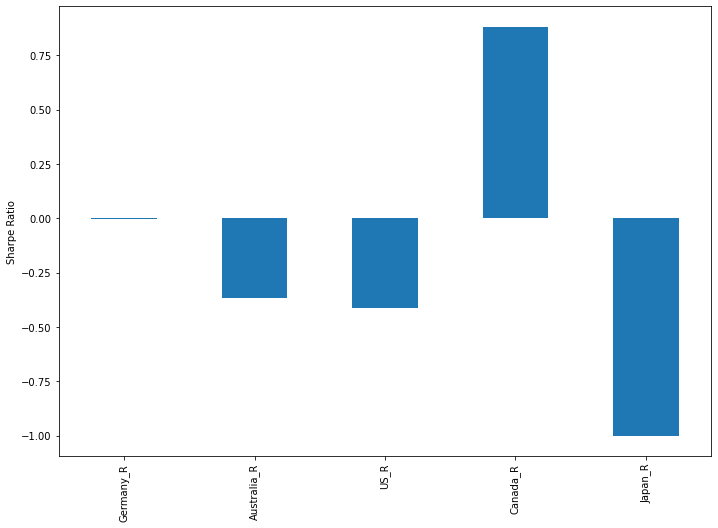

In [255]:
# Calcualte the Sharpe Ratio for bond portfolio
def bond_2000_2020_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = portfolio_bond_df_2000_2020[['Germany_R','Australia_R','US_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_2000_2020_sharpes = portfolio_bond_df_2000_2020[['Germany_R','Australia_R','US_R','Canada_R','Japan_R']].apply(bond_2000_2020_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
bond_2000_2020_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

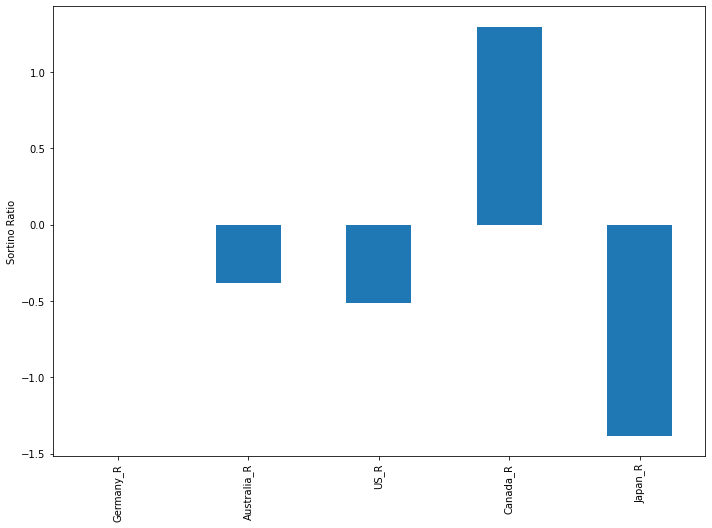

In [256]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_2000_2020_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = portfolio_bond_df_2000_2020[['Germany_R','Australia_R','US_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_2000_2020_sortinos = portfolio_bond_df_2000_2020[['Germany_R','Australia_R','US_R','Canada_R',
                                                       'Japan_R']].apply(bond_2000_2020_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
bond_2000_2020_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

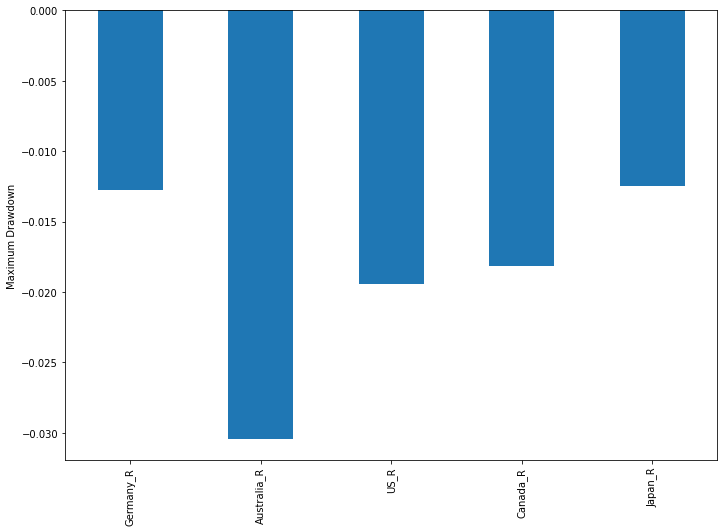

In [257]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def bond_2000_2020_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = portfolio_bond_df_2000_2020[['Germany_R','Australia_R','US_R','Canada_R','Japan_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_2000_2020_max_drawdown = portfolio_bond_df_2000_2020[['Germany_R','Australia_R','US_R','Canada_R','Japan_R']].apply(bond_2000_2020_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
bond_2000_2020_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2020.
- Target volatility 7.2 %.
- Maximum Drawdown 10.9%.
- Cumulative return of the o=portfolio 4.63%
- Sharpe Ratio 11%.

In [258]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import time
import datetime
from datetime import datetime

In [259]:
# Dataset (Equity_2000_2020.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df_2000_2020 = pd.read_csv('Equity_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df_2000_2020.head()

(252, 15)


Date  Australia  Nethelands  Germany   Canada     Hong_Kong  \
0  1/1/2000     3080.2      612.38  6835.60  8481.11  1.553234e+10   
1  2/1/2000     3124.6      664.28  7644.55  9128.99  1.716944e+10   
2  3/1/2000     3133.3      662.29  7599.39  9462.39  1.740654e+10   
3  4/1/2000     3115.8      661.38  7414.68  9347.61  1.551930e+10   
4  5/1/2000     3081.0      655.50  7109.67  9251.99  1.471386e+10   

        France        Belgium            US    Japan     Spain  Sweden   \
0  5.659810e+09  2.806290e+09  1.394460e+09  19539.70  10835.1  1220.23   
1  6.190960e+09  2.746080e+09  1.366420e+09  19959.52  12585.8  1433.08   
2  6.286050e+09  2.777840e+09  1.498580e+09  20337.32  11935.0  1383.66   
3  6.419720e+09  2.813280e+09  1.452430e+09  17973.70  11467.9  1429.61   
4  6.426260e+09  2.849430e+09  1.420600e+09  16332.45  10688.5  1377.15   

        UK   Italy  Singapore  
0  6268.50  112.52    3958.79  
1  6232.56  109.75    3844.90  
2  6540.22  108.78    3907.83  
3  6327.43  103.99    3709.37  
4  6359.35  101.37    3666.83

In [260]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        252 non-null    object 
 1   Australia   252 non-null    float64
 2   Nethelands  252 non-null    float64
 3   Germany     252 non-null    float64
 4   Canada      252 non-null    float64
 5   Hong_Kong   252 non-null    float64
 6   France      252 non-null    float64
 7   Belgium     252 non-null    float64
 8   US          252 non-null    float64
 9   Japan       252 non-null    float64
 10  Spain       252 non-null    float64
 11  Sweden      252 non-null    float64
 12  UK          252 non-null    float64
 13  Italy       252 non-null    float64
 14  Singapore   252 non-null    float64
dtypes: float64(14), object(1)
memory usage: 29.7+ KB


In [261]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df_2000_2020['Date'] = pd.to_datetime(equity_df_2000_2020.Date)

In [262]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        252 non-null    datetime64[ns]
 1   Australia   252 non-null    float64       
 2   Nethelands  252 non-null    float64       
 3   Germany     252 non-null    float64       
 4   Canada      252 non-null    float64       
 5   Hong_Kong   252 non-null    float64       
 6   France      252 non-null    float64       
 7   Belgium     252 non-null    float64       
 8   US          252 non-null    float64       
 9   Japan       252 non-null    float64       
 10  Spain       252 non-null    float64       
 11  Sweden      252 non-null    float64       
 12  UK          252 non-null    float64       
 13  Italy       252 non-null    float64       
 14  Singapore   252 non-null    float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 29.7 KB


In [263]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df_2000_2020.set_index('Date',inplace=True)

In [264]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
equity_df_2000_2020.isnull().any()

Australia     False
Nethelands    False
Germany       False
Canada        False
Hong_Kong     False
France        False
Belgium       False
US            False
Japan         False
Spain         False
Sweden        False
UK            False
Italy         False
Singapore     False
dtype: bool

In [265]:
equity_df_2000_2020[['Australia','Nethelands','Germany','Canada','Hong_Kong','France ','Belgium','US','Japan ',
                     'Spain','Sweden ','UK','Italy','Singapore']]

Australia  Nethelands   Germany    Canada     Hong_Kong  \
Date                                                                  
2000-01-01     3080.2      612.38   6835.60   8481.11  1.553234e+10   
2000-02-01     3124.6      664.28   7644.55   9128.99  1.716944e+10   
2000-03-01     3133.3      662.29   7599.39   9462.39  1.740654e+10   
2000-04-01     3115.8      661.38   7414.68   9347.61  1.551930e+10   
2000-05-01     3081.0      655.50   7109.67   9251.99  1.471386e+10   
...               ...         ...       ...       ...           ...   
2020-08-01     6060.5      549.20  12945.38  16514.44  2.517705e+10   
2020-09-01     5815.9      547.70  12760.73  16121.38  2.345905e+10   
2020-10-01     5927.6      533.88  11556.48  15580.64  2.410742e+10   
2020-11-01     6517.8      606.02  13291.16  17190.25  2.634149e+10   
2020-12-01     6587.1      624.61  13718.78  17433.36  2.723113e+10   

                 France        Belgium            US    Japan     Spain  \
Date                                                                      
2000-01-01  5.659810e+09  2.806290e+09  1.394460e+09  19539.70  10835.1   
2000-02-01  6.190960e+09  2.746080e+09  1.366420e+09  19959.52  12585.8   
2000-03-01  6.286050e+09  2.777840e+09  1.498580e+09  20337.32  11935.0   
2000-04-01  6.419720e+09  2.813280e+09  1.452430e+09  17973.70  11467.9   
2000-05-01  6.426260e+09  2.849430e+09  1.420600e+09  16332.45  10688.5   
...                  ...           ...           ...       ...      ...   
2020-08-01  4.947220e+09  3.332530e+09  3.500310e+09  23139.76   6969.5   
2020-09-01  4.803440e+09  3.235440e+09  3.363000e+09  23185.12   6716.6   
2020-10-01  4.594240e+09  3.043360e+09  3.269960e+09  22977.13   6452.2   
2020-11-01  5.518550e+09  3.667160e+09  3.621630e+09  26433.62   8076.9   
2020-12-01  5.551410e+09  3.621280e+09  3.756070e+09  27444.17   8073.7   

            Sweden        UK   Italy  Singapore  
Date                                             
2000-01-01  1220.23  6268.50  112.52    3958.79  
2000-02-01  1433.08  6232.56  109.75    3844.90  
2000-03-01  1383.66  6540.22  108.78    3907.83  
2000-04-01  1429.61  6327.43  103.99    3709.37  
2000-05-01  1377.15  6359.35  101.37    3666.83  
...             ...      ...     ...        ...  
2020-08-01  1766.33  5963.57  159.63    2037.40  
2020-09-01  1829.41  5866.10  168.48    2009.14  
2020-10-01  1717.62  5577.27  172.88    1624.88  
2020-11-01  1917.54  6266.19  166.27    1464.11  
2020-12-01  1874.74  6460.52  170.23    1484.28  

[252 rows x 14 columns]

In [266]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'France ':'France'})
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'Japan ':'Japan'})
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'Sweden ':'Sweden'})

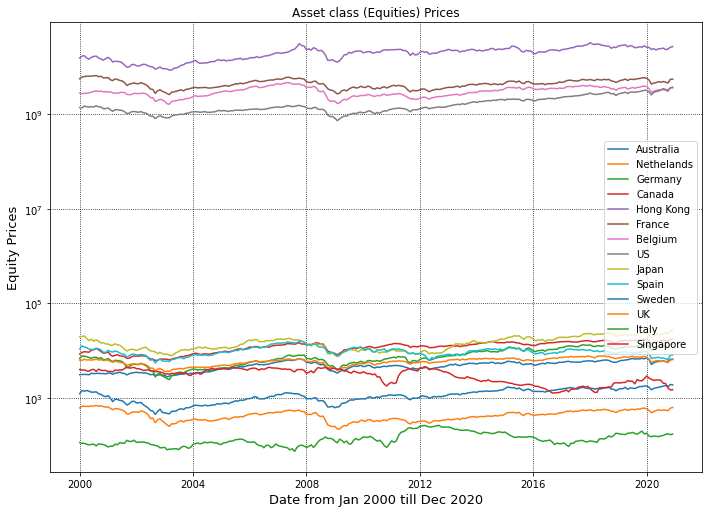

In [270]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Australia, label='Australia')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Nethelands, label='Nethelands')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Germany, label='Germany')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Canada, label='Canada')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.France, label='France')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Belgium, label='Belgium')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.US, label='US')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Japan, label='Japan')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Spain, label='Spain')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Sweden, label='Sweden')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.UK, label='UK')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Italy, label='Italy')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Singapore, label='Singapore')
plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [271]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df_2000_2020 = equity_df_2000_2020[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                       'US','Japan','Spain','Sweden','UK','Italy','Singapore']].pct_change()
equity_df_2000_2020

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-01-01        NaN         NaN       NaN       NaN        NaN       NaN   
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   
...               ...         ...       ...       ...        ...       ...   
2020-08-01   0.022386    0.007170  0.051328  0.021352   0.023651  0.034185   
2020-09-01  -0.040360   -0.002731 -0.014264 -0.023801  -0.068237 -0.029063   
2020-10-01   0.019206   -0.025233 -0.094372 -0.033542   0.027638 -0.043552   
2020-11-01   0.099568    0.135124  0.150105  0.103308   0.092671  0.201189   
2020-12-01   0.010632    0.030676  0.032173  0.014142   0.033773  0.005955   

             Belgium        US     Japan     Spain    Sweden        UK  \
Date                                                                     
2000-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  0.174434 -0.005733   
2000-03-01  0.011566  0.096720  0.018928 -0.051709 -0.034485  0.049363   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  0.033209 -0.032536   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964 -0.036695  0.005045   
...              ...       ...       ...       ...       ...       ...   
2020-08-01  0.018073  0.070065  0.065857  0.013392  0.034545  0.011158   
2020-09-01 -0.029134 -0.039228  0.001960 -0.036287  0.035712 -0.016344   
2020-10-01 -0.059367 -0.027666 -0.008971 -0.039365 -0.061107 -0.049237   
2020-11-01  0.204971  0.107546  0.150432  0.251806  0.116394  0.123523   
2020-12-01 -0.012511  0.037121  0.038230 -0.000396 -0.022320  0.031012   

               Italy  Singapore  
Date                             
2000-01-01       NaN        NaN  
2000-02-01 -0.024618  -0.028769  
2000-03-01 -0.008838   0.016367  
2000-04-01 -0.044034  -0.050785  
2000-05-01 -0.025195  -0.011468  
...              ...        ...  
2020-08-01  0.020391  -0.135779  
2020-09-01  0.055441  -0.013871  
2020-10-01  0.026116  -0.191256  
2020-11-01 -0.038235  -0.098943  
2020-12-01  0.023817   0.013776  

[252 rows x 14 columns]

In [272]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df_2000_2020.dropna(axis=0, inplace=True)
equity_df_2000_2020

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   
2000-06-01   0.074716    0.025385 -0.029743  0.101974   0.097997  0.003156   
...               ...         ...       ...       ...        ...       ...   
2020-08-01   0.022386    0.007170  0.051328  0.021352   0.023651  0.034185   
2020-09-01  -0.040360   -0.002731 -0.014264 -0.023801  -0.068237 -0.029063   
2020-10-01   0.019206   -0.025233 -0.094372 -0.033542   0.027638 -0.043552   
2020-11-01   0.099568    0.135124  0.150105  0.103308   0.092671  0.201189   
2020-12-01   0.010632    0.030676  0.032173  0.014142   0.033773  0.005955   

             Belgium        US     Japan     Spain    Sweden        UK  \
Date                                                                     
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  0.174434 -0.005733   
2000-03-01  0.011566  0.096720  0.018928 -0.051709 -0.034485  0.049363   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  0.033209 -0.032536   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964 -0.036695  0.005045   
2000-06-01  0.036446  0.023934  0.066040 -0.010029 -0.045057 -0.007334   
...              ...       ...       ...       ...       ...       ...   
2020-08-01  0.018073  0.070065  0.065857  0.013392  0.034545  0.011158   
2020-09-01 -0.029134 -0.039228  0.001960 -0.036287  0.035712 -0.016344   
2020-10-01 -0.059367 -0.027666 -0.008971 -0.039365 -0.061107 -0.049237   
2020-11-01  0.204971  0.107546  0.150432  0.251806  0.116394  0.123523   
2020-12-01 -0.012511  0.037121  0.038230 -0.000396 -0.022320  0.031012   

               Italy  Singapore  
Date                             
2000-02-01 -0.024618  -0.028769  
2000-03-01 -0.008838   0.016367  
2000-04-01 -0.044034  -0.050785  
2000-05-01 -0.025195  -0.011468  
2000-06-01  0.013515   0.075008  
...              ...        ...  
2020-08-01  0.020391  -0.135779  
2020-09-01  0.055441  -0.013871  
2020-10-01  0.026116  -0.191256  
2020-11-01 -0.038235  -0.098943  
2020-12-01  0.023817   0.013776  

[251 rows x 14 columns]

In [273]:
print('There are {} rows in the DataFrame'.format(equity_df_2000_2020.shape[0]))

There are 251 rows in the DataFrame


In [274]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
equity_df_2000_2020_2 = equity_df_2000_2020.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [275]:
vol_equity_df_2000_2020 = equity_df_2000_2020

In [276]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_equity_df_2000_2020['Australia_Vol'] = vol_equity_df_2000_2020['Australia'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Nethelands_Vol'] = vol_equity_df_2000_2020['Nethelands'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Germany_Vol'] = vol_equity_df_2000_2020['Germany'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Canada_Vol'] = vol_equity_df_2000_2020['Canada'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Hong_Kong_Vol'] = vol_equity_df_2000_2020['Hong_Kong'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['France_Vol'] = vol_equity_df_2000_2020['France'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Belgium_Vol'] = vol_equity_df_2000_2020['Belgium'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['US_Vol'] = vol_equity_df_2000_2020['US'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Japan_Vol'] = vol_equity_df_2000_2020['Japan'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Spain_Vol'] = vol_equity_df_2000_2020['Spain'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Sweden_Vol'] = vol_equity_df_2000_2020['Sweden'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['UK_Vol'] = vol_equity_df_2000_2020['UK'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Italy_Vol'] = vol_equity_df_2000_2020['Italy'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Singapore_Vol'] = vol_equity_df_2000_2020['Singapore'].rolling(251).std() * math.sqrt(251)

In [277]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_equity_df_2000_2020.dropna(axis=0, inplace=True)

In [278]:
vol_equity_df_2000_2020[['Australia_Vol','Nethelands_Vol','Germany_Vol','Canada_Vol','Hong_Kong_Vol','France_Vol',
                      'Belgium_Vol','US_Vol','Japan_Vol','Spain_Vol','Sweden_Vol','UK_Vol','Italy_Vol','Singapore_Vol']]

Australia_Vol  Nethelands_Vol  Germany_Vol  Canada_Vol  \
Date                                                                 
2020-12-01       0.616103        0.847231     0.953758    0.646975   

            Hong_Kong_Vol  France_Vol  Belgium_Vol    US_Vol  Japan_Vol  \
Date                                                                      
2020-12-01       0.940866    0.820655       0.7774  0.692984   0.883287   

            Spain_Vol  Sweden_Vol    UK_Vol  Italy_Vol  Singapore_Vol  
Date                                                                   
2020-12-01   0.933972    0.863868  0.633582   1.111714       1.083001

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [279]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_equity_df_2000_2020 = (0.616103+0.847231+0.953758+0.646975+0.940866+0.820655+0.7774+0.692984+0.883287+0.933972+0.863868+0.633582+1.111714+1.083001) / 14
Avg_vol_equity_df_2000_2020

0.8432425714285715

In [280]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
equity_2000_2020_target_vol = 0.8432425714285715 / 14
equity_2000_2020_target_vol

0.06023161224489797

In [281]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
portfolio_equity_df_2000_2020 = equity_df_2000_2020

In [282]:
portfolio_equity_df_2000_2020['Australia_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['Australia_Vol'] 
portfolio_equity_df_2000_2020['Nethelands_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['Nethelands_Vol'] 
portfolio_equity_df_2000_2020['Germany_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['Germany_Vol'] 
portfolio_equity_df_2000_2020['Canada_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['Canada_Vol']
portfolio_equity_df_2000_2020['Hong_Kong_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['Hong_Kong_Vol']
portfolio_equity_df_2000_2020['France_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['France_Vol']
portfolio_equity_df_2000_2020['Belgium_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['Belgium_Vol']
portfolio_equity_df_2000_2020['US_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['US_Vol']
portfolio_equity_df_2000_2020['Japan_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['Japan_Vol']
portfolio_equity_df_2000_2020['Spain_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['Spain_Vol']
portfolio_equity_df_2000_2020['Sweden_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['Sweden_Vol']
portfolio_equity_df_2000_2020['UK_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['UK_Vol']
portfolio_equity_df_2000_2020['Italy_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['Italy_Vol']
portfolio_equity_df_2000_2020['Singapore_Alloc'] = equity_2000_2020_target_vol / vol_equity_df_2000_2020['Singapore_Vol']

In [283]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
portfolio_equity_df_2000_2020.dropna(axis=0, inplace=True)

In [284]:
portfolio_equity_df_2000_2020[['Australia_Alloc','Nethelands_Alloc','Germany_Alloc','Canada_Alloc','Hong_Kong_Alloc',
                     'France_Alloc','Belgium_Alloc','US_Alloc','Japan_Alloc','Spain_Alloc','Sweden_Alloc',
                     'UK_Alloc','Italy_Alloc','Singapore_Alloc']]

Australia_Alloc  Nethelands_Alloc  Germany_Alloc  Canada_Alloc  \
Date                                                                         
2020-12-01         0.097762          0.071092       0.063152      0.093097   

            Hong_Kong_Alloc  France_Alloc  Belgium_Alloc  US_Alloc  \
Date                                                                 
2020-12-01         0.064017      0.073395       0.077478  0.086916   

            Japan_Alloc  Spain_Alloc  Sweden_Alloc  UK_Alloc  Italy_Alloc  \
Date                                                                        
2020-12-01      0.06819      0.06449      0.069723  0.095065     0.054179   

            Singapore_Alloc  
Date                         
2020-12-01         0.055615

In [285]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [286]:
equity_df_2000_2020_2['Australia_R'] = equity_df_2000_2020_2['Australia'] * 0.097762
equity_df_2000_2020_2['Nethelands_R'] = equity_df_2000_2020_2['Nethelands'] * 0.071092
equity_df_2000_2020_2['Germany_R'] = equity_df_2000_2020_2['Germany'] * 0.063152
equity_df_2000_2020_2['Canada_R'] = equity_df_2000_2020_2['Canada'] * 0.093097
equity_df_2000_2020_2['Hong_Kong_R'] = equity_df_2000_2020_2['Hong_Kong'] * 0.064017
equity_df_2000_2020_2['France_R'] = equity_df_2000_2020_2['France'] * 0.073395
equity_df_2000_2020_2['Belgium_R'] = equity_df_2000_2020_2['Belgium'] * 0.077478
equity_df_2000_2020_2['US_R'] = equity_df_2000_2020_2['US'] * 0.086916
equity_df_2000_2020_2['Japan_R'] = equity_df_2000_2020_2['Japan'] * 0.06819
equity_df_2000_2020_2['Spain_R'] = equity_df_2000_2020_2['Spain'] * 0.06449
equity_df_2000_2020_2['Sweden_R'] = equity_df_2000_2020_2['Sweden'] * 0.069723
equity_df_2000_2020_2['UK_R'] = equity_df_2000_2020_2['UK'] * 0.095065
equity_df_2000_2020_2['Italy_R'] = equity_df_2000_2020_2['Italy'] * 0.054179
equity_df_2000_2020_2['Singapore_R'] = equity_df_2000_2020_2['Singapore'] * 0.055615

In [287]:
equity_df_2000_2020_2

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   
2000-06-01   0.074716    0.025385 -0.029743  0.101974   0.097997  0.003156   
...               ...         ...       ...       ...        ...       ...   
2020-08-01   0.022386    0.007170  0.051328  0.021352   0.023651  0.034185   
2020-09-01  -0.040360   -0.002731 -0.014264 -0.023801  -0.068237 -0.029063   
2020-10-01   0.019206   -0.025233 -0.094372 -0.033542   0.027638 -0.043552   
2020-11-01   0.099568    0.135124  0.150105  0.103308   0.092671  0.201189   
2020-12-01   0.010632    0.030676  0.032173  0.014142   0.033773  0.005955   

             Belgium        US     Japan     Spain  ...  Hong_Kong_R  \
Date                                                ...                
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  ...     0.006747   
2000-03-01  0.011566  0.096720  0.018928 -0.051709  ...     0.000884   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  ...    -0.006941   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964  ...    -0.003322   
2000-06-01  0.036446  0.023934  0.066040 -0.010029  ...     0.006273   
...              ...       ...       ...       ...  ...          ...   
2020-08-01  0.018073  0.070065  0.065857  0.013392  ...     0.001514   
2020-09-01 -0.029134 -0.039228  0.001960 -0.036287  ...    -0.004368   
2020-10-01 -0.059367 -0.027666 -0.008971 -0.039365  ...     0.001769   
2020-11-01  0.204971  0.107546  0.150432  0.251806  ...     0.005933   
2020-12-01 -0.012511  0.037121  0.038230 -0.000396  ...     0.002162   

            France_R  Belgium_R      US_R   Japan_R   Spain_R  Sweden_R  \
Date                                                                      
2000-02-01  0.006888  -0.001662 -0.001748  0.001465  0.010420  0.012162   
2000-03-01  0.001127   0.000896  0.008407  0.001291 -0.003335 -0.002404   
2000-04-01  0.001561   0.000988 -0.002677 -0.007925 -0.002524  0.002315   
2000-05-01  0.000075   0.000996 -0.001905 -0.006227 -0.004383 -0.002559   
2000-06-01  0.000232   0.002824  0.002080  0.004503 -0.000647 -0.003141   
...              ...        ...       ...       ...       ...       ...   
2020-08-01  0.002509   0.001400  0.006090  0.004491  0.000864  0.002409   
2020-09-01 -0.002133  -0.002257 -0.003410  0.000134 -0.002340  0.002490   
2020-10-01 -0.003197  -0.004600 -0.002405 -0.000612 -0.002539 -0.004261   
2020-11-01  0.014766   0.015881  0.009347  0.010258  0.016239  0.008115   
2020-12-01  0.000437  -0.000969  0.003226  0.002607 -0.000026 -0.001556   

                UK_R   Italy_R  Singapore_R  
Date                                         
2000-02-01 -0.000545 -0.001334    -0.001600  
2000-03-01  0.004693 -0.000479     0.000910  
2000-04-01 -0.003093 -0.002386    -0.002824  
2000-05-01  0.000480 -0.001365    -0.000638  
2000-06-01 -0.000697  0.000732     0.004172  
...              ...       ...          ...  
2020-08-01  0.001061  0.001105    -0.007551  
2020-09-01 -0.001554  0.003004    -0.000771  
2020-10-01 -0.004681  0.001415    -0.010637  
2020-11-01  0.011743 -0.002072    -0.005503  
2020-12-01  0.002948  0.001290     0.000766  

[251 rows x 28 columns]

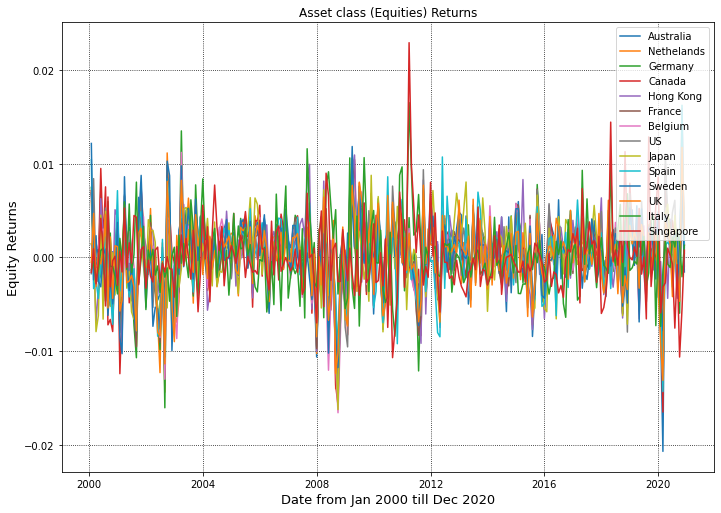

In [288]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Australia_R, label='Australia')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Nethelands_R, label='Nethelands')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Germany_R, label='Germany')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Canada_R, label='Canada')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Hong_Kong_R, label='Hong Kong')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.France_R, label='France')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Belgium_R, label='Belgium')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.US_R, label='US')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Japan_R, label='Japan')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Spain_R, label='Spain')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Sweden_R, label='Sweden')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.UK_R, label='UK')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Italy_R, label='Italy')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Singapore_R, label='Singapore')
plt.title('Asset class (Equities) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [289]:
# Adding up all the returns of all asset classes for all countries

In [290]:
equity_df_2000_2020_2['Portfolio_R'] = equity_df_2000_2020_2['Australia_R'] + equity_df_2000_2020_2['Nethelands_R'] + equity_df_2000_2020_2['Germany_R'] + equity_df_2000_2020_2['Canada_R'] + equity_df_2000_2020_2['Hong_Kong_R'] + equity_df_2000_2020_2['France_R'] + equity_df_2000_2020_2['Belgium_R'] + equity_df_2000_2020_2['US_R'] + equity_df_2000_2020_2['Japan_R'] + equity_df_2000_2020_2['Spain_R'] + equity_df_2000_2020_2['Sweden_R'] + equity_df_2000_2020_2['UK_R'] + equity_df_2000_2020_2['Italy_R'] + equity_df_2000_2020_2['Singapore_R']

In [291]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [292]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
equity_df_2000_2020_2['Portfolio_Value'] = ((equity_df_2000_2020_2['Portfolio_R'] + 1).cumprod())*1000

In [293]:
equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R','Portfolio_R', 'Portfolio_Value']]

Australia_R  Nethelands_R  Germany_R  Canada_R  Hong_Kong_R  \
Date                                                                      
2000-02-01     0.001409      0.006025   0.007474  0.007112     0.006747   
2000-03-01     0.000272     -0.000213  -0.000373  0.003400     0.000884   
2000-04-01    -0.000546     -0.000098  -0.001535 -0.001129    -0.006941   
2000-05-01    -0.001092     -0.000632  -0.002598 -0.000952    -0.003322   
2000-06-01     0.007304      0.001805  -0.001878  0.009493     0.006273   
...                 ...           ...        ...       ...          ...   
2020-08-01     0.002189      0.000510   0.003241  0.001988     0.001514   
2020-09-01    -0.003946     -0.000194  -0.000901 -0.002216    -0.004368   
2020-10-01     0.001878     -0.001794  -0.005960 -0.003123     0.001769   
2020-11-01     0.009734      0.009606   0.009479  0.009618     0.005933   
2020-12-01     0.001039      0.002181   0.002032  0.001317     0.002162   

            France_R  Belgium_R      US_R   Japan_R   Spain_R  Sweden_R  \
Date                                                                      
2000-02-01  0.006888  -0.001662 -0.001748  0.001465  0.010420  0.012162   
2000-03-01  0.001127   0.000896  0.008407  0.001291 -0.003335 -0.002404   
2000-04-01  0.001561   0.000988 -0.002677 -0.007925 -0.002524  0.002315   
2000-05-01  0.000075   0.000996 -0.001905 -0.006227 -0.004383 -0.002559   
2000-06-01  0.000232   0.002824  0.002080  0.004503 -0.000647 -0.003141   
...              ...        ...       ...       ...       ...       ...   
2020-08-01  0.002509   0.001400  0.006090  0.004491  0.000864  0.002409   
2020-09-01 -0.002133  -0.002257 -0.003410  0.000134 -0.002340  0.002490   
2020-10-01 -0.003197  -0.004600 -0.002405 -0.000612 -0.002539 -0.004261   
2020-11-01  0.014766   0.015881  0.009347  0.010258  0.016239  0.008115   
2020-12-01  0.000437  -0.000969  0.003226  0.002607 -0.000026 -0.001556   

                UK_R   Italy_R  Singapore_R  Portfolio_R  Portfolio_Value  
Date                                                                       
2000-02-01 -0.000545 -0.001334    -0.001600     0.052813      1052.813355  
2000-03-01  0.004693 -0.000479     0.000910     0.015076      1068.685373  
2000-04-01 -0.003093 -0.002386    -0.002824    -0.026813      1040.030776  
2000-05-01  0.000480 -0.001365    -0.000638    -0.024122      1014.942760  
2000-06-01 -0.000697  0.000732     0.004172     0.033055      1048.491537  
...              ...       ...          ...          ...              ...  
2020-08-01  0.001061  0.001105    -0.007551     0.021818      1511.608919  
2020-09-01 -0.001554  0.003004    -0.000771    -0.018463      1483.700837  
2020-10-01 -0.004681  0.001415    -0.010637    -0.038744      1426.217028  
2020-11-01  0.011743 -0.002072    -0.005503     0.123145      1601.848455  
2020-12-01  0.002948  0.001290     0.000766     0.017455      1629.808239  

[251 rows x 16 columns]

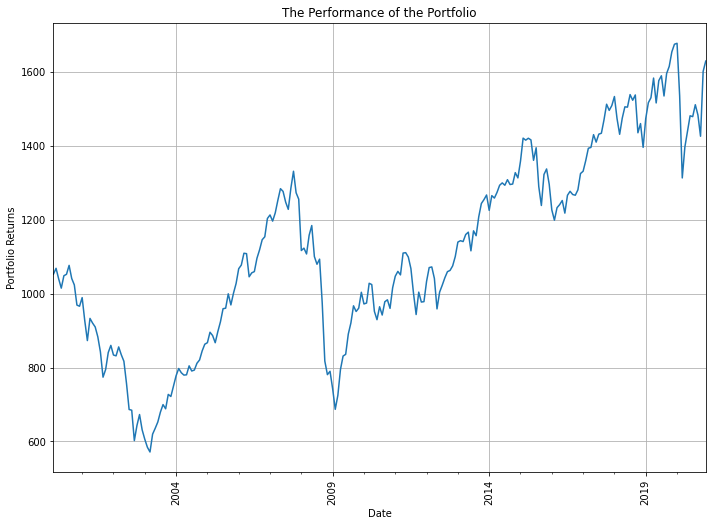

In [294]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns');
equity_df_2000_2020_2['Portfolio_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [295]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(equity_df_2000_2020_2.Portfolio_Value.max() - equity_df_2000_2020_2.Portfolio_Value.min()) / equity_df_2000_2020_2.Portfolio_Value.max()

0.6595385770841752

In [296]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (equity_df_2000_2020_2['Portfolio_Value'][-1] / equity_df_2000_2020_2['Portfolio_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 54.81%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [297]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
equity_df_2000_2020_2['Monthly_Return'] = equity_df_2000_2020_2['Portfolio_Value'].pct_change(1)

In [298]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = equity_df_2000_2020_2['Monthly_Return'].mean() / equity_df_2000_2020_2['Monthly_Return'].std()
Sharpe_Ratio

0.06434917451777755

In [299]:
equity_df_2000_2020_2.shape[0]

251

In [300]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(251)
Annualized_Sharpe_Ratio

1.0194826538695827

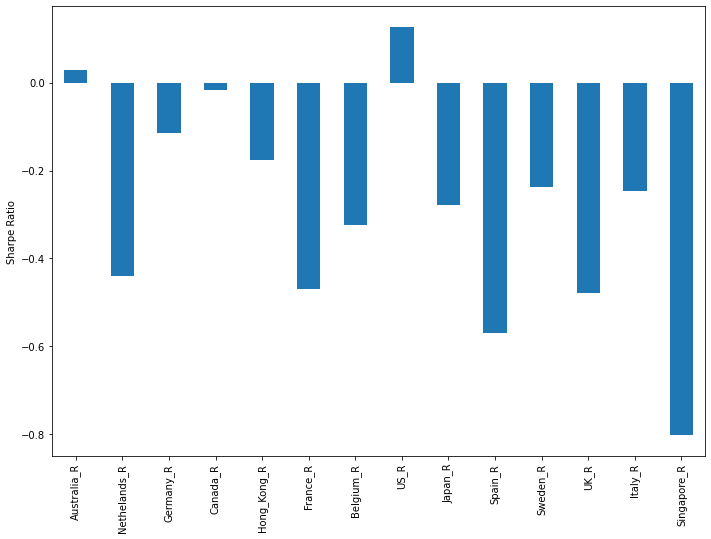

In [301]:
# Calcualte the Sharpe Ratio for equity portfolio
def equity_2000_2020_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_2000_2020_sharpes = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R',
                                                  'Hong_Kong_R','France_R','Belgium_R','US_R','Japan_R',
                                                  'Spain_R','Sweden_R','UK_R','Italy_R',
                                                  'Singapore_R']].apply(equity_2000_2020_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
equity_2000_2020_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

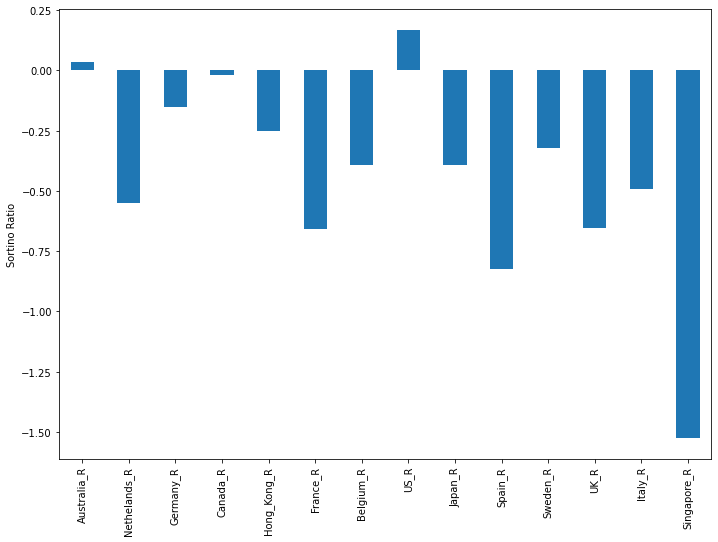

In [302]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_2000_2020_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
                                       'Singapore_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_2000_2020_sortinos = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                                   'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                                   'Italy_R','Singapore_R']].apply(equity_2000_2020_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
equity_2000_2020_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

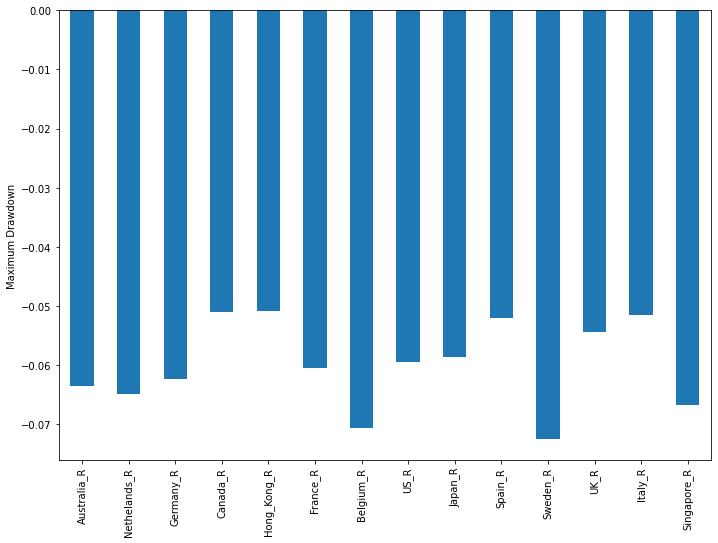

In [303]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def equity_2000_2020_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_2000_2020_max_drawdown = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                                       'Italy_R','Singapore_R']].apply(equity_2000_2020_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
equity_2000_2020_max_drawdown.plot.bar(); 

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2020.
- Target volatility 6.023 %.
- Maximum Drawdown 65.95%.
- Cumulative return of the of portfolio 54.81%
- Sharpe Ratio 6.43%.

In [411]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import time
import datetime
from datetime import datetime

In [412]:
# Dataset (Emerging_Market.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
emerg_market_df_2000_2020 = pd.read_csv('Emerging_market_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(emerg_market_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
emerg_market_df_2000_2020.head()

(252, 12)


Date  Thailand    Chile    Brazil  Argentina  Russia  Turkey  Portugal  \
0  1/1/2000    477.57  1151.42  16388.27     566.28  188.81  167.15  12385.55   
1  2/1/2000    374.32  1106.18  17660.20     631.64  191.49  159.46  14644.27   
2  3/1/2000    400.32  1128.58  17820.37     569.24  254.68  159.20  13127.09   
3  4/1/2000    390.40  1075.01  15537.60     509.51  242.85  192.06  12235.62   
4  5/1/2000    323.29  1124.19  14956.61     464.30  217.05  162.06  11864.13   

   Finland  South Africa  Indonesia  Venezuela  
0  3234.78       7771.66     636.37   90224.09  
1  3239.69       7287.01     576.54   69894.88  
2  3189.06       7388.34     583.28   47772.07  
3  3170.85       6913.24     526.74   48856.03  
4  2901.45       6921.37     454.33   55583.02

In [413]:
# Use pandas.to_datetime() function to convert argument to datetime
emerg_market_df_2000_2020['Date'] = pd.to_datetime(emerg_market_df_2000_2020.Date)

In [414]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
emerg_market_df_2000_2020.set_index('Date',inplace=True)

In [415]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
emerg_market_df_2000_2020.isnull().any()

Thailand        False
Chile           False
Brazil          False
Argentina       False
Russia          False
Turkey          False
Portugal        False
Finland         False
South Africa    False
Indonesia       False
Venezuela       False
dtype: bool

In [416]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
emerg_market_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2000-01-01 to 2020-12-01
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Thailand      252 non-null    float64
 1   Chile         252 non-null    float64
 2   Brazil        252 non-null    float64
 3   Argentina     252 non-null    float64
 4   Russia        252 non-null    float64
 5   Turkey        252 non-null    float64
 6   Portugal      252 non-null    float64
 7   Finland       252 non-null    float64
 8   South Africa  252 non-null    float64
 9   Indonesia     252 non-null    float64
 10  Venezuela     252 non-null    float64
dtypes: float64(11)
memory usage: 23.6 KB


In [417]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
emerg_market_df_2000_2020 = emerg_market_df_2000_2020.rename(columns={'South Africa':'South_Africa'})

In [418]:
emerg_market_df_2000_2020[['Thailand','Chile','Brazil','Argentina','Russia','Turkey','Portugal',
                           'Finland', 'South_Africa','Indonesia','Venezuela']].head(3)

Thailand    Chile    Brazil  Argentina  Russia  Turkey  Portugal  \
Date                                                                           
2000-01-01    477.57  1151.42  16388.27     566.28  188.81  167.15  12385.55   
2000-02-01    374.32  1106.18  17660.20     631.64  191.49  159.46  14644.27   
2000-03-01    400.32  1128.58  17820.37     569.24  254.68  159.20  13127.09   

            Finland  South_Africa  Indonesia  Venezuela  
Date                                                     
2000-01-01  3234.78       7771.66     636.37   90224.09  
2000-02-01  3239.69       7287.01     576.54   69894.88  
2000-03-01  3189.06       7388.34     583.28   47772.07

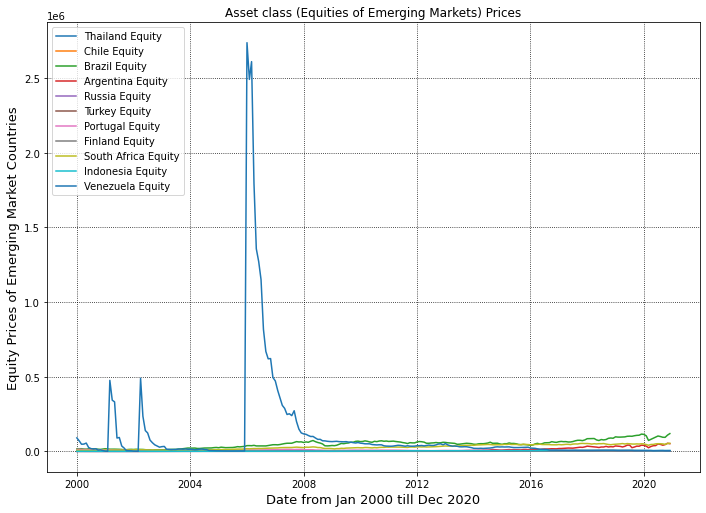

In [419]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Thailand, label='Thailand Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Chile, label='Chile Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Brazil, label='Brazil Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Argentina, label='Argentina Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Russia, label='Russia Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Turkey, label='Turkey Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Portugal, label='Portugal Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Finland, label='Finland Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.South_Africa, label='South Africa Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Indonesia, label='Indonesia Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Venezuela, label='Venezuela Equity')
plt.title('Asset class (Equities of Emerging Markets) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Prices of Emerging Market Countries', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

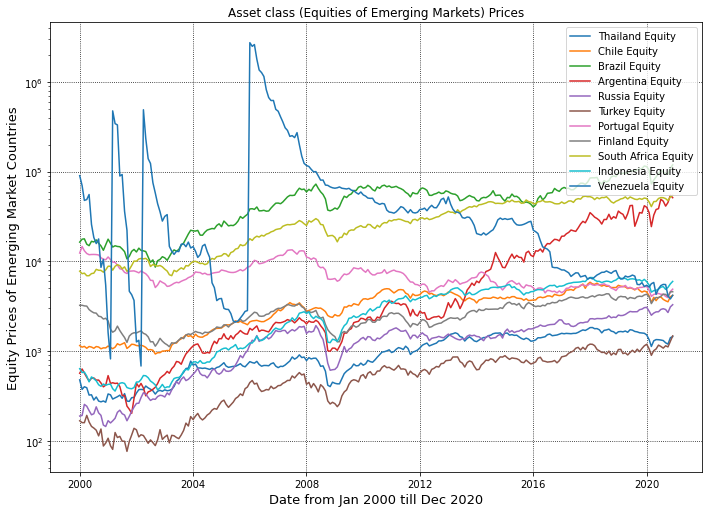

In [420]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Thailand, label='Thailand Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Chile, label='Chile Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Brazil, label='Brazil Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Argentina, label='Argentina Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Russia, label='Russia Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Turkey, label='Turkey Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Portugal, label='Portugal Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Finland, label='Finland Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.South_Africa, label='South Africa Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Indonesia, label='Indonesia Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Venezuela, label='Venezuela Equity')
plt.title('Asset class (Equities of Emerging Markets) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Prices of Emerging Market Countries', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [421]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
emerg_market_df_2000_2020 = emerg_market_df_2000_2020.rename(columns={'South Africa':'South_Africa'})

**The Relative Strength Index (RSI)**

- The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. 

In [438]:
# Calculate the Relative Strength Index (RSI)

In [423]:
# Get the difference in price from the previous month
# Use pandas.DataFrame.diff() function Calculates the difference of a Dataframe element compared with another element
# in the Dataframe (default is element in previous row, axis= 1 for column or 0 for row).
emerg_market_df_2000_2020['delta_Thailand'] = emerg_market_df_2000_2020['Thailand'].diff(1)
emerg_market_df_2000_2020['delta_Chile'] = emerg_market_df_2000_2020['Chile'].diff(1)
emerg_market_df_2000_2020['delta_Brazil'] = emerg_market_df_2000_2020['Brazil'].diff(1)
emerg_market_df_2000_2020['delta_Argentina'] = emerg_market_df_2000_2020['Argentina'].diff(1)
emerg_market_df_2000_2020['delta_Russia'] = emerg_market_df_2000_2020['Russia'].diff(1)
emerg_market_df_2000_2020['delta_Turkey'] = emerg_market_df_2000_2020['Turkey'].diff(1)
emerg_market_df_2000_2020['delta_Portugal'] = emerg_market_df_2000_2020['Portugal'].diff(1)
emerg_market_df_2000_2020['delta_Finland'] = emerg_market_df_2000_2020['Finland'].diff(1)
emerg_market_df_2000_2020['delta_South_Africa'] = emerg_market_df_2000_2020['South_Africa'].diff(1)
emerg_market_df_2000_2020['delta_Indonesia'] = emerg_market_df_2000_2020['Indonesia'].diff(1)
emerg_market_df_2000_2020['delta_Venezuela'] = emerg_market_df_2000_2020['Venezuela'].diff(1)

In [424]:
emerg_market_df_2000_2020[['delta_Thailand','delta_Chile','delta_Brazil','delta_Argentina','delta_Russia',
                           'delta_Turkey','delta_Portugal','delta_Finland','delta_South_Africa',
                           'delta_Indonesia','delta_Venezuela']]

delta_Thailand  delta_Chile  delta_Brazil  delta_Argentina  \
Date                                                                     
2000-01-01             NaN          NaN           NaN              NaN   
2000-02-01         -103.25       -45.24       1271.93            65.36   
2000-03-01           26.00        22.40        160.17           -62.40   
2000-04-01           -9.92       -53.57      -2282.77           -59.73   
2000-05-01          -67.11        49.18       -580.99           -45.21   
...                    ...          ...           ...              ...   
2020-08-01          -17.87      -249.93      -3543.00         -2418.20   
2020-09-01          -73.62      -129.85      -4765.80         -5574.56   
2020-10-01          -42.09       -97.38       -651.00          4029.16   
2020-11-01          213.36       492.95      14940.90          9282.52   
2020-12-01           41.04       144.35      10123.90         -3346.05   

            delta_Russia  delta_Turkey  delta_Portugal  delta_Finland  \
Date                                                                    
2000-01-01           NaN           NaN             NaN            NaN   
2000-02-01          2.68         -7.69         2258.72           4.91   
2000-03-01         63.19         -0.26        -1517.18         -50.63   
2000-04-01        -11.83         32.86         -891.47         -18.21   
2000-05-01        -25.80        -30.00         -371.49        -269.40   
...                  ...           ...             ...            ...   
2020-08-01         54.63        -48.29            5.26         229.84   
2020-09-01        -60.39         66.63         -234.06         -27.83   
2020-10-01       -215.22        -32.87         -121.90        -223.97   
2020-11-01        416.99        171.21          659.60         507.66   
2020-12-01        181.44        193.14          293.64          21.49   

            delta_South_Africa  delta_Indonesia  delta_Venezuela  
Date                                                              
2000-01-01                 NaN              NaN              NaN  
2000-02-01             -484.65           -59.83        -20329.21  
2000-03-01              101.33             6.74        -22122.81  
2000-04-01             -475.10           -56.54          1083.96  
2000-05-01                8.13           -72.41          6726.99  
...                        ...              ...              ...  
2020-08-01             -143.36            88.86           167.54  
2020-09-01            -1183.02          -368.45           -20.19  
2020-10-01            -2569.52           258.19         -1380.87  
2020-11-01             4902.58           484.19          -323.22  
2020-12-01             2004.08           366.65           374.51  

[252 rows x 11 columns]

In [425]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
emerg_market_df_2000_2020.dropna(axis=0, inplace=True)
emerg_market_df_2000_2020

Thailand    Chile     Brazil  Argentina   Russia   Turkey  \
Date                                                                    
2000-02-01    374.32  1106.18   17660.20     631.64   191.49   159.46   
2000-03-01    400.32  1128.58   17820.37     569.24   254.68   159.20   
2000-04-01    390.40  1075.01   15537.60     509.51   242.85   192.06   
2000-05-01    323.29  1124.19   14956.61     464.30   217.05   162.06   
2000-06-01    325.69  1108.66   16727.95     496.90   194.93   144.66   
...              ...      ...        ...        ...      ...      ...   
2020-08-01   1310.66  3767.15   99369.20   46835.42  2966.20  1078.61   
2020-09-01   1237.04  3637.30   94603.40   41260.86  2905.81  1145.24   
2020-10-01   1194.95  3539.92   93952.40   45290.02  2690.59  1112.37   
2020-11-01   1408.31  4032.87  108893.30   54572.54  3107.58  1283.58   
2020-12-01   1449.35  4177.22  119017.20   51226.49  3289.02  1476.72   

            Portugal  Finland  South_Africa  Indonesia  ...  delta_Chile  \
Date                                                    ...                
2000-02-01  14644.27  3239.69       7287.01     576.54  ...       -45.24   
2000-03-01  13127.09  3189.06       7388.34     583.28  ...        22.40   
2000-04-01  12235.62  3170.85       6913.24     526.74  ...       -53.57   
2000-05-01  11864.13  2901.45       6921.37     454.33  ...        49.18   
2000-06-01  11923.37  2764.66       7304.22     515.11  ...       -15.53   
...              ...      ...           ...        ...  ...          ...   
2020-08-01   4301.08  4308.80      51225.46    5238.49  ...      -249.93   
2020-09-01   4067.02  4280.97      50042.44    4870.04  ...      -129.85   
2020-10-01   3945.12  4057.00      47472.92    5128.23  ...       -97.38   
2020-11-01   4604.72  4564.66      52375.50    5612.42  ...       492.95   
2020-12-01   4898.36  4586.15      54379.58    5979.07  ...       144.35   

            delta_Brazil  delta_Argentina  delta_Russia  delta_Turkey  \
Date                                                                    
2000-02-01       1271.93            65.36          2.68         -7.69   
2000-03-01        160.17           -62.40         63.19         -0.26   
2000-04-01      -2282.77           -59.73        -11.83         32.86   
2000-05-01       -580.99           -45.21        -25.80        -30.00   
2000-06-01       1771.34            32.60        -22.12        -17.40   
...                  ...              ...           ...           ...   
2020-08-01      -3543.00         -2418.20         54.63        -48.29   
2020-09-01      -4765.80         -5574.56        -60.39         66.63   
2020-10-01       -651.00          4029.16       -215.22        -32.87   
2020-11-01      14940.90          9282.52        416.99        171.21   
2020-12-01      10123.90         -3346.05        181.44        193.14   

            delta_Portugal  delta_Finland  delta_South_Africa  \
Date                                                            
2000-02-01         2258.72           4.91             -484.65   
2000-03-01        -1517.18         -50.63              101.33   
2000-04-01         -891.47         -18.21             -475.10   
2000-05-01         -371.49        -269.40                8.13   
2000-06-01           59.24        -136.79              382.85   
...                    ...            ...                 ...   
2020-08-01            5.26         229.84             -143.36   
2020-09-01         -234.06         -27.83            -1183.02   
2020-10-01         -121.90        -223.97            -2569.52   
2020-11-01          659.60         507.66             4902.58   
2020-12-01          293.64          21.49             2004.08   

            delta_Indonesia  delta_Venezuela  
Date                                          
2000-02-01           -59.83        -20329.21  
2000-03-01             6.74        -22122.81  
2000-04-01           -56.54          1083.96  
2000-05-01           -72.41          6726.

In [426]:
# Get the positive gains (up) and the negative gains (down)
emerg_market_df_2000_2020['Thailand_up'] = emerg_market_df_2000_2020['delta_Thailand'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Thailand_down'] = emerg_market_df_2000_2020['delta_Thailand'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Chile_up'] = emerg_market_df_2000_2020['delta_Chile'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Chile_down'] = emerg_market_df_2000_2020['delta_Chile'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Brazil_up'] = emerg_market_df_2000_2020['delta_Brazil'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Brazil_down'] = emerg_market_df_2000_2020['delta_Brazil'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Argentina_up'] = emerg_market_df_2000_2020['delta_Argentina'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Argentina_down'] = emerg_market_df_2000_2020['delta_Argentina'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Russia_up'] = emerg_market_df_2000_2020['delta_Russia'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Russia_down'] = emerg_market_df_2000_2020['delta_Russia'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Turkey_up'] = emerg_market_df_2000_2020['delta_Turkey'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Turkey_down'] = emerg_market_df_2000_2020['delta_Turkey'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Portugal_up'] = emerg_market_df_2000_2020['delta_Portugal'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Portugal_down'] = emerg_market_df_2000_2020['delta_Portugal'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Finland_up'] = emerg_market_df_2000_2020['delta_Finland'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Finland_down'] = emerg_market_df_2000_2020['delta_Finland'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['South_Africa_up'] = emerg_market_df_2000_2020['delta_South_Africa'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['South_Africa_down'] = emerg_market_df_2000_2020['delta_South_Africa'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Indonesia_up'] = emerg_market_df_2000_2020['delta_Indonesia'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Indonesia_down'] = emerg_market_df_2000_2020['delta_Indonesia'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Venezuela_up'] = emerg_market_df_2000_2020['delta_Venezuela'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Venezuela_down'] = emerg_market_df_2000_2020['delta_Venezuela'].apply(lambda x:abs(x) if x < 0 else 0)

In [427]:
emerg_market_df_2000_2020[['Thailand_up','Thailand_down','Chile_up','Chile_down','Brazil_up','Brazil_down',
                           'Argentina_up','Argentina_down','Russia_up','Russia_down','Turkey_up','Turkey_down',
                           'Portugal_up','Portugal_down','Finland_up','Finland_down','South_Africa_up','South_Africa_down',
                           'Indonesia_up','Indonesia_down','Venezuela_up','Venezuela_down']].head(5)

Thailand_up  Thailand_down  Chile_up  Chile_down  Brazil_up  \
Date                                                                      
2000-02-01          0.0         103.25      0.00       45.24    1271.93   
2000-03-01         26.0           0.00     22.40        0.00     160.17   
2000-04-01          0.0           9.92      0.00       53.57       0.00   
2000-05-01          0.0          67.11     49.18        0.00       0.00   
2000-06-01          2.4           0.00      0.00       15.53    1771.34   

            Brazil_down  Argentina_up  Argentina_down  Russia_up  Russia_down  \
Date                                                                            
2000-02-01         0.00         65.36            0.00       2.68         0.00   
2000-03-01         0.00          0.00           62.40      63.19         0.00   
2000-04-01      2282.77          0.00           59.73       0.00        11.83   
2000-05-01       580.99          0.00           45.21       0.00        25.80   
2000-06-01         0.00         32.60            0.00       0.00        22.12   

            ...  Portugal_up  Portugal_down  Finland_up  Finland_down  \
Date        ...                                                         
2000-02-01  ...      2258.72           0.00        4.91          0.00   
2000-03-01  ...         0.00        1517.18        0.00         50.63   
2000-04-01  ...         0.00         891.47        0.00         18.21   
2000-05-01  ...         0.00         371.49        0.00        269.40   
2000-06-01  ...        59.24           0.00        0.00        136.79   

            South_Africa_up  South_Africa_down  Indonesia_up  Indonesia_down  \
Date                                                                           
2000-02-01             0.00             484.65          0.00           59.83   
2000-03-01           101.33               0.00          6.74            0.00   
2000-04-01             0.00             475.10          0.00           56.54   
2000-05-01             8.13               0.00          0.00           72.41   
2000-06-01           382.85               0.00         60.78            0.00   

            Venezuela_up  Venezuela_down  
Date                                      
2000-02-01          0.00        20329.21  
2000-03-01          0.00        22122.81  
2000-04-01       1083.96            0.00  
2000-05-01       6726.99            0.00  
2000-06-01          0.00        29794.33  

[5 rows x 22 columns]

In [428]:
# get the time period
emerg_market_df_2000_2020.shape[0]

251

In [429]:
# Calculate the average gain and the average loss
# Use pandas.DataFrame.ewm() function to provide exponential weighted (EW) functions, such as mean(),var(),std(), corr(), cov()
emerg_market_df_2000_2020['avg_up_Thailand'] = emerg_market_df_2000_2020['Thailand_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Thailand'] = emerg_market_df_2000_2020['Thailand_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Chile'] = emerg_market_df_2000_2020['Chile_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Chile'] = emerg_market_df_2000_2020['Chile_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Brazil'] = emerg_market_df_2000_2020['Brazil_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Brazil'] = emerg_market_df_2000_2020['Brazil_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Argentina'] = emerg_market_df_2000_2020['Argentina_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Argentina'] = emerg_market_df_2000_2020['Argentina_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Russia'] = emerg_market_df_2000_2020['Russia_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Russia'] = emerg_market_df_2000_2020['Russia_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Turkey'] = emerg_market_df_2000_2020['Turkey_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Turkey'] = emerg_market_df_2000_2020['Turkey_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Portugal'] = emerg_market_df_2000_2020['Portugal_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Portugal'] = emerg_market_df_2000_2020['Portugal_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Finland'] = emerg_market_df_2000_2020['Finland_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Finland'] = emerg_market_df_2000_2020['Finland_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_South_Africa'] = emerg_market_df_2000_2020['South_Africa_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_South_Africa'] = emerg_market_df_2000_2020['South_Africa_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Indonesia'] = emerg_market_df_2000_2020['Indonesia_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Indonesia'] = emerg_market_df_2000_2020['Indonesia_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Venezuela'] = emerg_market_df_2000_2020['Venezuela_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Venezuela'] = emerg_market_df_2000_2020['Venezuela_down'].ewm(span=251).mean()

In [430]:
emerg_market_df_2000_2020[['avg_up_Thailand','avg_down_Thailand','avg_up_Chile','avg_down_Chile',
                           'avg_up_Brazil','avg_down_Brazil','avg_up_Argentina','avg_down_Argentina',
                           'avg_up_Russia','avg_down_Russia','avg_up_Turkey','avg_down_Turkey',
                           'avg_up_Portugal','avg_down_Portugal','avg_up_Finland','avg_down_Finland',
                           'avg_up_South_Africa','avg_down_South_Africa','avg_up_Indonesia','avg_down_Indonesia',
                           'avg_up_Venezuela','avg_down_Venezuela']].head(5)

avg_up_Thailand  avg_down_Thailand  avg_up_Chile  avg_down_Chile  \
Date                                                                           
2000-02-01         0.000000         103.250000      0.000000       45.240000   
2000-03-01        13.051793          51.419323     11.244622       22.529880   
2000-04-01         8.666483          37.475845      7.466509       32.959140   
2000-05-01         6.473898          44.973167     18.019853       24.620611   
2000-06-01         5.646082          35.834624     14.358221       22.773400   

            avg_up_Brazil  avg_down_Brazil  avg_up_Argentina  \
Date                                                           
2000-02-01    1271.930000         0.000000         65.360000   
2000-03-01     713.835339         0.000000         32.549801   
2000-04-01     473.991741       766.994487         21.613299   
2000-05-01     354.073749       719.936105         16.145222   
2000-06-01     642.062107       573.645162         19.488831   

            avg_down_Argentina  avg_up_Russia  avg_down_Russia  ...  \
Date                                                            ...   
2000-02-01            0.000000       2.680000         0.000000  ...   
2000-03-01           31.324303      33.055538         0.000000  ...   
2000-04-01           40.868415      21.949112         3.974796  ...   
2000-05-01           41.966818      16.396076         9.496484  ...   
2000-06-01           33.439165      13.064395        12.061581  ...   

            avg_up_Portugal  avg_down_Portugal  avg_up_Finland  \
Date                                                             
2000-02-01      2258.720000           0.000000        4.910000   
2000-03-01      1124.860558         761.612271        2.445219   
2000-04-01       746.915409         805.243544        1.623643   
2000-05-01       557.948834         695.505653        1.212868   
2000-06-01       456.611250         554.178975        0.966413   

            avg_down_Finland  avg_up_South_Africa  avg_down_South_Africa  \
Date                                                                       
2000-02-01          0.000000             0.000000             484.650000   
2000-03-01         25.415857            50.866853             241.359562   
2000-04-01         22.994740            33.775952             319.894687   
2000-05-01         85.334273            27.287630             238.962626   
2000-06-01         95.790072            99.537867             190.405445   

            avg_up_Indonesia  avg_down_Indonesia  avg_up_Venezuela  \
Date                                                                 
2000-02-01          0.000000           59.830000          0.000000   
2000-03-01          3.383426           29.795817          0.000000   
2000-04-01          2.246619           38.781672        364.202852   
2000-05-01          1.678234           47.289503       1973.962247   
2000-06-01         13.687706           37.680281       1572.853319   

            avg_down_Venezuela  
Date                            
2000-02-01        20329.210000  
2000-03-01        21229.582908  
2000-04-01        14096.594014  
2000-05-01        10530.212785  
2000-06-01        14444.679443  

[5 rows x 22 columns]

In [431]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
emerg_market_df_2000_2020.isnull().any()

Thailand                 False
Chile                    False
Brazil                   False
Argentina                False
Russia                   False
                         ...  
avg_down_South_Africa    False
avg_up_Indonesia         False
avg_down_Indonesia       False
avg_up_Venezuela         False
avg_down_Venezuela       False
Length: 66, dtype: bool

In [432]:
# Calculate the Relative Strength (RS)
emerg_market_df_2000_2020['Thailand_RS'] = emerg_market_df_2000_2020['avg_up_Thailand'] / emerg_market_df_2000_2020['avg_down_Thailand']
emerg_market_df_2000_2020['Chile_RS'] = emerg_market_df_2000_2020['avg_up_Chile'] / emerg_market_df_2000_2020['avg_down_Chile']
emerg_market_df_2000_2020['Brazil_RS'] = emerg_market_df_2000_2020['avg_up_Brazil'] / emerg_market_df_2000_2020['avg_down_Brazil']
emerg_market_df_2000_2020['Argentina_RS'] = emerg_market_df_2000_2020['avg_up_Argentina'] / emerg_market_df_2000_2020['avg_down_Argentina']
emerg_market_df_2000_2020['Russia_RS'] = emerg_market_df_2000_2020['avg_up_Russia'] / emerg_market_df_2000_2020['avg_down_Russia']
emerg_market_df_2000_2020['Turkey_RS'] = emerg_market_df_2000_2020['avg_up_Turkey'] /emerg_market_df_2000_2020['avg_down_Turkey']
emerg_market_df_2000_2020['Portugal_RS'] = emerg_market_df_2000_2020['avg_up_Portugal'] / emerg_market_df_2000_2020['avg_down_Portugal']
emerg_market_df_2000_2020['Finland_RS'] = emerg_market_df_2000_2020['avg_up_Finland'] / emerg_market_df_2000_2020['avg_down_Finland']
emerg_market_df_2000_2020['South_Africa_RS'] = emerg_market_df_2000_2020['avg_up_South_Africa'] / emerg_market_df_2000_2020['avg_down_South_Africa']
emerg_market_df_2000_2020['Indonesia_RS'] = emerg_market_df_2000_2020['avg_up_Indonesia'] / emerg_market_df_2000_2020['avg_down_Indonesia']
emerg_market_df_2000_2020['Venezuela_RS'] = emerg_market_df_2000_2020['avg_up_Venezuela'] / emerg_market_df_2000_2020['avg_down_Venezuela']

In [433]:
emerg_market_df_2000_2020[['Thailand_RS','Chile_RS','Brazil_RS','Argentina_RS','Russia_RS','Turkey_RS',
                          'Portugal_RS','Finland_RS','South_Africa_RS','Indonesia_RS','Venezuela_RS']]

Thailand_RS  Chile_RS  Brazil_RS  Argentina_RS  Russia_RS  \
Date                                                                    
2000-02-01     0.000000  0.000000        inf           inf        inf   
2000-03-01     0.253831  0.499098        inf      1.039123        inf   
2000-04-01     0.231255  0.226538   0.617986      0.528851   5.522073   
2000-05-01     0.143950  0.731901   0.491813      0.384714   1.726542   
2000-06-01     0.157559  0.630482   1.119267      0.582815   1.083141   
...                 ...       ...        ...           ...        ...   
2020-08-01     1.084544  1.037655   1.302694      1.545127   1.491957   
2020-09-01     1.050223  1.020092   1.261595      1.420128   1.462171   
2020-10-01     1.031413  1.007204   1.256138      1.479067   1.364321   
2020-11-01     1.122931  1.071669   1.356201      1.615941   1.495018   
2020-12-01     1.140675  1.090697   1.424545      1.539383   1.552341   

            Turkey_RS  Portugal_RS  Finland_RS  South_Africa_RS  Indonesia_RS  \
Date                                                                            
2000-02-01   0.000000          inf         inf         0.000000      0.000000   
2000-03-01   0.000000     1.476946    0.096208         0.210751      0.113554   
2000-04-01   4.198633     0.927565    0.070609         0.105585      0.057930   
2000-05-01   0.863229     0.802220    0.014213         0.114192      0.035489   
2000-06-01   0.589461     0.823942    0.010089         0.522768      0.363259   
...               ...          ...         ...              ...           ...   
2020-08-01   1.217151     0.809152    1.238585         1.325587      1.241280   
2020-09-01   1.250106     0.796780    1.232134         1.298905      1.175192   
2020-10-01   1.229950     0.790435    1.182185         1.244079      1.212799   
2020-11-01   1.314604     0.833868    1.274807         1.325257      1.283890   
2020-12-01   1.410864     0.853359    1.278759         1.358707      1.338153   

            Venezuela_RS  
Date                      
2000-02-01      0.000000  
2000-03-01      0.000000  
2000-04-01      0.025836  
2000-05-01      0.187457  
2000-06-01      0.108888  
...                  ...  
2020-08-01      0.929069  
2020-09-01      0.929049  
2020-10-01      0.927734  
2020-11-01      0.927424  
2020-12-01      0.927814  

[251 rows x 11 columns]

In [434]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
emerg_market_df_2000_2020.dropna(axis=0, inplace=True)
emerg_market_df_2000_2020

Thailand    Chile     Brazil  Argentina   Russia   Turkey  \
Date                                                                    
2000-02-01    374.32  1106.18   17660.20     631.64   191.49   159.46   
2000-03-01    400.32  1128.58   17820.37     569.24   254.68   159.20   
2000-04-01    390.40  1075.01   15537.60     509.51   242.85   192.06   
2000-05-01    323.29  1124.19   14956.61     464.30   217.05   162.06   
2000-06-01    325.69  1108.66   16727.95     496.90   194.93   144.66   
...              ...      ...        ...        ...      ...      ...   
2020-08-01   1310.66  3767.15   99369.20   46835.42  2966.20  1078.61   
2020-09-01   1237.04  3637.30   94603.40   41260.86  2905.81  1145.24   
2020-10-01   1194.95  3539.92   93952.40   45290.02  2690.59  1112.37   
2020-11-01   1408.31  4032.87  108893.30   54572.54  3107.58  1283.58   
2020-12-01   1449.35  4177.22  119017.20   51226.49  3289.02  1476.72   

            Portugal  Finland  South_Africa  Indonesia  ...  Chile_RS  \
Date                                                    ...             
2000-02-01  14644.27  3239.69       7287.01     576.54  ...  0.000000   
2000-03-01  13127.09  3189.06       7388.34     583.28  ...  0.499098   
2000-04-01  12235.62  3170.85       6913.24     526.74  ...  0.226538   
2000-05-01  11864.13  2901.45       6921.37     454.33  ...  0.731901   
2000-06-01  11923.37  2764.66       7304.22     515.11  ...  0.630482   
...              ...      ...           ...        ...  ...       ...   
2020-08-01   4301.08  4308.80      51225.46    5238.49  ...  1.037655   
2020-09-01   4067.02  4280.97      50042.44    4870.04  ...  1.020092   
2020-10-01   3945.12  4057.00      47472.92    5128.23  ...  1.007204   
2020-11-01   4604.72  4564.66      52375.50    5612.42  ...  1.071669   
2020-12-01   4898.36  4586.15      54379.58    5979.07  ...  1.090697   

            Brazil_RS  Argentina_RS  Russia_RS  Turkey_RS  Portugal_RS  \
Date                                                                     
2000-02-01        inf           inf        inf   0.000000          inf   
2000-03-01        inf      1.039123        inf   0.000000     1.476946   
2000-04-01   0.617986      0.528851   5.522073   4.198633     0.927565   
2000-05-01   0.491813      0.384714   1.726542   0.863229     0.802220   
2000-06-01   1.119267      0.582815   1.083141   0.589461     0.823942   
...               ...           ...        ...        ...          ...   
2020-08-01   1.302694      1.545127   1.491957   1.217151     0.809152   
2020-09-01   1.261595      1.420128   1.462171   1.250106     0.796780   
2020-10-01   1.256138      1.479067   1.364321   1.229950     0.790435   
2020-11-01   1.356201      1.615941   1.495018   1.314604     0.833868   
2020-12-01   1.424545      1.539383   1.552341   1.410864     0.853359   

            Finland_RS  South_Africa_RS  Indonesia_RS  Venezuela_RS  
Date                                                                 
2000-02-01         inf         0.000000      0.000000      0.000000  
2000-03-01    0.096208         0.210751      0.113554      0.000000  
2000-04-01    0.070609         0.105585      0.057930      0.025836  
2000-05-01    0.014213         0.114192      0.035489      0.187457  
2000-06-01    0.010089         0.522768      0.363259      0.108888  
...                ...              ...           ...           ...  
2020-08-01    1.238585         1.325587      1.241280      0.929069  
2020-09-01    1.232134         1.298905      1.175192      0.929049  
2020-10-01    1.182185         1.244079      1.212799      0.927734  
2020-11-01    1.274807         1.325257      1.283890      0.927424  
2020-12-01    1.278759         1.358707      1.338153      0.927814  

[251 rows x 77 columns]

In [435]:
# Calculate the Relative Strength Index (RSI), RSI = 100 - (100/(1 + RS))
emerg_market_df_2000_2020['Thailand_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Thailand_RS']))
emerg_market_df_2000_2020['Chile_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Chile_RS']))
emerg_market_df_2000_2020['Brazil_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Brazil_RS']))
emerg_market_df_2000_2020['Argentina_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Argentina_RS']))
emerg_market_df_2000_2020['Russia_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Russia_RS']))
emerg_market_df_2000_2020['Turkey_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Turkey_RS']))
emerg_market_df_2000_2020['Portugal_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Portugal_RS']))
emerg_market_df_2000_2020['Finland_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Finland_RS']))
emerg_market_df_2000_2020['South_Africa_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['South_Africa_RS']))
emerg_market_df_2000_2020['Indonesia_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Indonesia_RS']))
emerg_market_df_2000_2020['Venezuela_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Venezuela_RS']))

In [436]:
emerg_market_df_2000_2020[['Thailand_RSI','Chile_RSI','Brazil_RSI','Argentina_RSI','Russia_RSI','Turkey_RSI',
                          'Portugal_RSI','Finland_RSI','South_Africa_RSI','Indonesia_RSI','Venezuela_RSI']].head(5)

Thailand_RSI  Chile_RSI  Brazil_RSI  Argentina_RSI  Russia_RSI  \
Date                                                                         
2000-02-01      0.000000   0.000000  100.000000     100.000000  100.000000   
2000-03-01     20.244404  33.293227  100.000000      50.959307  100.000000   
2000-04-01     18.782067  18.469731   38.194762      34.591399   84.667451   
2000-05-01     12.583610  42.259984   32.967458      27.782920   63.323502   
2000-06-01     13.611346  38.668446   52.813874      36.821404   51.995571   

            Turkey_RSI  Portugal_RSI  Finland_RSI  South_Africa_RSI  \
Date                                                                  
2000-02-01    0.000000    100.000000   100.000000          0.000000   
2000-03-01    0.000000     59.627711     8.776471         17.406658   
2000-04-01   80.764173     48.121064     6.595246          9.550115   
2000-05-01   46.329744     44.512891     1.401396         10.248865   
2000-06-01   37.085579     45.173691     0.998810         34.330113   

            Indonesia_RSI  Venezuela_RSI  
Date                                      
2000-02-01       0.000000       0.000000  
2000-03-01      10.197419       0.000000  
2000-04-01       5.475780       2.518553  
2000-05-01       3.427223      15.786425  
2000-06-01      26.646375       9.819573

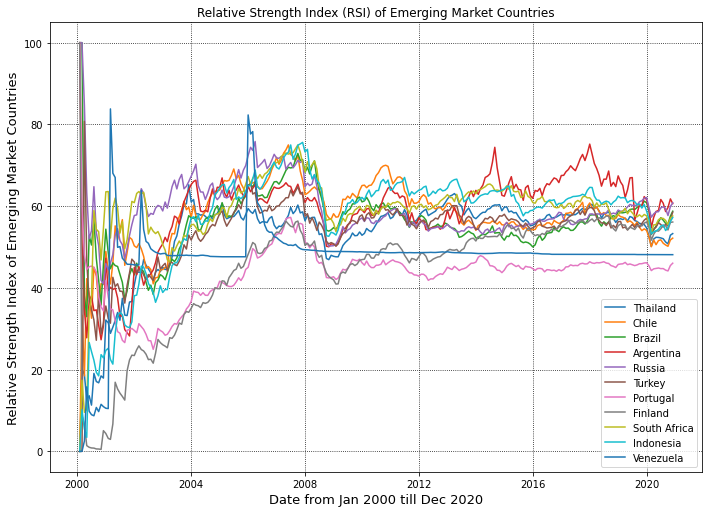

In [437]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Thailand_RSI, label='Thailand')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Chile_RSI, label='Chile')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Brazil_RSI, label='Brazil')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Argentina_RSI, label='Argentina')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Russia_RSI, label='Russia')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Turkey_RSI, label='Turkey')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Portugal_RSI, label='Portugal')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Finland_RSI, label='Finland')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.South_Africa_RSI, label='South Africa')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Indonesia_RSI, label='Indonesia')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Venezuela_RSI, label='Venezuela')
plt.title('Relative Strength Index (RSI) of Emerging Market Countries')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Relative Strength Index of Emerging Market Countries', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

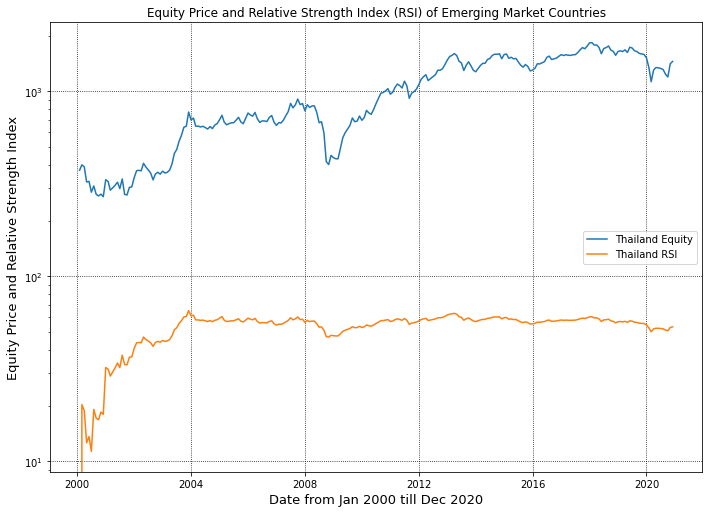

In [443]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Thailand, label='Thailand Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Thailand_RSI, label='Thailand RSI')
plt.title('Equity Price and Relative Strength Index (RSI) of Emerging Market Countries')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Price and Relative Strength Index', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

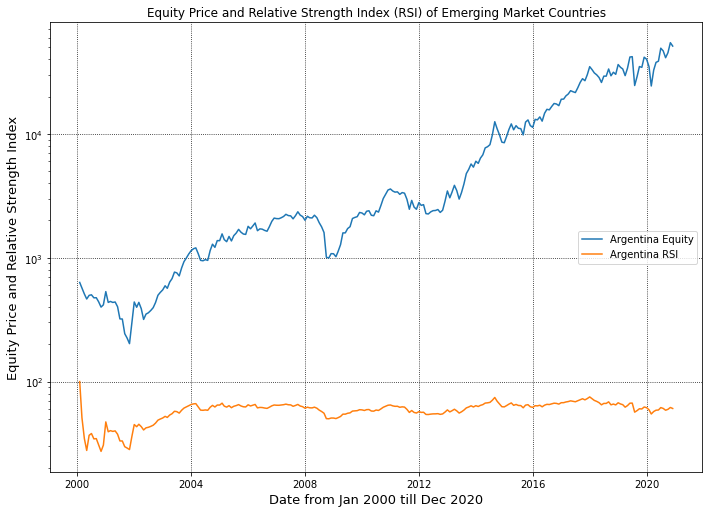

In [444]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Argentina, label='Argentina Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Argentina_RSI, label='Argentina RSI')
plt.title('Equity Price and Relative Strength Index (RSI) of Emerging Market Countries')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Price and Relative Strength Index', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

In [453]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import time
import datetime
from datetime import datetime

In [454]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2000_2020 = pd.read_csv('Bond_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2000_2020.head()

(252, 7)


Date  Germany  Australia      US      UK  Canada   Japan
0  1/1/2000    98.71     102.11   95.28  100.23   92.80   99.87
1  2/1/2000    99.07     106.07  100.59  102.33   95.62   99.70
2  3/1/2000   101.07     108.00  103.66  103.86   96.91  100.86
3  4/1/2000   100.46     107.28  102.28  104.06   95.09  100.13
4  5/1/2000   100.53     109.13  101.53  104.33   96.27  100.59

In [455]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2000_2020['Date'] = pd.to_datetime(bond_df_2000_2020.Date)

In [456]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2000_2020.set_index('Date',inplace=True)

In [457]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2000_2020 = np.log(1+bond_df_2000_2020[['Germany','Australia','US','UK','Canada','Japan']].pct_change())

In [458]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2000_2020.dropna(axis=0, inplace=True)
bond_df_2000_2020

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-02-01  0.003640   0.038049  0.054233  0.020735  0.029935 -0.001704
2000-03-01  0.019987   0.018032  0.030063  0.014841  0.013401  0.011568
2000-04-01 -0.006054  -0.006689 -0.013402  0.001924 -0.018959 -0.007264
2000-05-01  0.000697   0.017098 -0.007360  0.002591  0.012333  0.004584
2000-06-01 -0.003687   0.000092  0.020086  0.000862  0.012798 -0.011901
...              ...        ...       ...       ...       ...       ...
2020-08-01 -0.014032  -0.014015 -0.014987 -0.020500 -0.014901 -0.003079
2020-09-01  0.011944  -0.117148  0.001609  0.004546  0.004804  0.002980
2020-10-01  0.009830   0.001773 -0.017131 -0.005306 -0.009631 -0.002383
2020-11-01 -0.005659  -0.007505  0.025239 -0.005959 -0.001614  0.000894
2020-12-01 -0.000189  -0.006664 -0.006501  0.006374  0.000000  0.000993

[251 rows x 6 columns]

In [459]:
weights = [.1666666, .1666666, .1666666, .1666666, .1666666, .1666666]

In [461]:
weights[0]*bond_df_2000_2020['Germany'].mean() + weights[1]*bond_df_2000_2020['Australia'].mean() + weights[2]*bond_df_2000_2020['US'].mean() + weights[3]*bond_df_2000_2020['UK'].mean() + weights[4]*bond_df_2000_2020['Canada'].mean()+weights[5]*bond_df_2000_2020['Japan'].mean()

0.0003965068139523711

In [462]:
# Use numpy.dot() function to returns the dot product of two arrays.
np.dot(bond_df_2000_2020.mean(), weights)

0.00039650681395237103

In [463]:
def portfolio_returns(weights):
    return np.dot(bond_df_2000_2020.mean(), weights)

In [465]:
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
bond_df_2000_2020.cov()

Germany  Australia        US        UK    Canada     Japan
Germany    0.000378   0.000101  0.000213  0.000139  0.000132  0.000030
Australia  0.000101   0.000941  0.000206  0.000198  0.000233  0.000026
US         0.000213   0.000206  0.000609  0.000187  0.000226  0.000037
UK         0.000139   0.000198  0.000187  0.004597  0.000128  0.000051
Canada     0.000132   0.000233  0.000226  0.000128  0.000409  0.000031
Japan      0.000030   0.000026  0.000037  0.000051  0.000031  0.000143

In [470]:
# Calculate the portfolio_variance = weights[0]**2*bond_df_2000_2020.cov().iloc[0,0] + 
                                   # weights[1]**2*bond_df_2000_2020.cov().iloc[1,1] + 
                                   #weights[2]**2*bond_df_2000_2020.cov().iloc[2,2] + 
                                   # weights[3]**2*bond_df_2000_2020.cov().iloc[3,3] + 
                                   #weights[4]**2*bond_df_2000_2020.cov().iloc[4,4] + 
                                    #weights[5]**2*bond_df_2000_2020.cov.iloc[5,5]
                    
portfolio_variance = weights[0]**2* 0.000378 + weights[1]**2* 0.000941 + weights[2]**2* 0.000609 + weights[3]**2* 0.004597 + weights[4]**2* 0.000409 + weights[5]**2* 0.000143
portfolio_variance

0.00019658317606669812

In [475]:
# calculate the portfolio standard deviation (Standard deviation = Square root of the variance)
portfolio_standard_deviation = portfolio_variance**(1/2)
portfolio_standard_deviation

0.014020812247038262

In [480]:
portfolio_variance**(1/2)*np.sqrt(250)

0.22168850673112156

In [476]:
# Calculate the portfolio_variance 
np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights)

0.00030429283944313486

In [477]:
# calculate the portfolio standard deviation
(np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)

0.017443991499743825

In [478]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)

In [479]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)*np.sqrt(250)

**The Efficient Frontier**

- The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
- Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [485]:
def weights_creator(bond_df_2000_2020):
    rand = np.random.random(len(bond_df_2000_2020.columns))
    rand /= rand.sum()
    return rand


In [486]:
weights_creator(bond_df_2000_2020)

array([0.14332879, 0.04905827, 0.27502543, 0.19005524, 0.18185489,
       0.16067738])

In [487]:
def portfolio_returns(weights):
    return np.dot(bond_df_2000_2020.mean(), weights)

In [489]:
weights = [.1666666, .1666666, .1666666, .1666666, .1666666, .1666666]

In [490]:
portfolio_returns(weights)

0.00039650681395237103

In [491]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)*np.sqrt(250)

In [492]:
portfolio_std(weights)

0.275813723119035

In [493]:
# Generate efficient frontier

returns = []
stds = []
w = []

for i in range(500):
    weights = weights_creator(bond_df_2000_2020)
    returns.append(portfolio_returns(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)
    

In [494]:
returns

[0.00037458614238484035,
 0.00046825073347283165,
 0.00040629959798528335,
 0.00034102456627257234,
 0.0006030414516381982,
 0.000245975693517068,
 0.0004261686631436265,
 0.0006057046026882724,
 0.0005097030345084272,
 7.876192899110781e-05,
 0.00025261839629231653,
 0.0004000550790166692,
 0.00046313197740683595,
 0.0006224451985041219,
 0.0003058237215409772,
 0.00040588685578675184,
 0.00045939706633843735,
 0.0005171834906582363,
 0.0003216641396800992,
 0.0004083522947974808,
 0.0003228979917757424,
 0.0003239850774743552,
 0.0003697401169017963,
 0.0003077971217529368,
 0.00023711920886433782,
 0.0004443836692948884,
 0.0003167671369287673,
 0.00033324817230284275,
 0.0003956606941630784,
 0.00045270620540033355,
 0.00035409894930721596,
 0.00044341583059748116,
 0.00032610236317021806,
 0.00048109711696500164,
 0.00040527666352923035,
 0.0005987567206278883,
 0.0004769062535446217,
 0.00029380837296565045,
 0.00023595667054707831,
 0.00033462217661095483,
 0.0005547619568501739

In [495]:
stds

[0.268424116920093,
 0.3502300599741389,
 0.3175744495686523,
 0.24553215614738452,
 0.42562819384774137,
 0.2094191531028066,
 0.32284561203512996,
 0.34743988452850966,
 0.34224189924921,
 0.24517285285576115,
 0.291732038611467,
 0.23040257908150408,
 0.28531237598792925,
 0.4099699780803579,
 0.2867651744011742,
 0.2716008386707462,
 0.29212180879393923,
 0.3749146639576952,
 0.2248143374718053,
 0.30148254606925023,
 0.2494746697413726,
 0.25508170813942566,
 0.23821435835533766,
 0.2547800241988387,
 0.23083475948872087,
 0.2855427829487504,
 0.268346291845367,
 0.26431255817735766,
 0.31568284149281267,
 0.3446827555702053,
 0.30469342490991314,
 0.3043267193731248,
 0.27487659826787275,
 0.3140115161099249,
 0.24041937416067033,
 0.3575035734627406,
 0.3224296643301089,
 0.2249891312281835,
 0.24053957607753726,
 0.25952213819869463,
 0.41459967259840047,
 0.3406385215045746,
 0.2521113471287551,
 0.36874227646047686,
 0.38353769644356867,
 0.20262309665534584,
 0.3149041187840

In [496]:
w

[array([0.17275259, 0.16706496, 0.18515406, 0.1541163 , 0.14941835,
        0.17149374]),
 array([0.07426129, 0.23945394, 0.22768757, 0.24067261, 0.13894593,
        0.07897865]),
 array([0.01069235, 0.27208516, 0.19191225, 0.19364676, 0.20148427,
        0.13017921]),
 array([0.12856845, 0.17229821, 0.15003155, 0.12374087, 0.20521841,
        0.22014252]),
 array([0.01208135, 0.20792792, 0.00122244, 0.35675225, 0.1658276 ,
        0.25618844]),
 array([0.36270659, 0.14587149, 0.04353909, 0.02069408, 0.22497562,
        0.20221313]),
 array([0.14805863, 0.32540499, 0.03599018, 0.1885386 , 0.25068584,
        0.05132175]),
 array([0.19335307, 0.08612823, 0.1105762 , 0.24806182, 0.35077243,
        0.01110825]),
 array([0.11443995, 0.03389922, 0.21728001, 0.2718194 , 0.06618343,
        0.29637799]),
 array([0.02297461, 0.40325513, 0.08547974, 0.01523769, 0.10348687,
        0.36956597]),
 array([0.19077584, 0.33930817, 0.2714306 , 0.10231986, 0.05160295,
        0.04456257]),
 array([0.

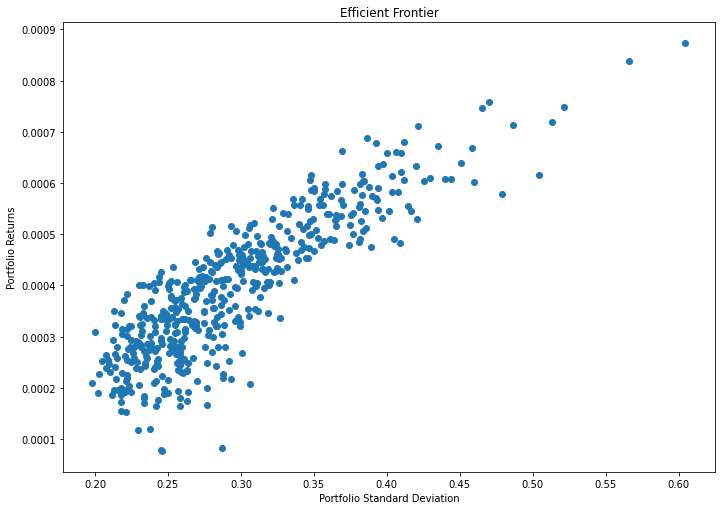

In [498]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Returns')
plt.show();

In [499]:
bond_df_2000_2020.shape[0]

251

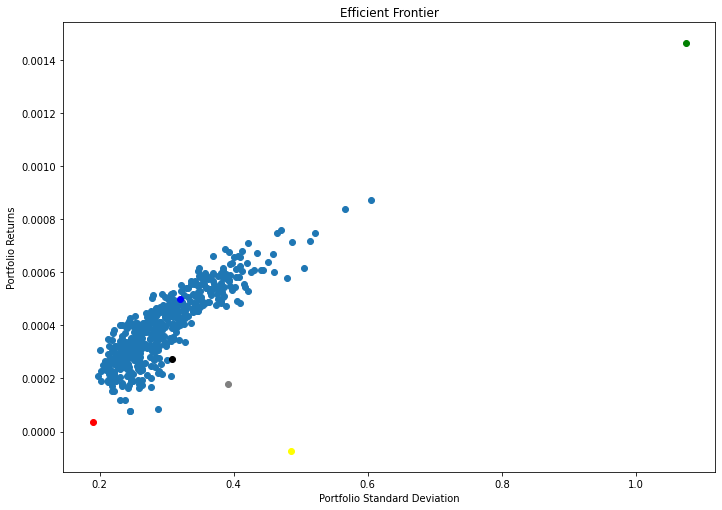

In [502]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.scatter(bond_df_2000_2020.std().iloc[0]*np.sqrt(251), bond_df_2000_2020.mean().iloc[0],c='k')
plt.scatter(bond_df_2000_2020.std().iloc[1]*np.sqrt(251), bond_df_2000_2020.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2000_2020.std().iloc[2]*np.sqrt(251), bond_df_2000_2020.mean().iloc[2],c='gray')
plt.scatter(bond_df_2000_2020.std().iloc[3]*np.sqrt(251), bond_df_2000_2020.mean().iloc[3],c='green')
plt.scatter(bond_df_2000_2020.std().iloc[4]*np.sqrt(251), bond_df_2000_2020.mean().iloc[4],c='blue')
plt.scatter(bond_df_2000_2020.std().iloc[5]*np.sqrt(251), bond_df_2000_2020.mean().iloc[5],c='red')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Returns')
plt.show();

**Minimum Variance Portfolio (MV)**

- A minimum variance portfolio indicates a well-diversified portfolio that consists of individually risky assets, which are hedged when traded together, resulting in the lowest possible risk for the rate of expected return.

- A minimum variance portfolio is a collection of securities that combine to minimize the price volatility of the overall portfolio. Volatility is a statistical measure of a particular security's price movement (ups and downs).

In [503]:
min(stds)

0.198244756940898

In [504]:
stds.index(min(stds))

299

In [506]:
# Minimum Variance Portfolio
returns[stds.index(min(stds))]

0.00020898681700050987

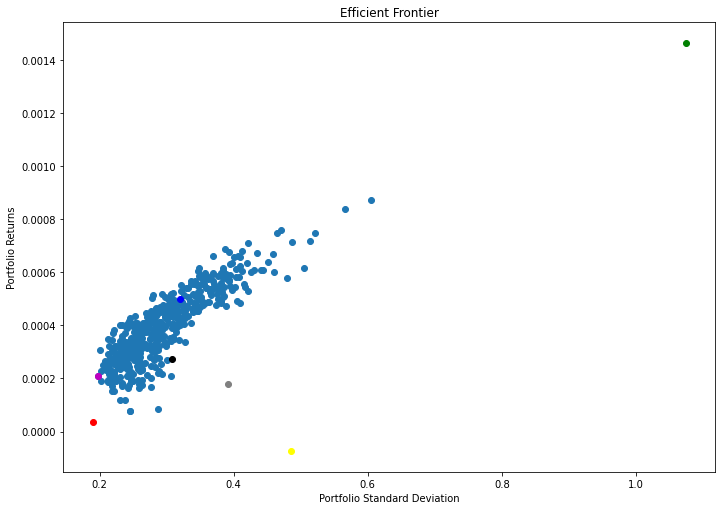

In [509]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(bond_df_2000_2020.std().iloc[0]*np.sqrt(251), bond_df_2000_2020.mean().iloc[0],c='k')
plt.scatter(bond_df_2000_2020.std().iloc[1]*np.sqrt(251), bond_df_2000_2020.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2000_2020.std().iloc[2]*np.sqrt(251), bond_df_2000_2020.mean().iloc[2],c='gray')
plt.scatter(bond_df_2000_2020.std().iloc[3]*np.sqrt(251), bond_df_2000_2020.mean().iloc[3],c='green')
plt.scatter(bond_df_2000_2020.std().iloc[4]*np.sqrt(251), bond_df_2000_2020.mean().iloc[4],c='blue')
plt.scatter(bond_df_2000_2020.std().iloc[5]*np.sqrt(251), bond_df_2000_2020.mean().iloc[5],c='red')

plt.scatter(min(stds),returns[stds.index(min(stds))], c='m')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Returns')
plt.show();